Library **importing**

In [1177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [1178]:
#from google.colab import files 
#upload= files.upload()

In [1179]:
df=pd.read_csv('data.csv',encoding='unicode_escape')
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [1180]:
df1=pd.read_csv('dataa.csv',encoding='unicode_escape')
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [1181]:
df.shape

(435742, 13)

In [1182]:
df1.shape

(34186, 21)

In [1183]:
df.head()

stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3                         NaN    NaN  1990-03-01  
4                         NaN    NaN  1990-03-01

In [1184]:
df1.head()

State     County  Year  Days with AQI  Good Days  Moderate Days  \
0  Alabama     DeKalb  2021             58         58              0   
1  Alabama  Jefferson  2021             60         33             27   
2   Alaska    Denali   2021             59         59              0   
3  Arizona     Apache  2021             87         87              0   
4  Arizona    Cochise  2021             90         77             12   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    1               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0               0       49                   42          32        0   
1               0       93                   64          50        1   
2               0       43                   41          39        0   
3               0       25                   19          11        0   
4               0      104                   54          41        0   

   Days NO2  Days Ozone  Days SO2  Days PM2.5  Days PM10   Latitude  \
0         0          58         0           0          0  34.289001   
1         1           2         0          55          1  33.565278   
2         0          59         0           0          0  63.723200   
3         0           0         0           1         86  34.058475   
4         0          48         0           0         42  32.009410   

    Longitude  
0  -85.970065  
1  -86.796389  
2 -148.967600  
3 -109.441259  
4 -109.389060

In [1185]:
df1.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10', 'Latitude',
       'Longitude'],
      dtype='object')

COLUMNS ADDING FROM DF1

In [1186]:
import pandas as pd
f_column = df1[['Days SO2','Days NO2','Days CO','Days Ozone','Days PM2.5']]
df = pd.concat([df,f_column], axis = 1)
df.head()

stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  Days SO2  Days NO2  Days CO  \
0                         NaN    NaN  1990-02-01       0.0       0.0      0.0   
1                         NaN    NaN  1990-02-01       0.0       1.0      1.0   
2                         NaN    NaN  1990-02-01       0.0       0.0      0.0   
3                         NaN    NaN  1990-03-01       0.0       0.0      0.0   
4                         NaN    NaN  1990-03-01       0.0       0.0      0.0   

   Days Ozone  Days PM2.5  
0        58.0         0.0  
1         2.0        55.0  
2        59.0         0.0  
3         0.0         1.0  
4        48.0         0.0

In [1187]:
df.tail()

stn_code sampling_date                        state  location  \
435737     SAMP      24-12-15                  West Bengal  ULUBERIA   
435738     SAMP      29-12-15                  West Bengal  ULUBERIA   
435739      NaN           NaN  andaman-and-nicobar-islands       NaN   
435740      NaN           NaN                  Lakshadweep       NaN   
435741      NaN           NaN                      Tripura       NaN   

                                           agency   type   so2   no2   rspm  \
435737  West Bengal State Pollution Control Board  RIRUO  22.0  50.0  143.0   
435738  West Bengal State Pollution Control Board  RIRUO  20.0  46.0  171.0   
435739                                        NaN    NaN   NaN   NaN    NaN   
435740                                        NaN    NaN   NaN   NaN    NaN   
435741                                        NaN    NaN   NaN   NaN    NaN   

        spm        location_monitoring_station  pm2_5        date  Days SO2  \
435737  NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-24       NaN   
435738  NaN  Inside Rampal Industries,ULUBERIA    NaN  2015-12-29       NaN   
435739  NaN                                NaN    NaN         NaN       NaN   
435740  NaN                                NaN    NaN         NaN       NaN   
435741  NaN                                NaN    NaN         NaN       NaN   

        Days NO2  Days CO  Days Ozone  Days PM2.5  
435737       NaN      NaN         NaN         NaN  
435738       NaN      NaN         NaN         NaN  
435739       NaN      NaN         NaN         NaN  
435740       NaN      NaN         NaN         NaN  
435741       NaN      NaN         NaN         NaN

In [1188]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date', 'Days SO2', 'Days NO2', 'Days CO', 'Days Ozone', 'Days PM2.5'],
      dtype='object')

In [1189]:
df.shape

(435742, 18)

In [1190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
 13 

In [1191]:
df.drop('pm2_5',axis=1,inplace=True)

In [1192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435742 entries, 0 to 435741
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  date                         435735 non-null  object 
 12  Days SO2                     34186 non-null   float64
 13 

DROPPING ALL NAN VALUES FROM DATAFRAME KEEPING SUBSET PM2.5 COLUMN

In [1193]:
df=df.dropna(subset=['Days PM2.5'])

In [1194]:
#checking info after dropping NAN values from dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34186 entries, 0 to 34185
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     19425 non-null  object 
 1   sampling_date                34186 non-null  object 
 2   state                        34186 non-null  object 
 3   location                     34186 non-null  object 
 4   agency                       18999 non-null  object 
 5   type                         33331 non-null  object 
 6   so2                          33352 non-null  float64
 7   no2                          33539 non-null  float64
 8   rspm                         32769 non-null  float64
 9   spm                          17684 non-null  float64
 10  location_monitoring_station  32905 non-null  object 
 11  date                         34186 non-null  object 
 12  Days SO2                     34186 non-null  float64
 13  Days NO2        

In [1195]:
df.shape

(34186, 17)

CHECKING NUMBER OF ZEROS(0'S) IN COLUMNS TO DROP SUCH COLUMN WHO HAS MORE ZERO VALUES

In [1196]:
(df['Days SO2']==0).sum()

23416

In [1197]:
(df['so2']==0).sum()

0

In [1198]:
(df['Days NO2']==0).sum()

25979

In [1199]:
(df['no2']==0).sum()

0

In [1200]:
#as we see column so2 and no2 haven't any 0 values so we can drop other two
df.drop(['Days SO2','Days NO2'],axis=1,inplace=True)

In [1201]:
df.head()

stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station        date  Days CO  Days Ozone  Days PM2.5  
0                         NaN  1990-02-01      0.0        58.0         0.0  
1                         NaN  1990-02-01      1.0         2.0        55.0  
2                         NaN  1990-02-01      0.0        59.0         0.0  
3                         NaN  1990-03-01      0.0         0.0         1.0  
4                         NaN  1990-03-01      0.0        48.0         0.0

In [1202]:
#checking each column total null values 
df.isnull().sum()

stn_code                       14761
sampling_date                      0
state                              0
location                           0
agency                         15187
type                             855
so2                              834
no2                              647
rspm                            1417
spm                            16502
location_monitoring_station     1281
date                               0
Days CO                            0
Days Ozone                         0
Days PM2.5                         0
dtype: int64

In [1203]:
#RENAMING LAST 3 COLUMNS
df = df.rename(columns={'Days CO': 'CO', 'Days Ozone': 'Ozone','Days PM2.5':'PM2.5'})

In [1204]:
df.head()

stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station        date   CO  Ozone  PM2.5  
0                         NaN  1990-02-01  0.0   58.0    0.0  
1                         NaN  1990-02-01  1.0    2.0   55.0  
2                         NaN  1990-02-01  0.0   59.0    0.0  
3                         NaN  1990-03-01  0.0    0.0    1.0  
4                         NaN  1990-03-01  0.0   48.0    0.0

In [1205]:
df.describe().T

count        mean         std  min    25%    50%    75%     max
so2    33352.0    7.147949    5.946795  0.4    4.1    5.1    8.2   228.0
no2    33539.0   20.200883   11.429543  0.5   12.0   17.0   26.6   334.9
rspm   32769.0   81.717272   45.214228  2.0   53.0   74.0  100.0   790.0
spm    17684.0  184.624497   99.794442  5.0  115.0  170.0  236.0  1300.0
CO     34186.0   10.762242   42.056897  0.0    0.0    0.0    0.0   366.0
Ozone  34186.0  151.626982  119.363197  0.0    0.0  167.0  235.0   366.0
PM2.5  34186.0   63.112297   93.186920  0.0    0.0    0.0  105.0   366.0

In [1206]:
df.nunique()

stn_code                         70
sampling_date                  3859
state                             3
location                         38
agency                            6
type                              6
so2                             430
no2                             747
rspm                            579
spm                             843
location_monitoring_station     105
date                           3858
CO                              358
Ozone                           367
PM2.5                           367
dtype: int64

In [1207]:
df.duplicated().sum()

0

In [1208]:
#df.drop_duplicates(inplace=True)

In [1209]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'date',
       'CO', 'Ozone', 'PM2.5'],
      dtype='object')

Data **Visualization**

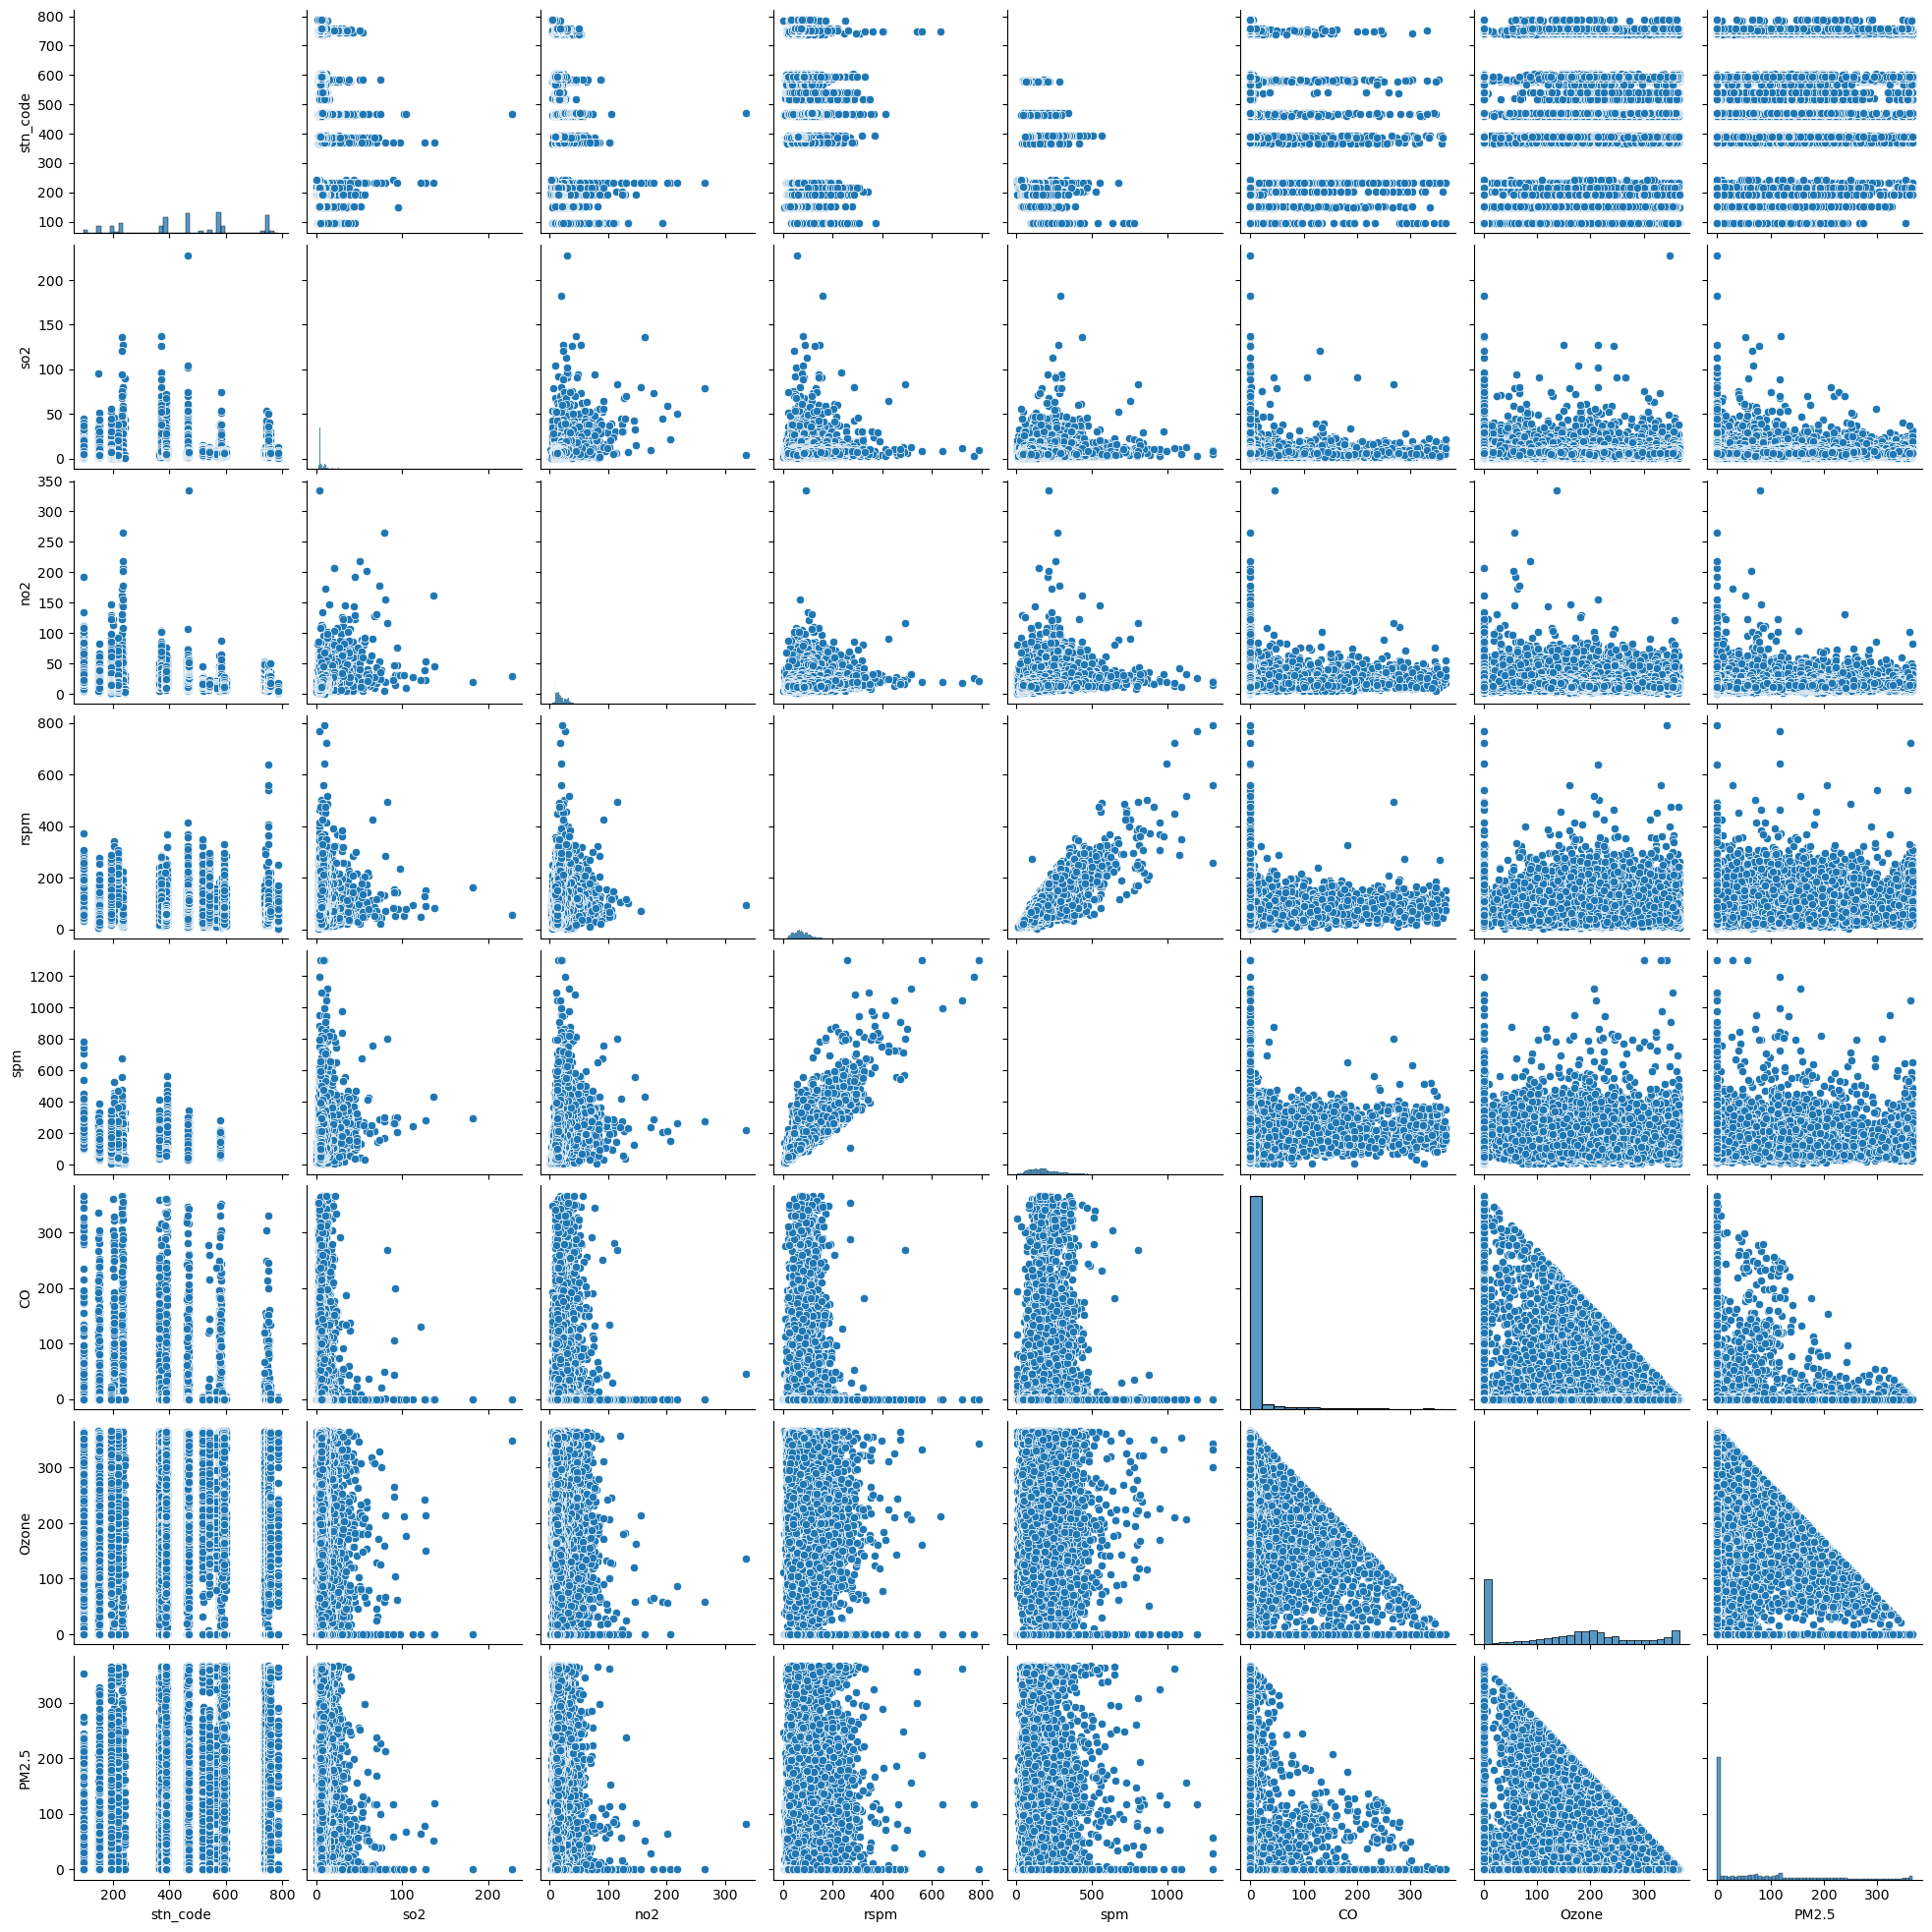

In [1210]:
sns.pairplot(data=df)

In [1211]:
df['state'].value_counts()
# Viewing values present in the state column

Andhra Pradesh       26368
Assam                 7728
Arunachal Pradesh       90
Name: state, dtype: int64

[]

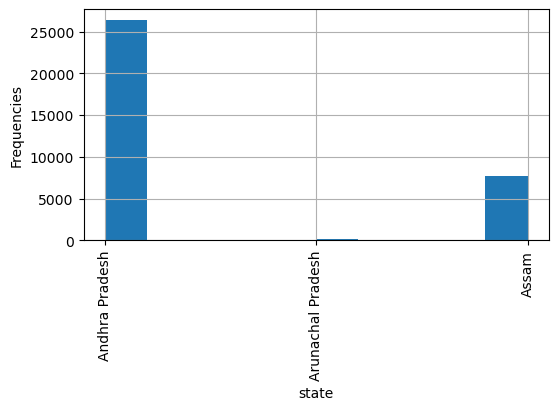

In [1212]:
plt.figure(figsize=(6, 3))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# states present in the dataset.

In [1213]:
df['type'].value_counts()
#types of areas 

Residential, Rural and other Areas    11957
Residential and others                11204
Industrial Area                        4530
Industrial Areas                       2275
Sensitive Area                         2083
Sensitive Areas                        1282
Name: type, dtype: int64

[]

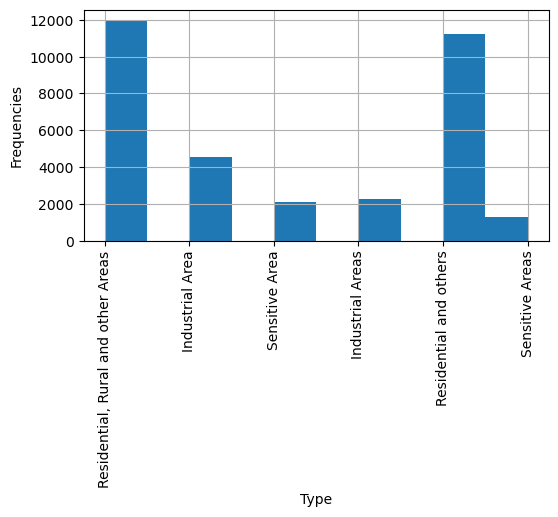

In [1214]:
plt.figure(figsize=(6, 3))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [1215]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

Andhra Pradesh State Pollution Control Board             15691
Assam State Pollution Control Board                       1794
Andhra Pradesh  Pollution Control Board                    610
National Environmental Engineering Research Institute      569
ASPB                                                       245
Arunachal Pradesh State Pollution Control Board             90
Name: agency, dtype: int64

[]

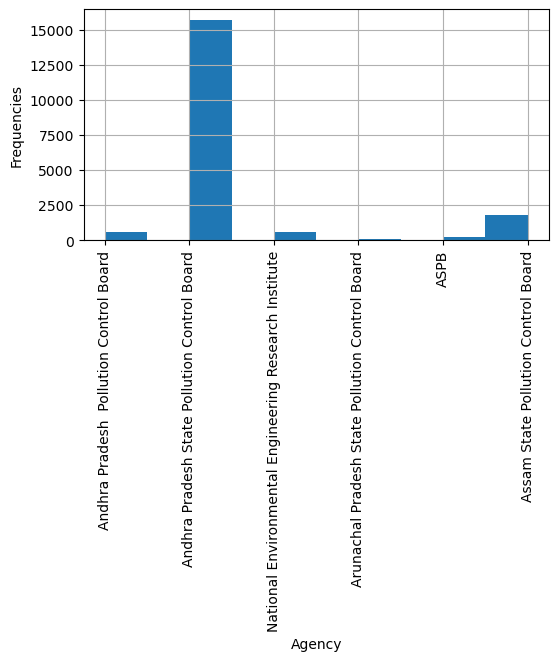

In [1216]:
plt.figure(figsize=(6, 3))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# the count of Agency present in the dataset.

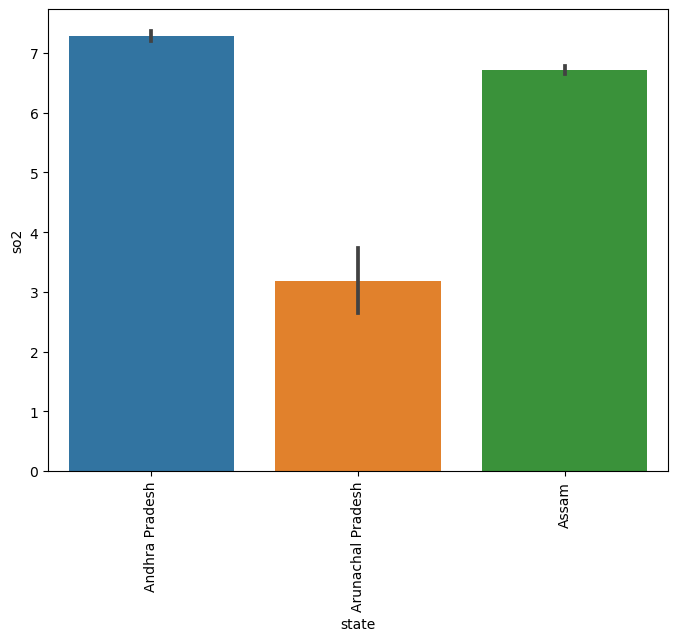

In [1217]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is andhra pradesh

In [1218]:
plt.rcParams['figure.figsize']=(8,6)

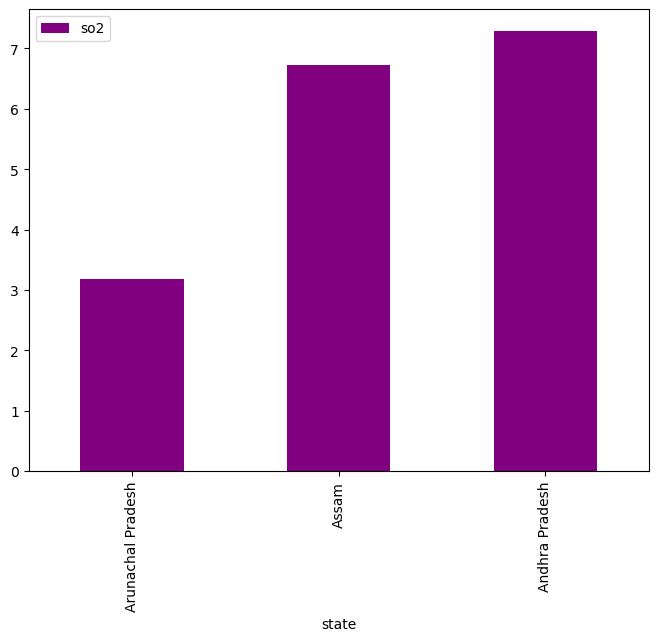

In [1219]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

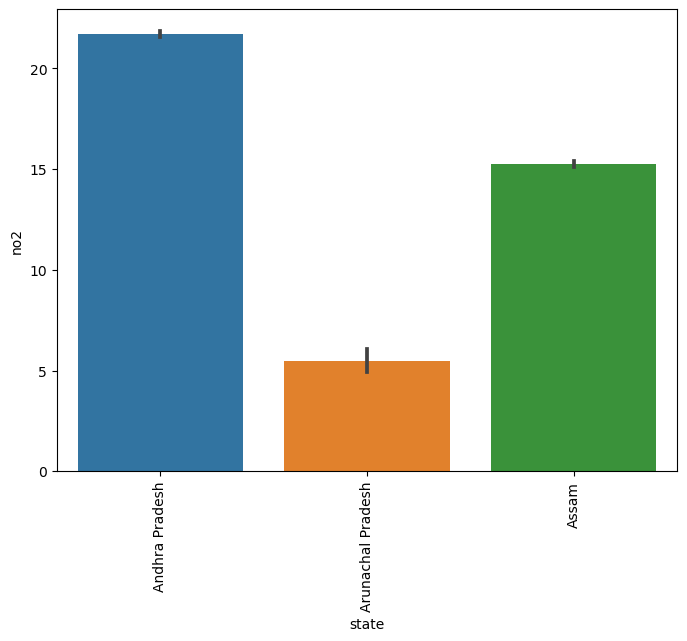

In [1220]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states 

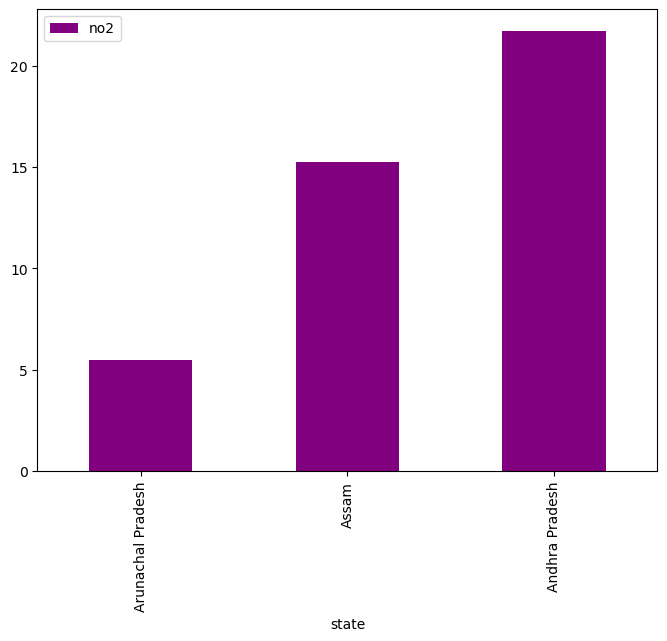

In [1221]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.


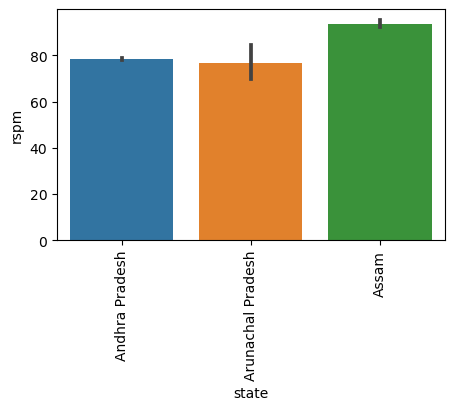

In [1222]:
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Assam has higher rspm level compared to other states 

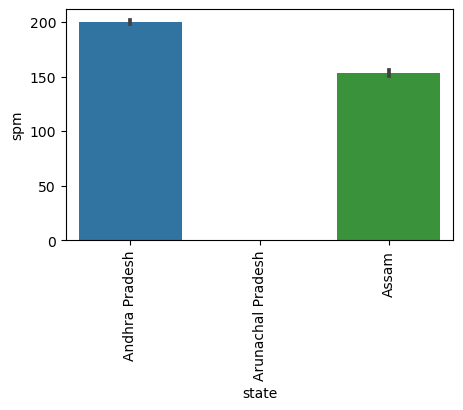

In [1223]:
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states 

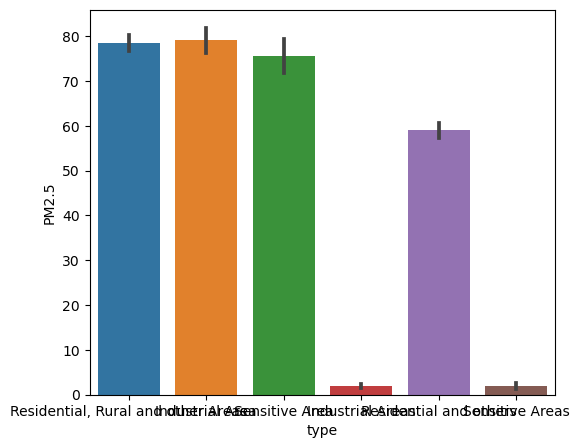

In [1224]:
plt.figure(figsize=(6,5))
sns.barplot(x='type',y='PM2.5',data=df);
plt.show()
# Assam has higher rspm level compared to other states

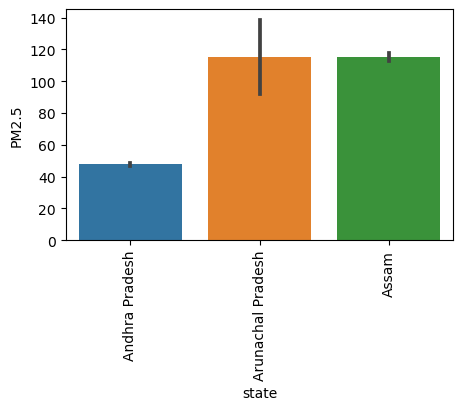

In [1225]:
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
sns.barplot(x='state',y='PM2.5',data=df);
# Delhi has higher pm2_5 level compared to other states 

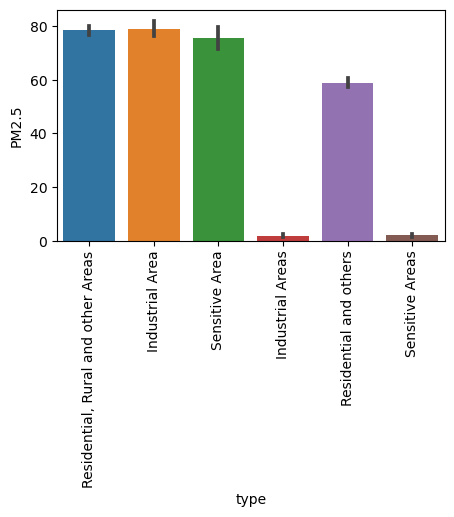

In [1226]:
plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
sns.barplot(x='type',y='PM2.5',data=df);

Text(0, 0.5, 'PM2.5')

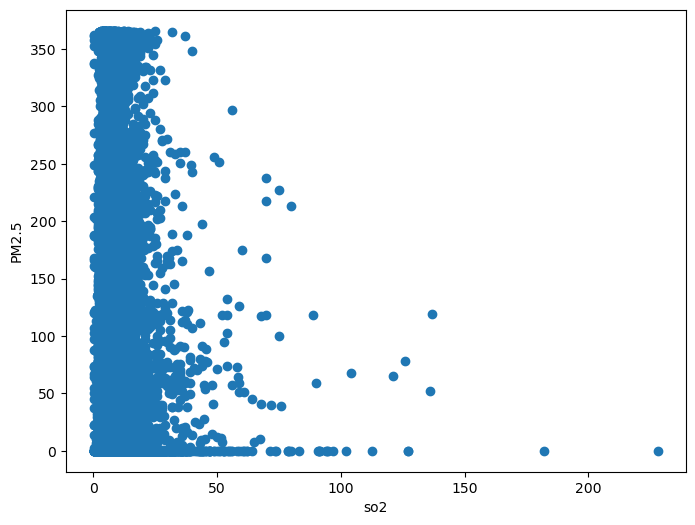

In [1227]:
plt.scatter(x='so2',y='PM2.5',data=df)
plt.xlabel('so2')
plt.ylabel('PM2.5')

Text(0, 0.5, 'PM2.5')

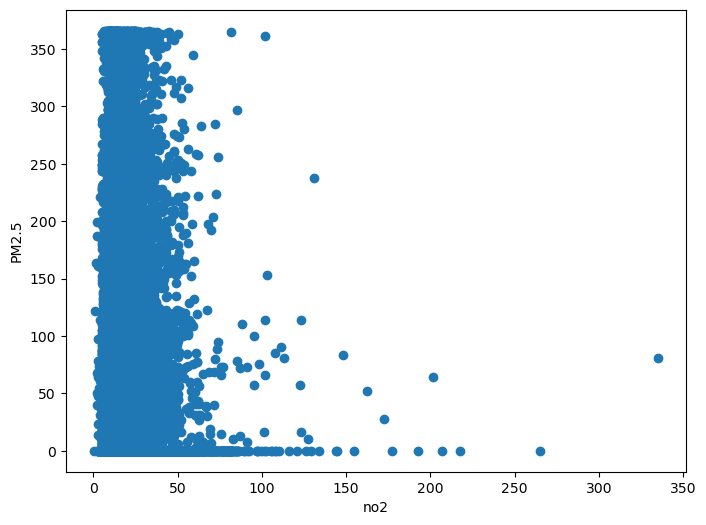

In [1228]:
plt.scatter(x='no2',y='PM2.5',data=df)
plt.xlabel('no2')
plt.ylabel('PM2.5')

Text(0, 0.5, 'PM2.5')

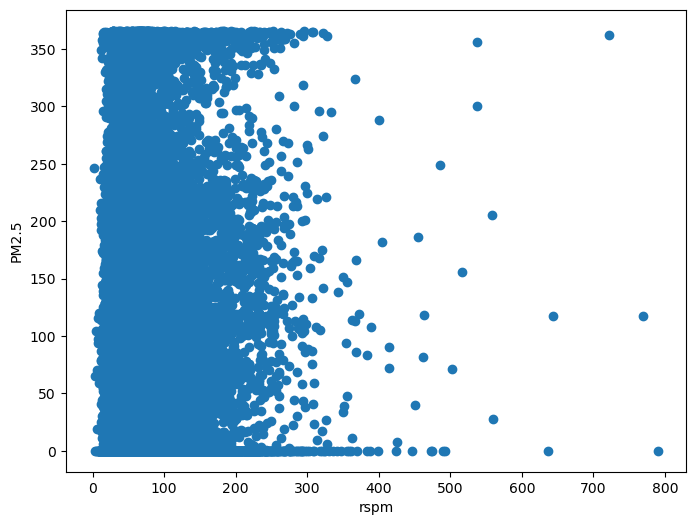

In [1229]:
plt.scatter(x='rspm',y='PM2.5',data=df)
plt.xlabel('rspm')
plt.ylabel('PM2.5')

Text(0, 0.5, 'PM2.5')

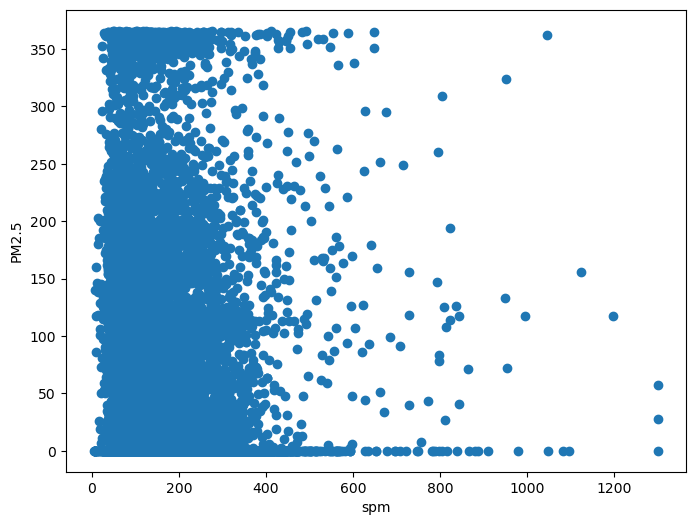

In [1230]:
plt.scatter(x='spm',y='PM2.5',data=df)
plt.xlabel('spm')
plt.ylabel('PM2.5')

Text(0, 0.5, 'PM2.5')

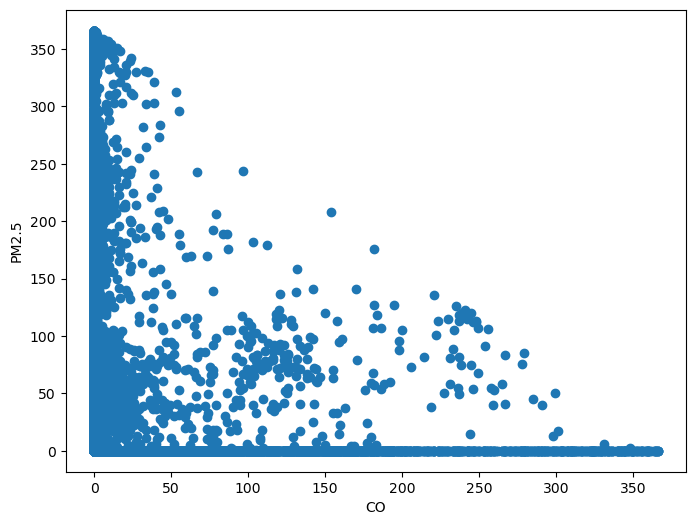

In [1231]:
plt.scatter(x='CO',y='PM2.5',data=df)
plt.xlabel('CO')
plt.ylabel('PM2.5')

Text(0, 0.5, 'PM2.5')

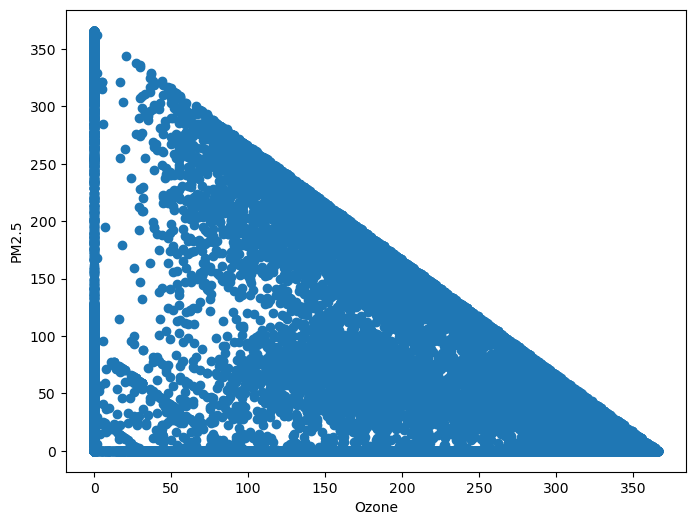

In [1232]:
plt.scatter(x='Ozone',y='PM2.5',data=df)
plt.xlabel('Ozone')
plt.ylabel('PM2.5')

Checking all null values and treating those null values.

In [1233]:
null_values = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [1234]:
null_values
# higher null values present in spm followed by spm

spm                            16502
agency                         15187
stn_code                       14761
rspm                            1417
location_monitoring_station     1281
type                             855
so2                              834
no2                              647
sampling_date                      0
state                              0
location                           0
date                               0
CO                                 0
Ozone                              0
PM2.5                              0
dtype: int64

In [1235]:
null_values_percentages = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value percentages)

In [1236]:
null_values_percentages

spm                            48.271222
agency                         44.424618
stn_code                       43.178494
rspm                            4.144972
location_monitoring_station     3.747148
type                            2.501024
so2                             2.439595
no2                             1.892588
sampling_date                   0.000000
state                           0.000000
location                        0.000000
date                            0.000000
CO                              0.000000
Ozone                           0.000000
PM2.5                           0.000000
dtype: float64

In [1237]:
missing_data_with_percentages = pd.concat([null_values, null_values_percentages], axis=1, keys=['TOTAL', 'Percentage'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [1238]:
missing_data_with_percentages

TOTAL  Percentage
spm                          16502   48.271222
agency                       15187   44.424618
stn_code                     14761   43.178494
rspm                          1417    4.144972
location_monitoring_station   1281    3.747148
type                           855    2.501024
so2                            834    2.439595
no2                            647    1.892588
sampling_date                    0    0.000000
state                            0    0.000000
location                         0    0.000000
date                             0    0.000000
CO                               0    0.000000
Ozone                            0    0.000000
PM2.5                            0    0.000000

In [1239]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping redundant columns

In [1240]:
df.isnull().sum()
# Now checking the null values

state           0
location        0
type          855
so2           834
no2           647
rspm         1417
spm         16502
CO              0
Ozone           0
PM2.5           0
dtype: int64

In [1241]:
df.head()

state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm  spm   CO  Ozone  PM2.5  
0   NaN  NaN  0.0   58.0    0.0  
1   NaN  NaN  1.0    2.0   55.0  
2   NaN  NaN  0.0   59.0    0.0  
3   NaN  NaN  0.0    0.0    1.0  
4   NaN  NaN  0.0   48.0    0.0

**Feature** **Engioneering**

FIRST NEEDS TO BE CHECKED THERE ARE ANY OULIERS OR NOT IN COLUMN THEN SHOULD BE APPLIED TECHNIQUE

In [1242]:
df.describe().T

count        mean         std  min    25%    50%    75%     max
so2    33352.0    7.147949    5.946795  0.4    4.1    5.1    8.2   228.0
no2    33539.0   20.200883   11.429543  0.5   12.0   17.0   26.6   334.9
rspm   32769.0   81.717272   45.214228  2.0   53.0   74.0  100.0   790.0
spm    17684.0  184.624497   99.794442  5.0  115.0  170.0  236.0  1300.0
CO     34186.0   10.762242   42.056897  0.0    0.0    0.0    0.0   366.0
Ozone  34186.0  151.626982  119.363197  0.0    0.0  167.0  235.0   366.0
PM2.5  34186.0   63.112297   93.186920  0.0    0.0    0.0  105.0   366.0

<AxesSubplot:xlabel='so2', ylabel='Density'>

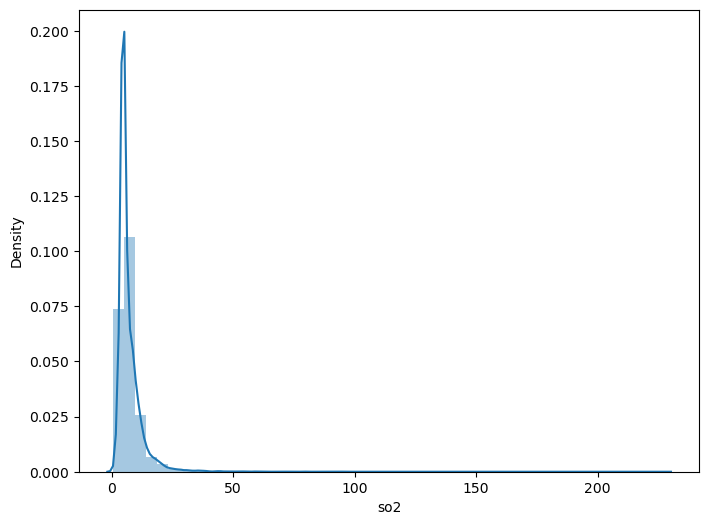

In [1243]:
sns.distplot(df['so2'])

<AxesSubplot:xlabel='so2'>

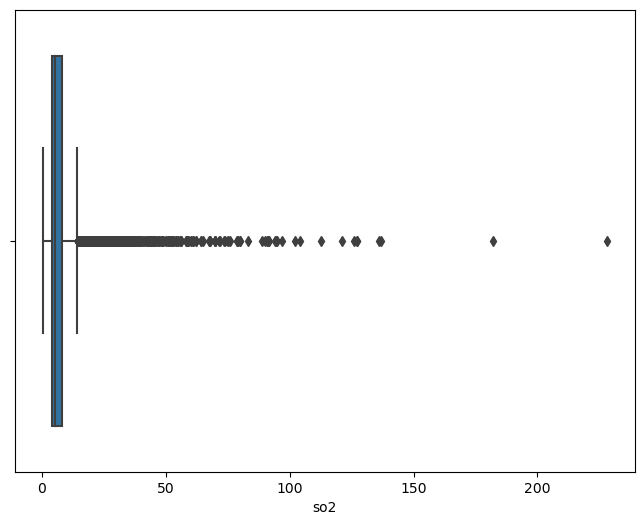

In [1244]:
sns.boxplot(df['so2'])

<AxesSubplot:xlabel='no2', ylabel='Density'>

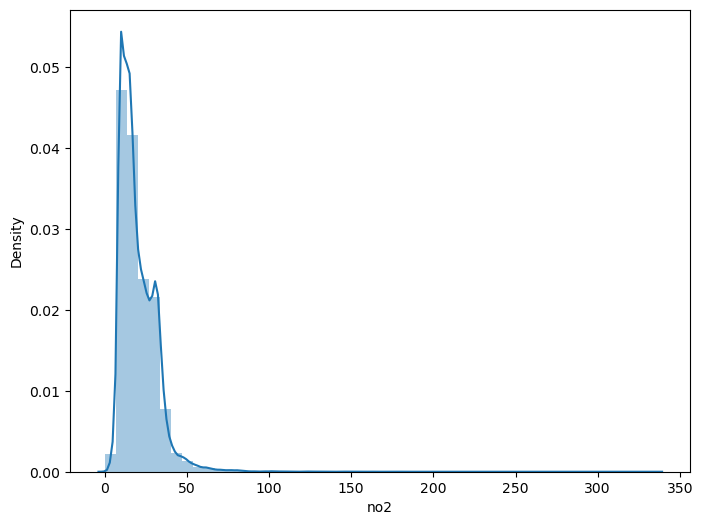

In [1245]:
sns.distplot(df['no2'])

<AxesSubplot:xlabel='no2'>

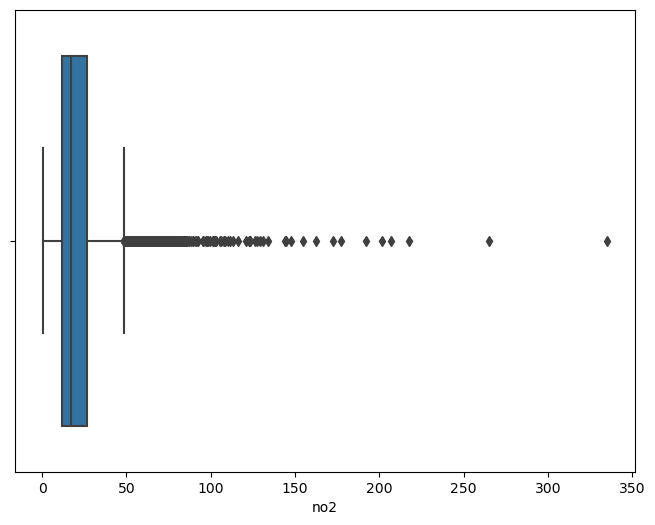

In [1246]:
sns.boxplot(df['no2'])

<AxesSubplot:xlabel='rspm', ylabel='Density'>

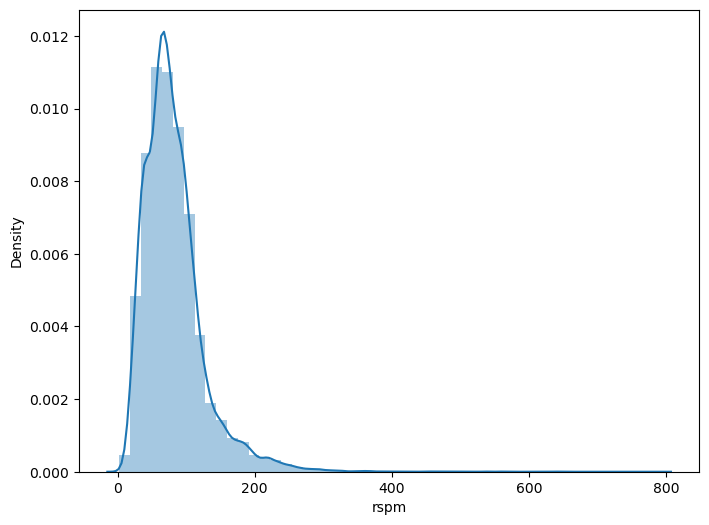

In [1247]:
sns.distplot(df['rspm'])

<AxesSubplot:xlabel='rspm'>

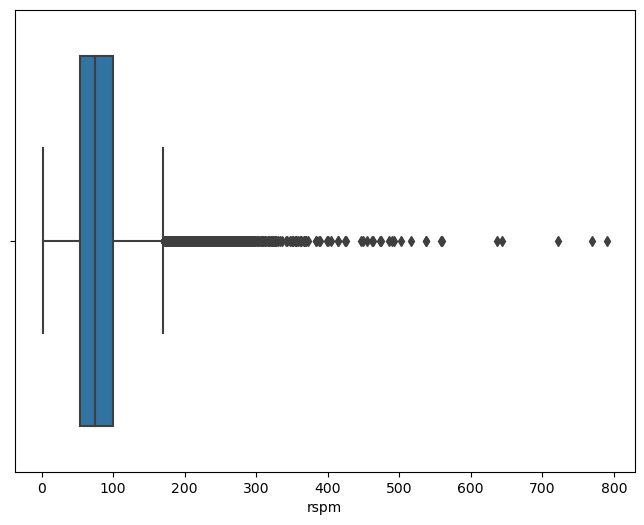

In [1248]:
sns.boxplot(df['rspm'])

<AxesSubplot:xlabel='spm', ylabel='Density'>

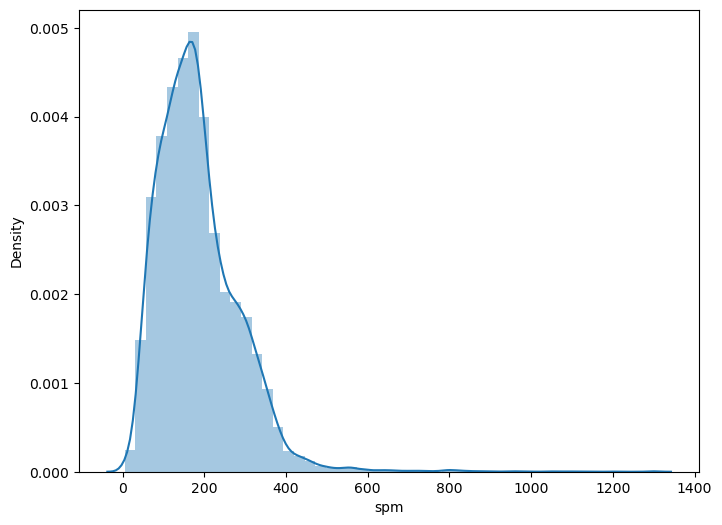

In [1249]:
sns.distplot(df['spm'])

<AxesSubplot:xlabel='spm'>

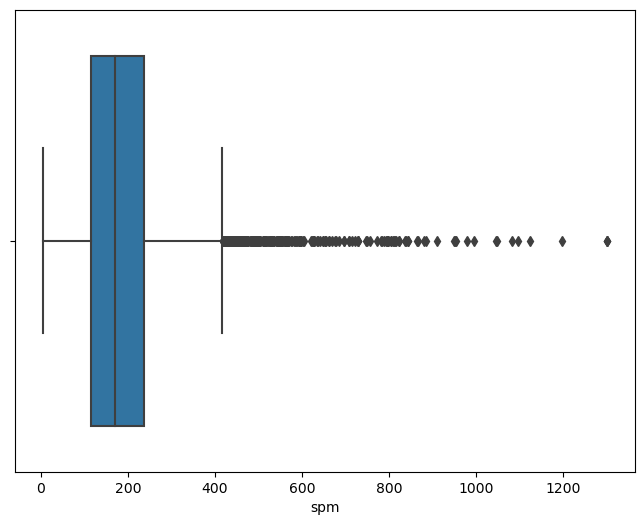

In [1250]:
sns.boxplot(df['spm'])

<AxesSubplot:xlabel='CO', ylabel='Density'>

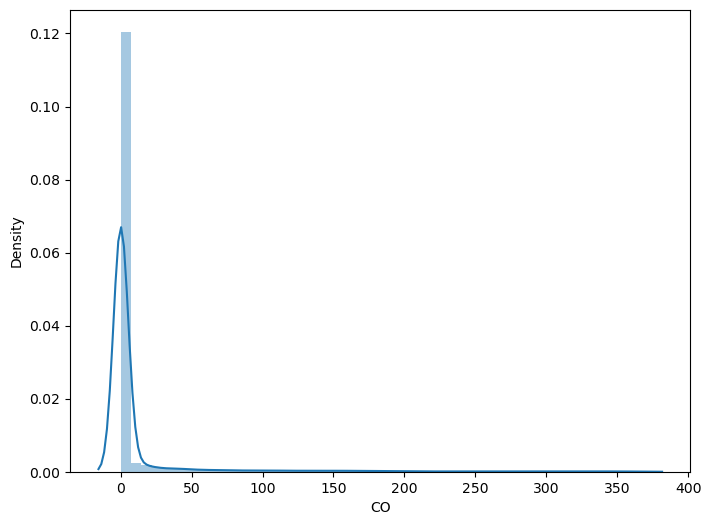

In [1251]:
sns.distplot(df['CO'])

<AxesSubplot:xlabel='CO'>

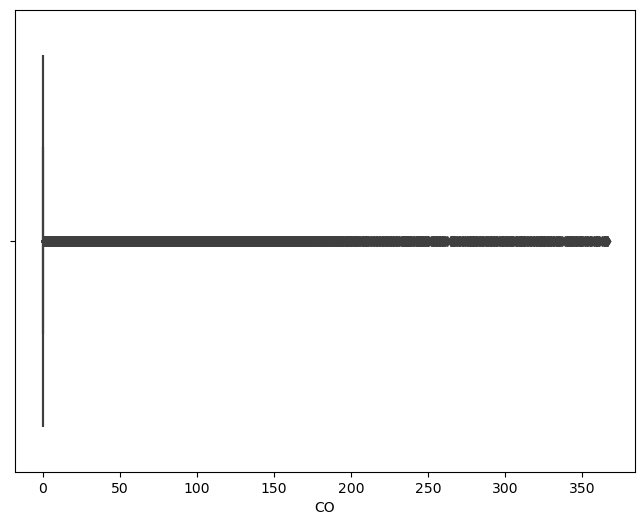

In [1252]:
sns.boxplot(df['CO'])

<AxesSubplot:xlabel='Ozone', ylabel='Density'>

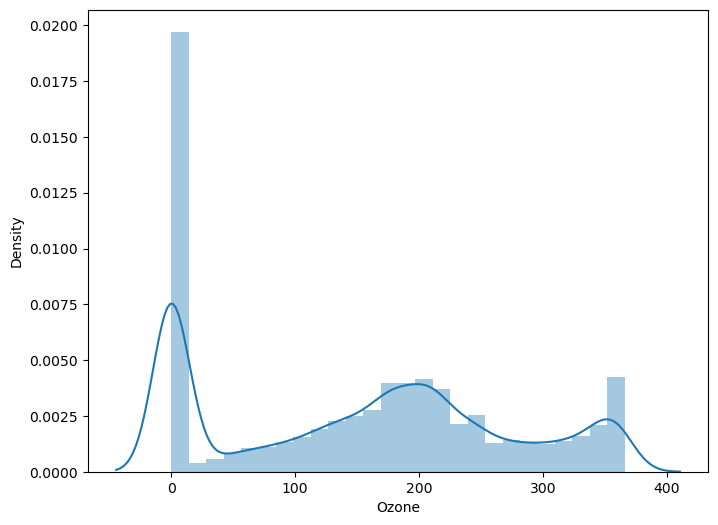

In [1253]:
sns.distplot(df['Ozone'])

<AxesSubplot:xlabel='Ozone'>

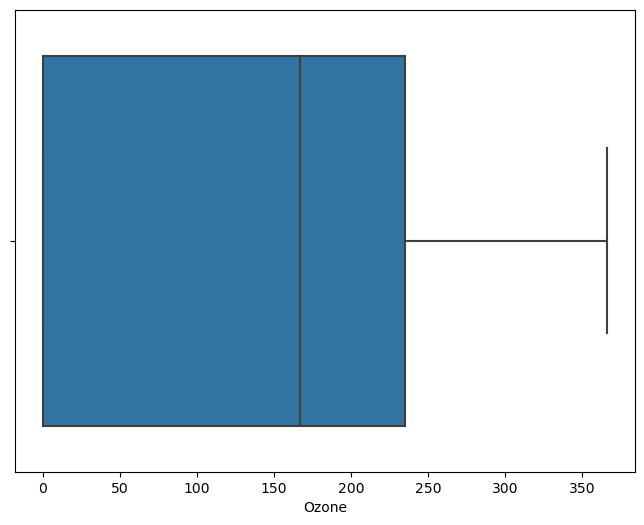

In [1254]:
sns.boxplot(df['Ozone'])

SINCE ALL COLUMNS except CO and Ozone HAVE NUMEROUS OUTLIERS SO NNEDS TO BE APPLIED MEDIAN TECHNIQUE WHICH BASICALLY ROBUST FOR OUTLIERS

In [1255]:
def fillednull_MF(dataf,vars):
  MF=dataf[vars].median()
  dataf[vars].fillna(MF,inplace=True)

In [1256]:
for features in ['so2','no2','rspm','spm']:
  fillednull_MF(df,features)


In [1257]:
df.isnull().sum()
# Now we have successfully filled null values by median which were present in the dataset

state         0
location      0
type        855
so2           0
no2           0
rspm          0
spm           0
CO            0
Ozone         0
PM2.5         0
dtype: int64

In [1258]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['PM2.5'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm    spm   CO  Ozone  PM2.5 AQI_Range  
0  74.0  170.0  0.0   58.0    0.0      Good  
1  74.0  170.0  1.0    2.0   55.0  Moderate  
2  74.0  170.0  0.0   59.0    0.0      Good  
3  74.0  170.0  0.0    0.0    1.0      Good  
4  74.0  170.0  0.0   48.0    0.0      Good

In [1259]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Good              21076
Poor               5234
Moderate           4291
Unhealthy          2163
Very unhealthy     1422
Name: AQI_Range, dtype: int64

In [1260]:
ranking={'Good':1,'Moderate':2,'Poor':3,'Unhealthy':4,'Very unhealthy':5}
ranking

{'Good': 1, 'Moderate': 2, 'Poor': 3, 'Unhealthy': 4, 'Very unhealthy': 5}

In [1261]:
df['AQI_RANKING']=df['AQI_Range'].map(ranking)

In [1262]:
df.head()

state   location                                type  so2   no2  \
0  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  4.8  17.4   
1  Andhra Pradesh  Hyderabad                     Industrial Area  3.1   7.0   
2  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.2  28.5   
3  Andhra Pradesh  Hyderabad  Residential, Rural and other Areas  6.3  14.7   
4  Andhra Pradesh  Hyderabad                     Industrial Area  4.7   7.5   

   rspm    spm   CO  Ozone  PM2.5 AQI_Range  AQI_RANKING  
0  74.0  170.0  0.0   58.0    0.0      Good            1  
1  74.0  170.0  1.0    2.0   55.0  Moderate            2  
2  74.0  170.0  0.0   59.0    0.0      Good            1  
3  74.0  170.0  0.0    0.0    1.0      Good            1  
4  74.0  170.0  0.0   48.0    0.0      Good            1

In [1263]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC

DATA **SPLITTING**

In [1264]:
X2=df[['so2','no2','rspm','spm','CO','Ozone']]
Y2=df['AQI_RANKING']
X2.head()
# we only select columns like so2, no2, rspm, spm,CO,Ozone

so2   no2  rspm    spm   CO  Ozone
0  4.8  17.4  74.0  170.0  0.0   58.0
1  3.1   7.0  74.0  170.0  1.0    2.0
2  6.2  28.5  74.0  170.0  0.0   59.0
3  6.3  14.7  74.0  170.0  0.0    0.0
4  4.7   7.5  74.0  170.0  0.0   48.0

In [1265]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X2,Y2,test_size=0.2,random_state=0)
print(X_train2.shape,X_test2.shape,Y_train2.shape,Y_test2.shape)
# splitting the data into training and testing data

(27348, 6) (6838, 6) (27348,) (6838,)


In [1266]:
X_train2.describe().T

count        mean         std  min    25%    50%    75%     max
so2    27348.0    7.075431    5.680104  0.4    4.2    5.1    8.0   137.0
no2    27348.0   20.108450   11.369125  0.5   12.0   17.0   26.2   334.9
rspm   27348.0   81.363589   44.255473  2.0   54.0   74.0   98.0   769.0
spm    27348.0  177.700183   72.518709  8.0  166.0  170.0  173.0  1300.0
CO     27348.0   10.889571   42.363496  0.0    0.0    0.0    0.0   366.0
Ozone  27348.0  151.492979  119.366715  0.0    0.0  166.0  235.0   366.0

**DATA SCALING**

#FOR TRAIN

In [1267]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
xtrain_scaled=pd.DataFrame(scaler.fit_transform(X_train2),columns=X_train2.columns)
xtrain_scaled.head()

so2       no2      rspm  spm   CO     Ozone
0 -0.289474 -0.563380 -0.272727  0.0  0.0  0.672340
1  1.552632 -0.563380 -1.090909  0.0  0.0 -0.161702
2 -0.289474 -0.563380 -0.590909  0.0  0.0 -0.706383
3  0.236842  2.676056  1.295455  0.0  0.0 -0.706383
4  0.500000 -0.070423 -0.909091  0.0  0.0 -0.706383

In [1268]:
xtrain_scaled.describe().T

count       mean        std        min       25%  50%       75%  \
so2    27348.0   0.519850   1.494764  -1.236842 -0.236842  0.0  0.763158   
no2    27348.0   0.218905   0.800643  -1.161972 -0.352113  0.0  0.647887   
rspm   27348.0   0.167354   1.005806  -1.636364 -0.454545  0.0  0.545455   
spm    27348.0   1.100026  10.359816 -23.142857 -0.571429  0.0  0.428571   
CO     27348.0  10.889571  42.363496   0.000000  0.000000  0.0  0.000000   
Ozone  27348.0  -0.061732   0.507943  -0.706383 -0.706383  0.0  0.293617   

              max  
so2     34.710526  
no2     22.387324  
rspm    15.795455  
spm    161.428571  
CO     366.000000  
Ozone    0.851064

In [1269]:
xtrain_scaled.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
CO       0
Ozone    0
dtype: int64

In [1270]:
xtrain_scaled.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
CO       0
Ozone    0
dtype: int64

<AxesSubplot:xlabel='so2', ylabel='Density'>

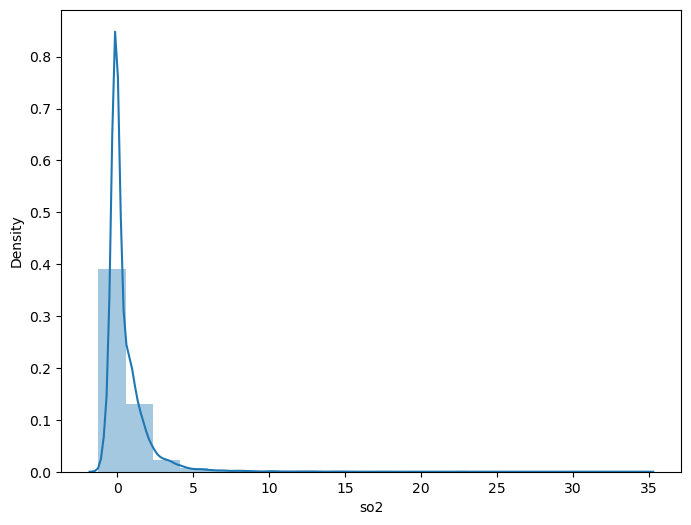

In [1271]:
sns.distplot(xtrain_scaled['so2'],bins=20)

<AxesSubplot:xlabel='no2', ylabel='Density'>

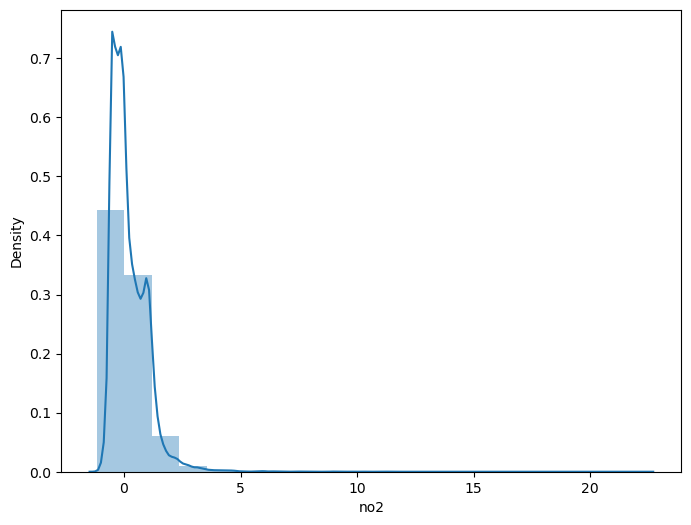

In [1272]:
sns.distplot(xtrain_scaled['no2'],bins=20)

<AxesSubplot:xlabel='rspm', ylabel='Density'>

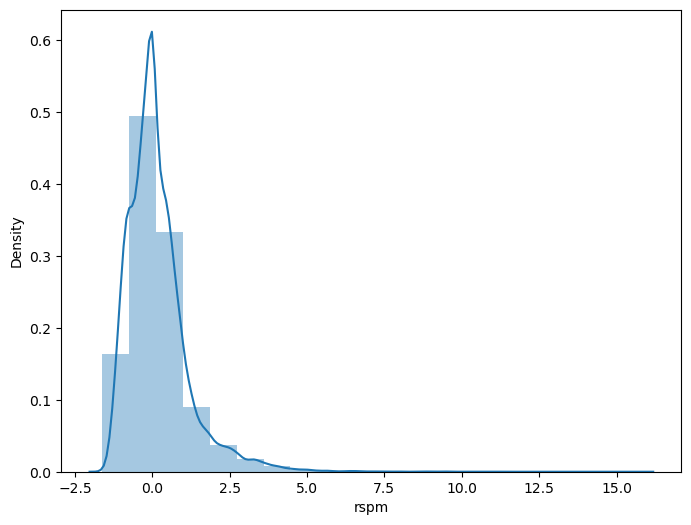

In [1273]:
sns.distplot(xtrain_scaled['rspm'],bins=20)

<AxesSubplot:xlabel='spm', ylabel='Density'>

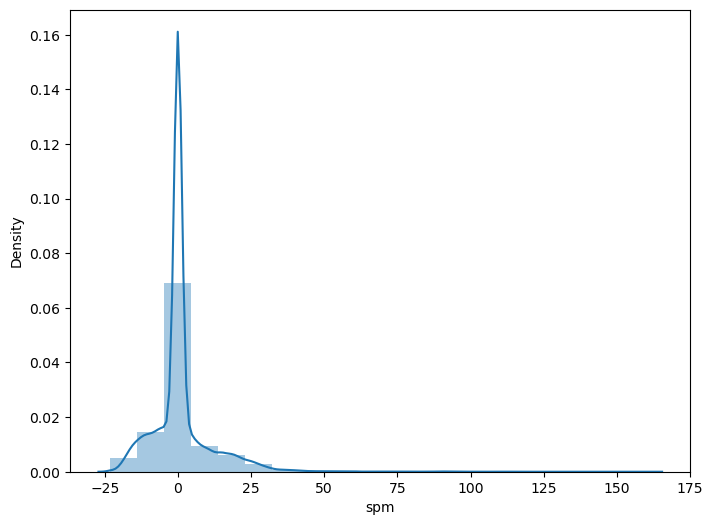

In [1274]:
sns.distplot(xtrain_scaled['spm'],bins=20)

<AxesSubplot:xlabel='CO', ylabel='Density'>

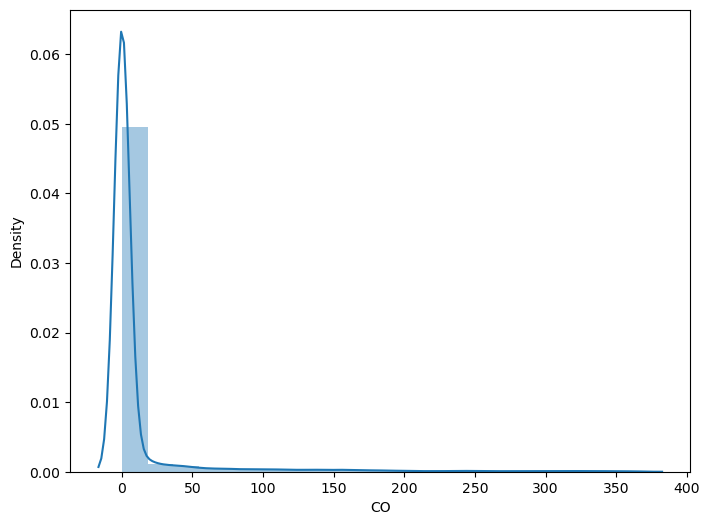

In [1275]:
sns.distplot(xtrain_scaled['CO'],bins=20)

<AxesSubplot:xlabel='Ozone', ylabel='Density'>

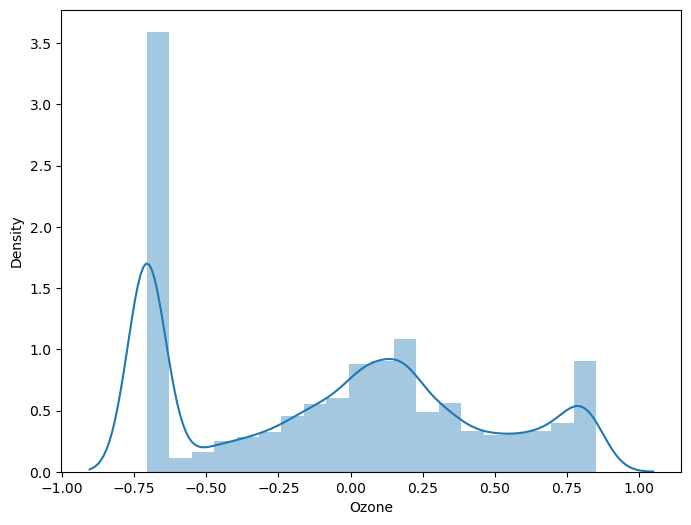

In [1276]:
sns.distplot(xtrain_scaled['Ozone'],bins=20)

In [1277]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'CO', 'Ozone',
       'PM2.5', 'AQI_Range', 'AQI_RANKING'],
      dtype='object')

#DATA SCALING FOR TEST

In [1278]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
xtest_scaled=pd.DataFrame(scaler.fit_transform(X_test2),columns=X_test2.columns)
xtest_scaled.head()

so2       no2      rspm        spm   CO     Ozone
0  1.000000  0.486111 -0.577778   0.000000  0.0 -0.029787
1  0.487179  0.486111  0.333333   0.000000  0.0 -0.710638
2  2.025641  0.069444  0.266667   0.000000  0.0  0.063830
3  0.000000  0.000000 -0.911111 -13.666667  2.0 -0.395745
4 -0.538462 -0.347222  1.644444   0.000000  0.0  0.042553

In [1279]:
xtest_scaled.describe().T

count       mean        std        min       25%  50%       75%  \
so2    6838.0   0.535435   1.699815  -1.205128 -0.205128  0.0  0.794872   
no2    6838.0   0.226923   0.775579  -1.041667 -0.347222  0.0  0.652778   
rspm   6838.0   0.167391   0.987788  -1.555556 -0.444444  0.0  0.555556   
spm    6838.0   1.170786  11.772198 -27.500000 -0.666667  0.0  0.333333   
CO     6838.0  10.252998  40.806715   0.000000  0.000000  0.0  0.000000   
Ozone  6838.0  -0.063137   0.507899  -0.710638 -0.710638  0.0  0.289362   

              max  
so2     57.153846  
no2     13.944444  
rspm    15.911111  
spm    188.333333  
CO     360.000000  
Ozone    0.846809

In [1280]:
xtest_scaled.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
CO       0
Ozone    0
dtype: int64

<AxesSubplot:xlabel='so2', ylabel='Density'>

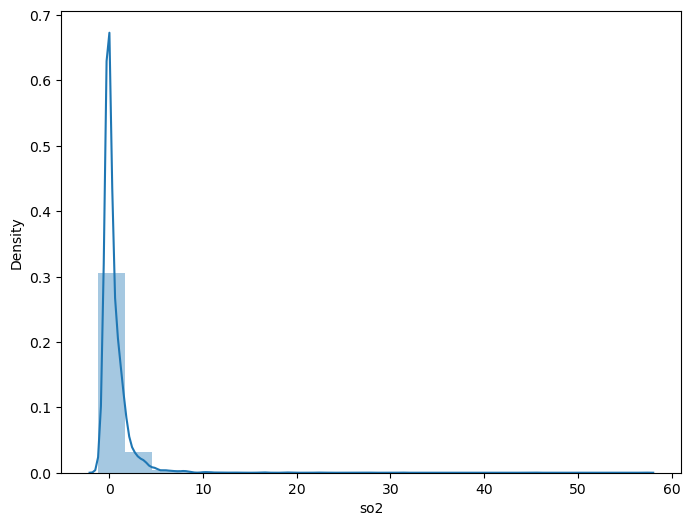

In [1281]:
sns.distplot(xtest_scaled['so2'],bins=20)

<AxesSubplot:xlabel='no2', ylabel='Density'>

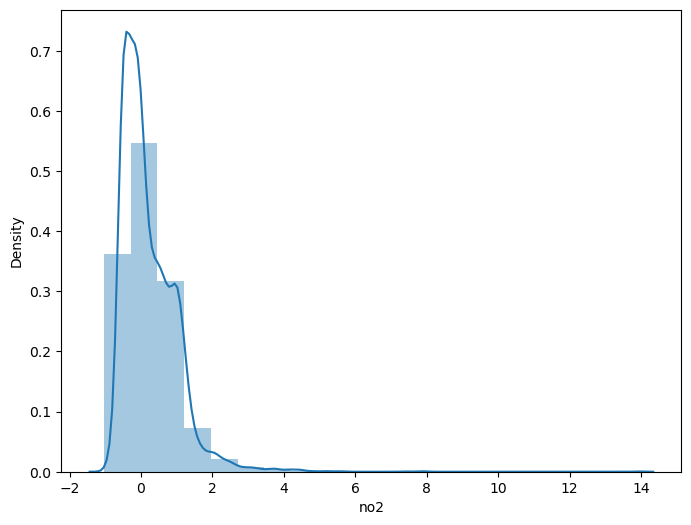

In [1282]:
sns.distplot(xtest_scaled['no2'],bins=20)

<AxesSubplot:xlabel='rspm', ylabel='Density'>

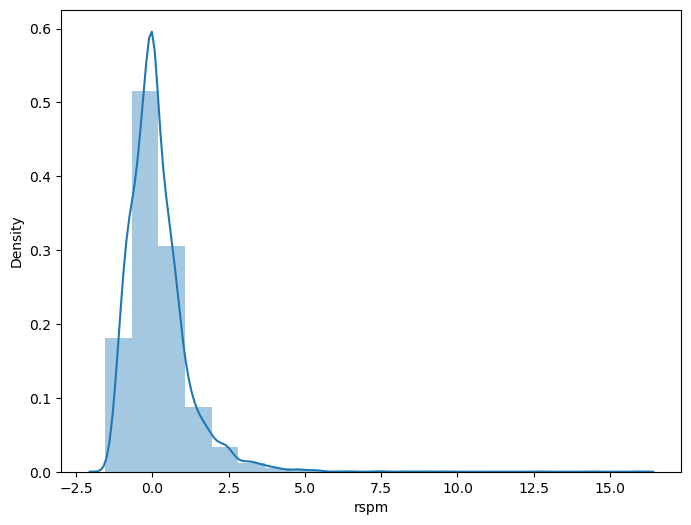

In [1283]:
sns.distplot(xtest_scaled['rspm'],bins=20)

<AxesSubplot:xlabel='spm', ylabel='Density'>

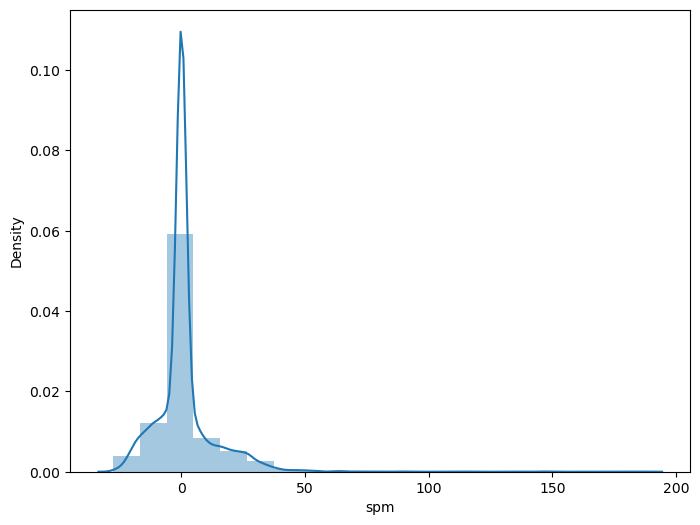

In [1284]:
sns.distplot(xtest_scaled['spm'],bins=20)

<AxesSubplot:xlabel='CO', ylabel='Density'>

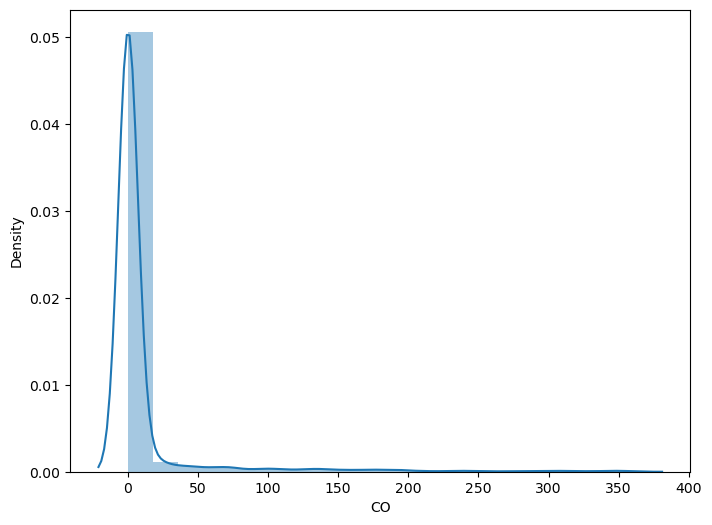

In [1285]:
sns.distplot(xtest_scaled['CO'],bins=20)

<AxesSubplot:xlabel='Ozone', ylabel='Density'>

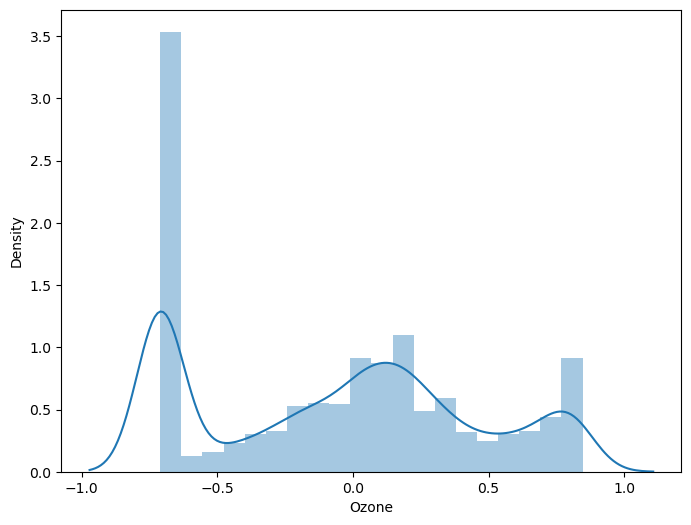

In [1286]:
sns.distplot(xtest_scaled['Ozone'],bins=20)

DATA TRANSFORMATION

In [1287]:
import scipy.stats as stat
import pylab 

In [1288]:
#### want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(dataf,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    X_train2[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(X_train2[feature],dist='norm',plot=pylab)
    plt.show()

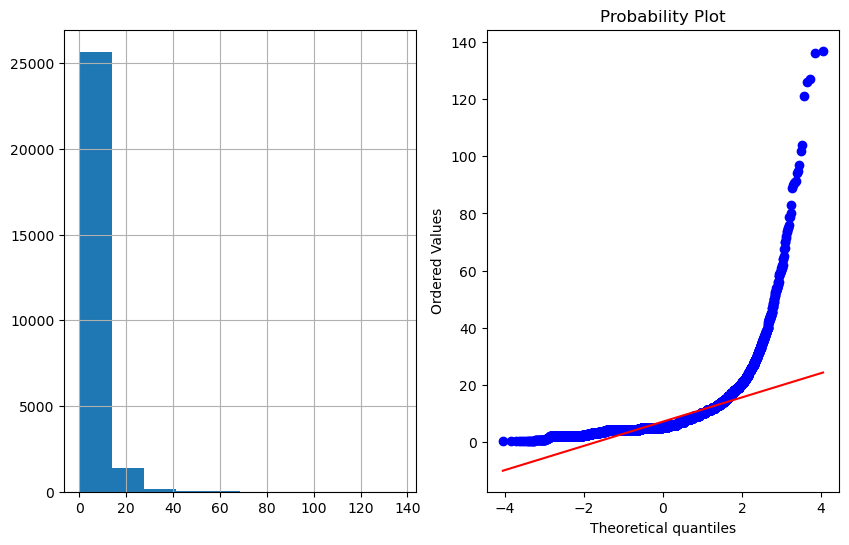

In [1289]:
#before transformation
plot_data(X_train2,'so2')

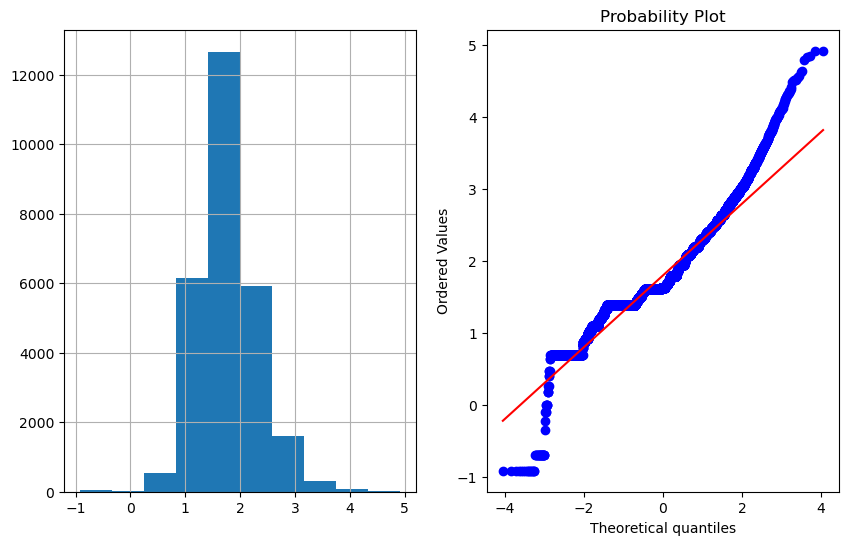

In [1290]:
#logaritm transformation for so2
import numpy as np
X_train2['so2']=np.log(X_train2['so2'])
plot_data(X_train2,'so2')

In [1291]:
##### Square Root Transformation
#X_train2['so2']=X_train2.so2**(1/2)
#plot_data(X_train2,'so2')

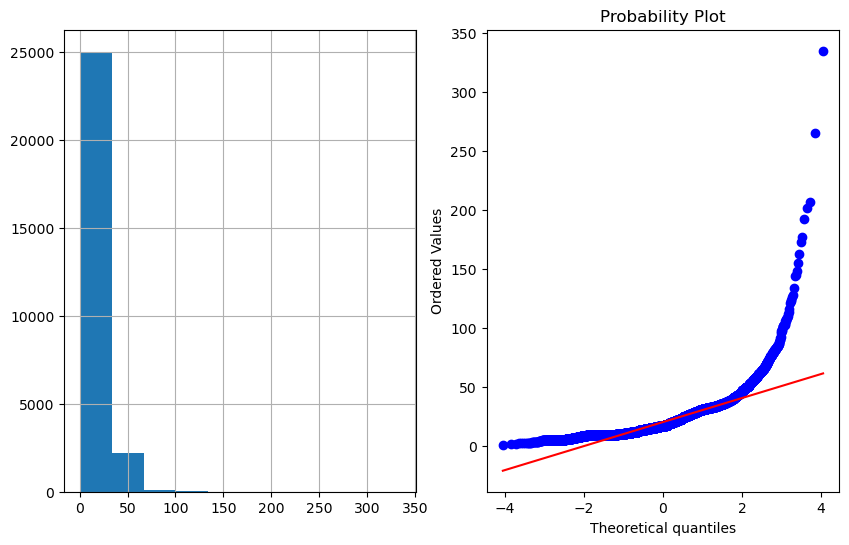

In [1292]:
#before transformation
plot_data(X_train2,'no2')

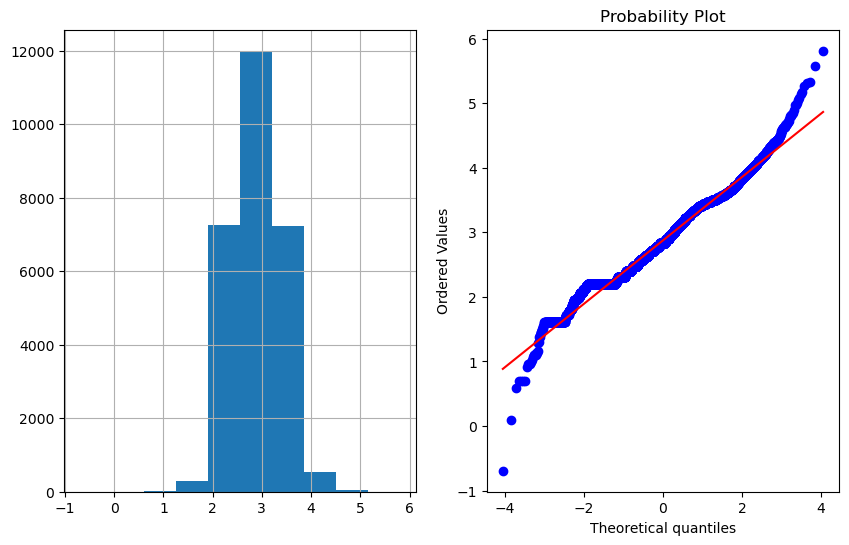

In [1293]:
#logaritm transformation for no2
import numpy as np
X_train2['no2']=np.log(X_train2['no2'])
plot_data(X_train2,'no2')

In [1294]:
##### Square Root Transformation
#X_train2['no2']=X_train2.no2**(1/2)
#plot_data(X_train2,'no2')

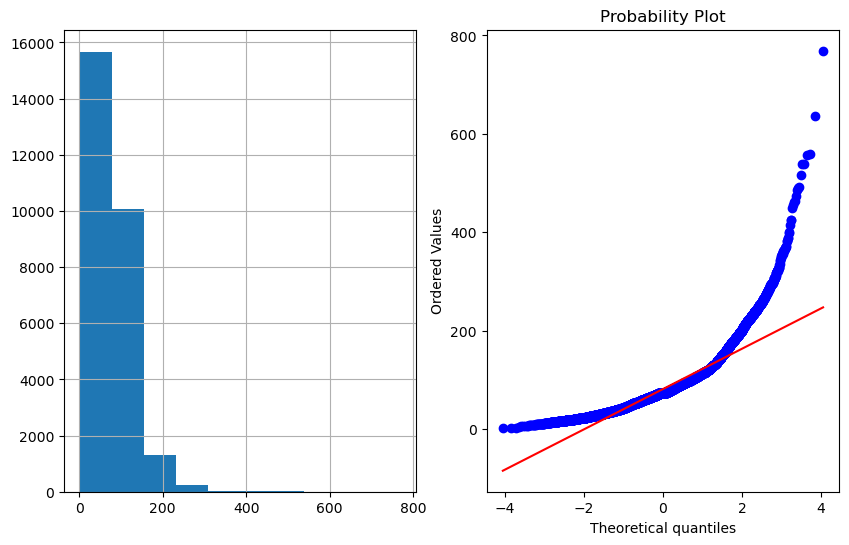

In [1295]:
#before transformation
plot_data(X_train2,'rspm')

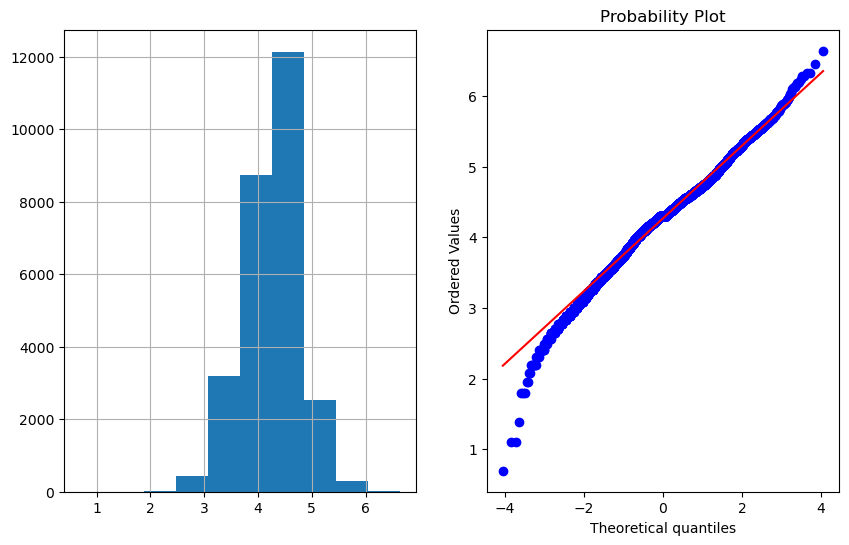

In [1296]:
#logaritm transformation for rspm
import numpy as np
X_train2['rspm']=np.log(X_train2['rspm'])
plot_data(X_train2,'rspm')

In [1297]:
##### Square Root Transformation
#X_train2['rspm']=X_train2.rspm**(1/2)
#plot_data(X_train2,'rspm')

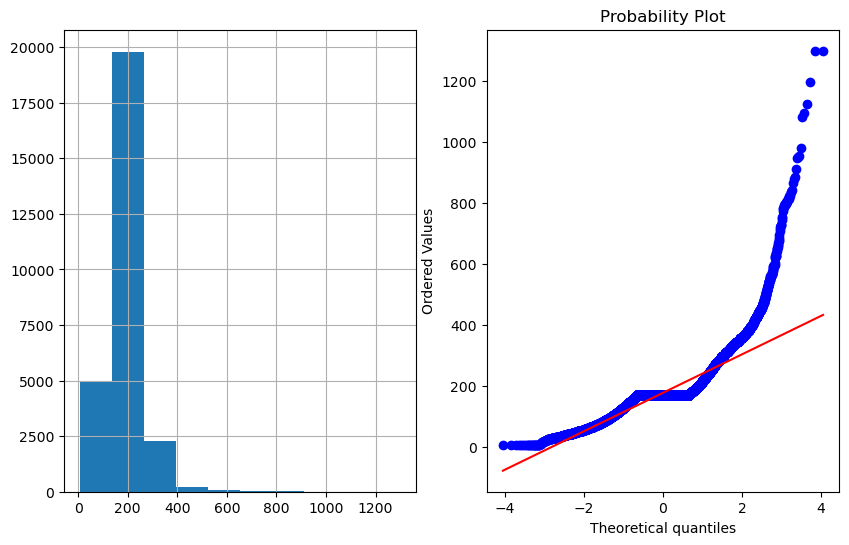

In [1298]:
#before transformation
plot_data(X_train2,'spm')

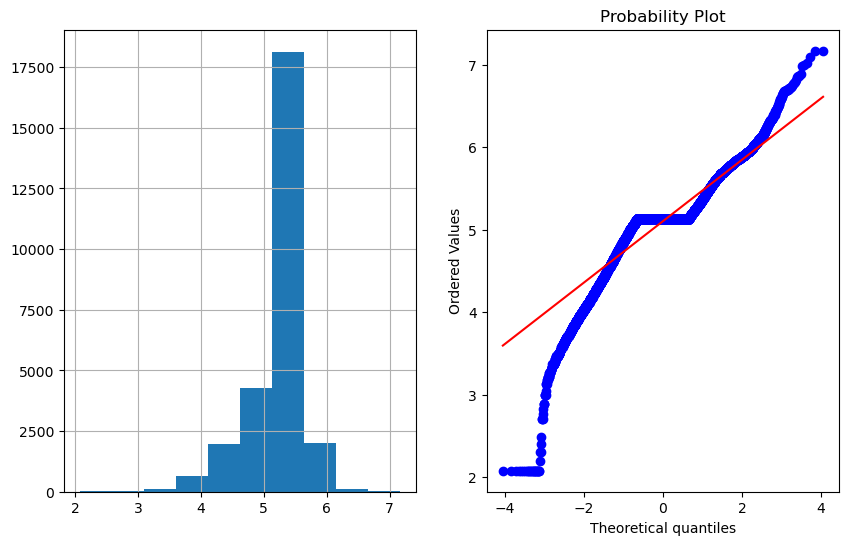

In [1299]:
#logaritm transformation for spm
import numpy as np
X_train2['spm']=np.log(X_train2['spm'])
plot_data(X_train2,'spm')

In [1300]:
##### Square Root Transformation
#X_train2['spm']=X_train2.spm**(1/2)
#plot_data(X_train2,'spm')

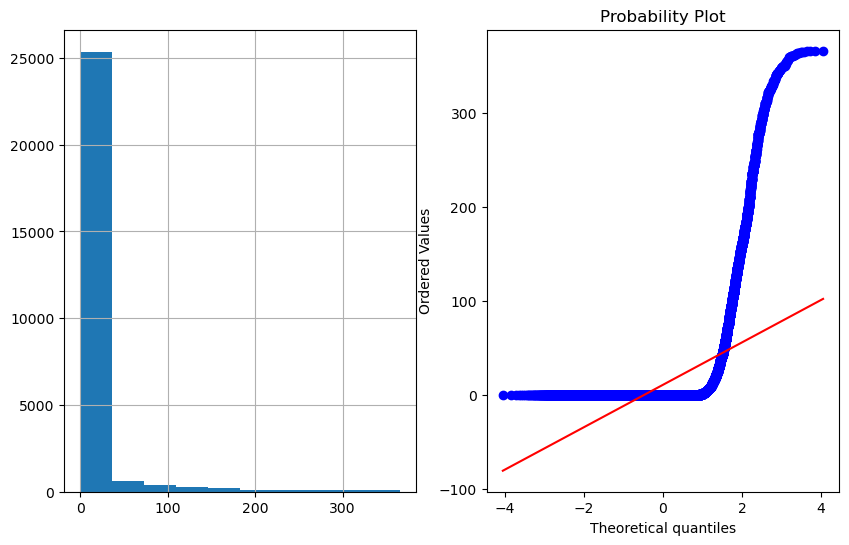

In [1301]:
#before transformation
plot_data(X_train2,'CO')

In [1302]:
# #logaritm transformation for spm
# import numpy as np
# X_train2['CO']=np.log(X_train2['CO'])
# plot_data(X_train2,'CO')

In [1303]:
##### Square Root Transformation
#X_train2['CO']=X_train2.CO**(1/2)
#plot_data(X_train2,'CO')

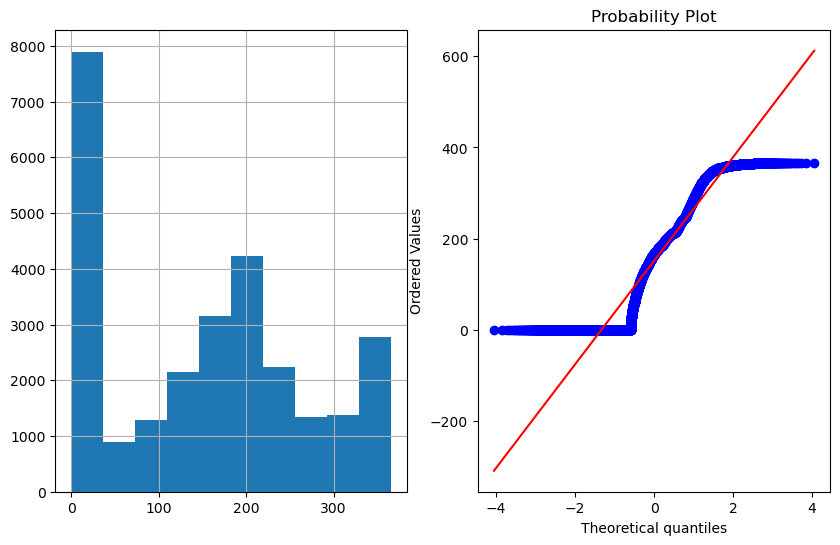

In [1304]:
plot_data(X_train2,'Ozone')

In [1305]:
X_train2.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
CO       0
Ozone    0
dtype: int64

#DATA TRANSFORMATION FOR TEST DATA 

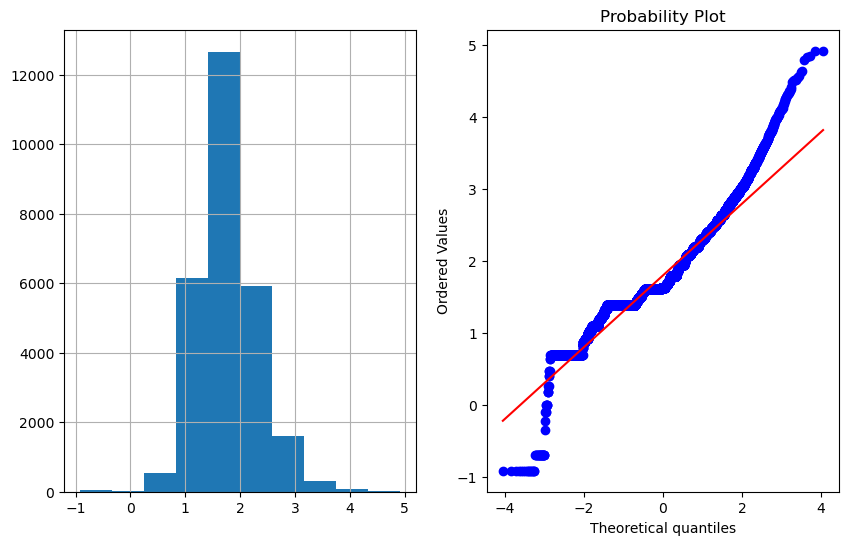

In [1306]:
#before transformation
plot_data(X_test2,'so2')

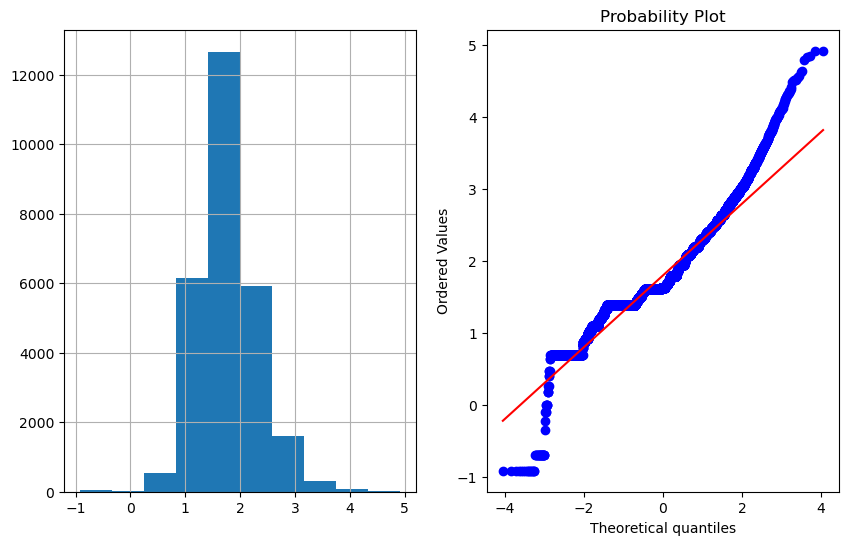

In [1307]:
#logaritm transformation for so2
import numpy as np
X_test2['so2']=np.log(X_test2['so2'])
plot_data(X_test2,'so2')

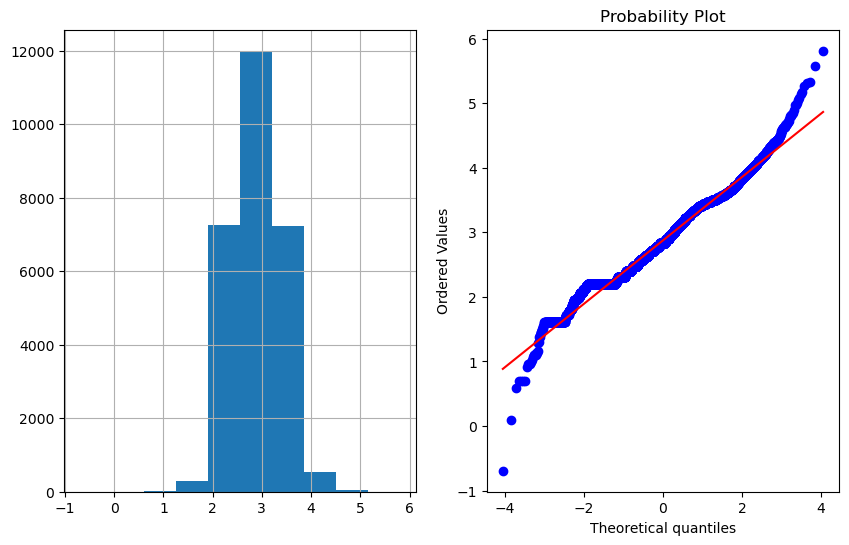

In [1308]:
#before transformation
plot_data(X_test2,'no2')

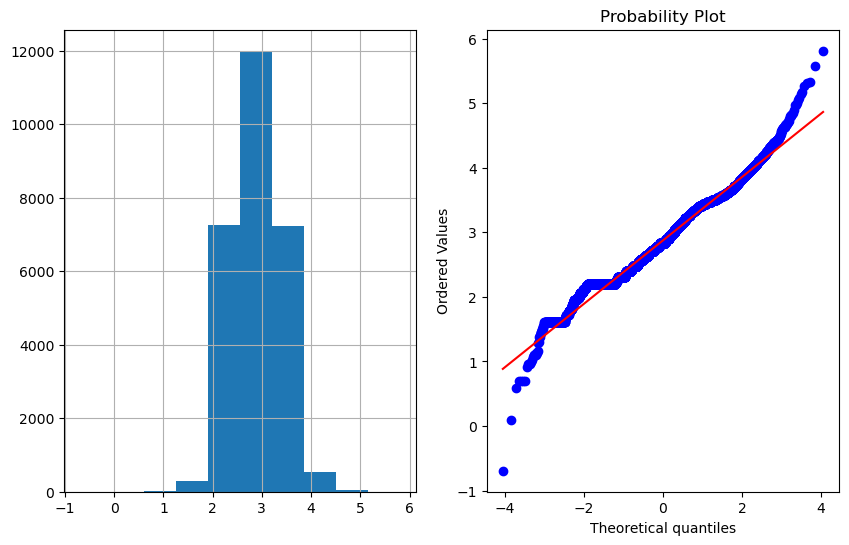

In [1309]:
#logaritm transformation for no2
import numpy as np
X_test2['no2']=np.log(X_test2['no2'])
plot_data(X_test2,'no2')

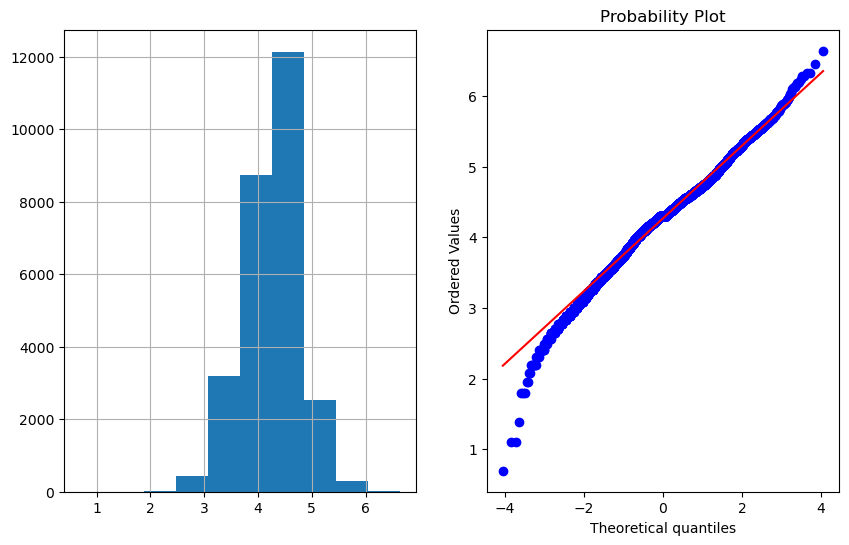

In [1310]:
#before transformation
plot_data(X_test2,'rspm')

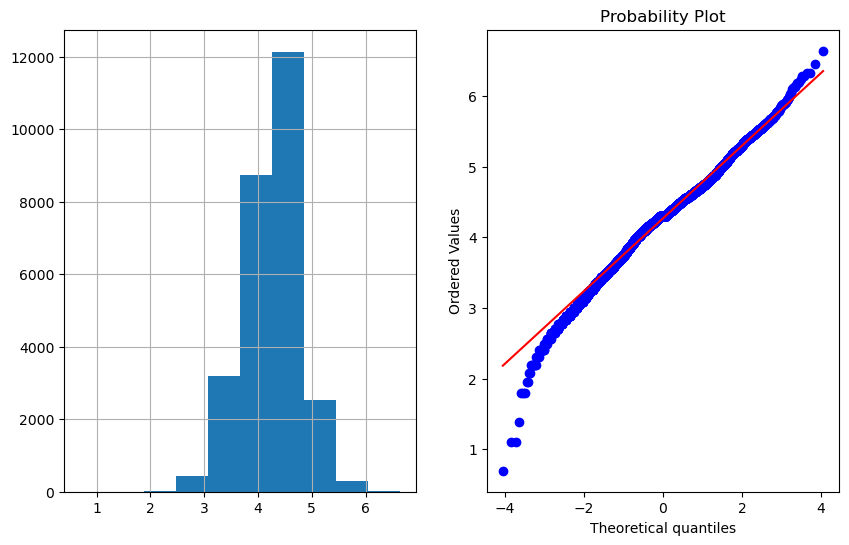

In [1311]:
#logaritm transformation for rspm
import numpy as np
X_test2['rspm']=np.log(X_test2['rspm'])
plot_data(X_test2,'rspm')

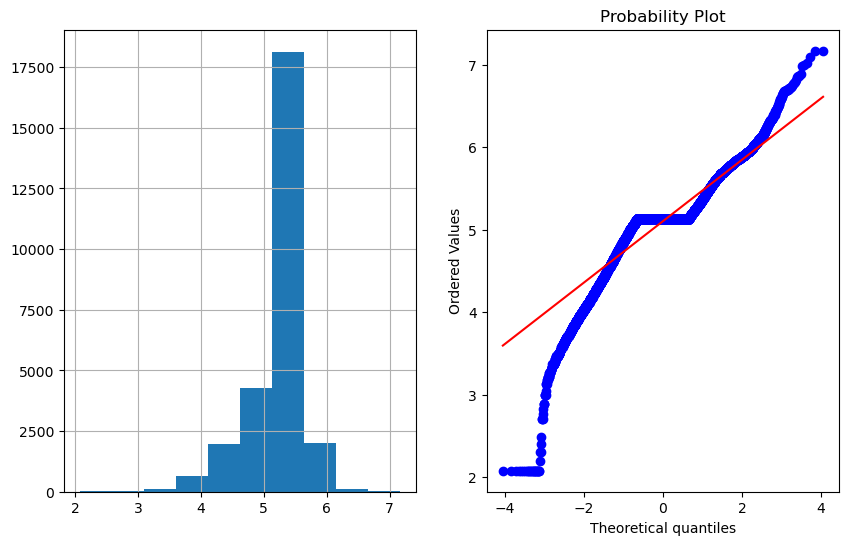

In [1312]:
#before transformation
plot_data(X_test2,'spm')

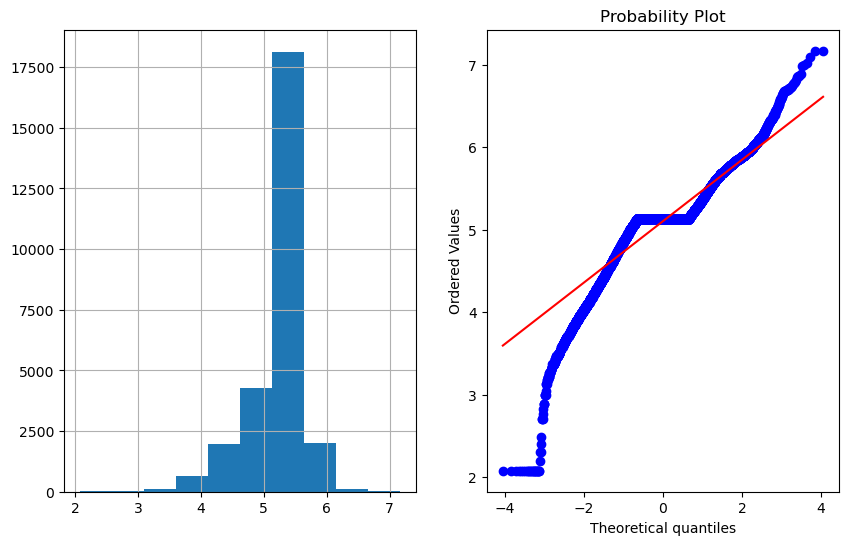

In [1313]:
#logaritm transformation for spm
import numpy as np
X_test2['spm']=np.log(X_test2['spm'])
plot_data(X_test2,'spm')

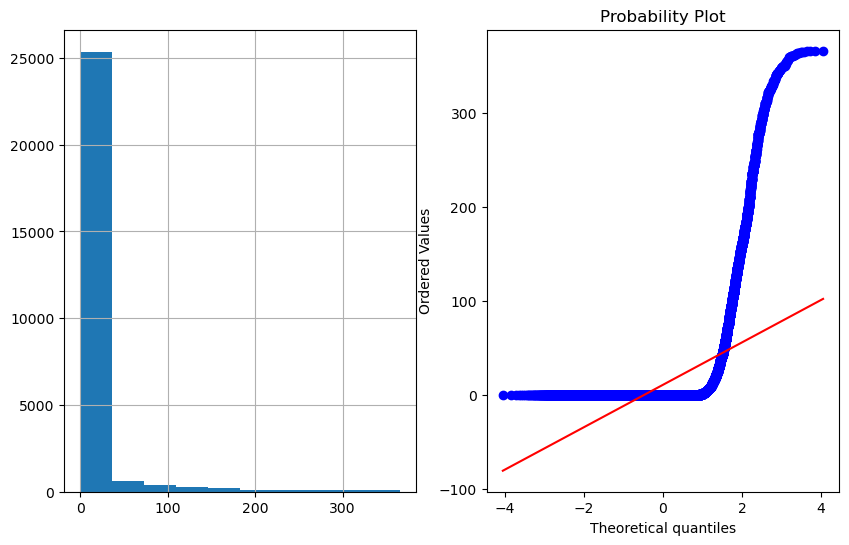

In [1314]:
#before transformation
plot_data(X_test2,'CO')

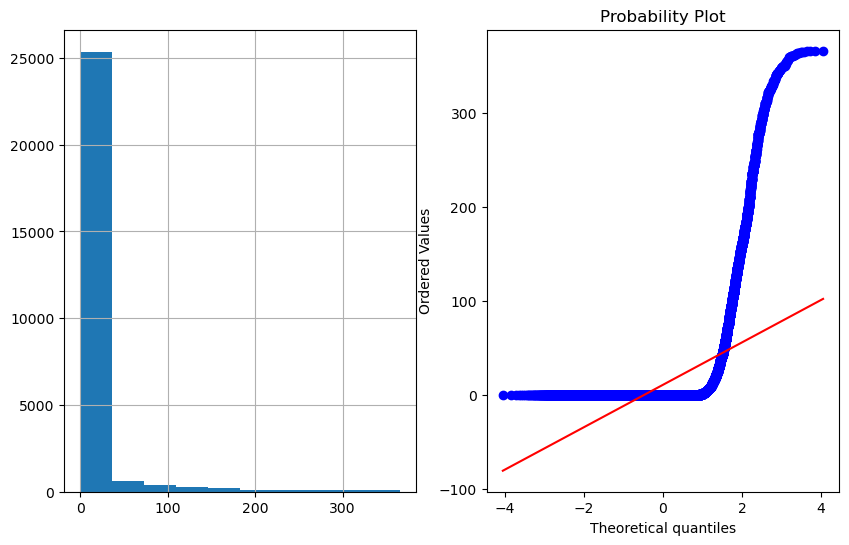

In [1315]:
#logaritm transformation for Ozone
import numpy as np
X_test2['CO']=np.log(X_test2['CO'])
plot_data(X_test2,'CO')

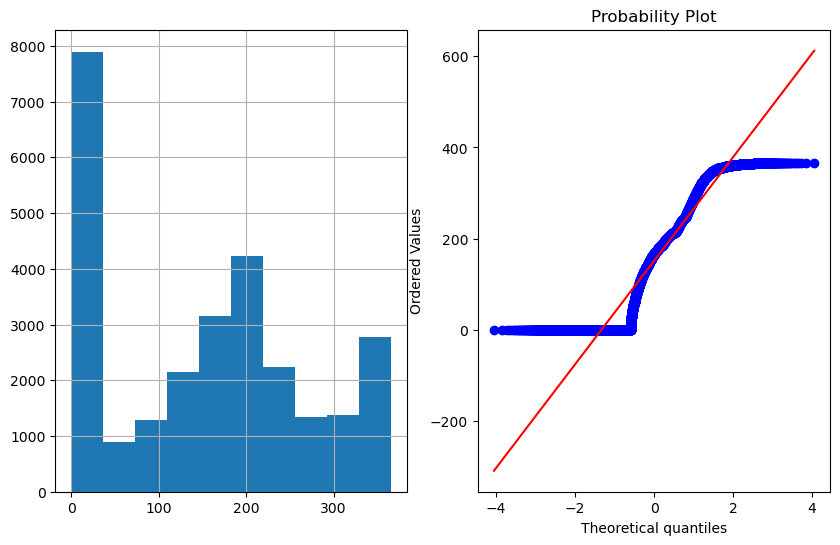

In [1316]:
#before transformation
plot_data(X_test2,'Ozone')

In [1317]:
X_train2.shape

(27348, 6)

In [1318]:
X_test2.shape

(6838, 6)

**Data Balancing by SMOTE**

#for train

Class=1, n=16843 (61.588%)
Class=4, n=1707 (6.242%)
Class=5, n=1144 (4.183%)
Class=3, n=4190 (15.321%)
Class=2, n=3464 (12.666%)


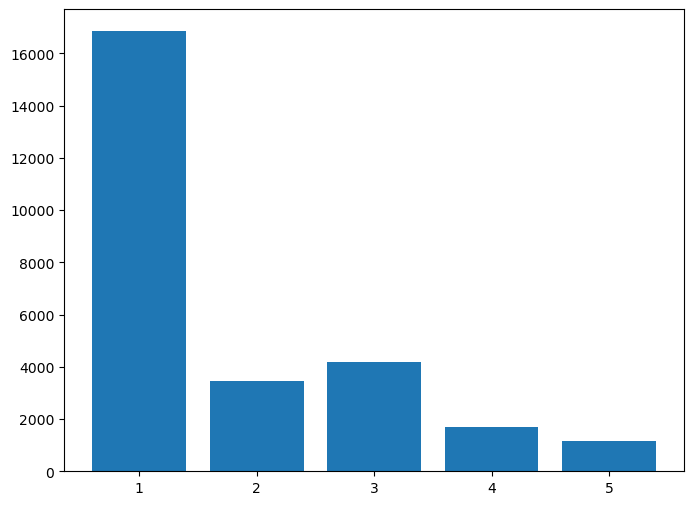

In [1319]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
counter = Counter(Y_train2)
for k,v in counter.items():
    per = v / len(Y_train2) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [1320]:
X_train2.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
CO       0
Ozone    0
dtype: int64

In [1321]:
# from pandas import read_csv
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from matplotlib import pyplot
# oversample = SMOTE()
# X_train2, Y_train2 = oversample.fit_resample(X_train2,Y_train2)
# # summarize distribution
# counter = Counter(Y_train2)
# for k,v in counter.items():
#     per = v / len(Y_train2) * 100
#     print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [1322]:
X_train2.shape

(27348, 6)

In [1323]:
Y_train2.shape

(27348,)

In [1324]:
Y_train2.value_counts()

1    16843
3     4190
2     3464
4     1707
5     1144
Name: AQI_RANKING, dtype: int64

#FOR TEST DATA BALANCING 

In [1325]:
X_test2.shape

(6838, 6)

In [1326]:
Y_test2.shape

(6838,)

In [1327]:
Y_test2.value_counts()

1    4233
3    1044
2     827
4     456
5     278
Name: AQI_RANKING, dtype: int64

Class=3, n=1044 (15.268%)
Class=1, n=4233 (61.904%)
Class=2, n=827 (12.094%)
Class=4, n=456 (6.669%)
Class=5, n=278 (4.066%)


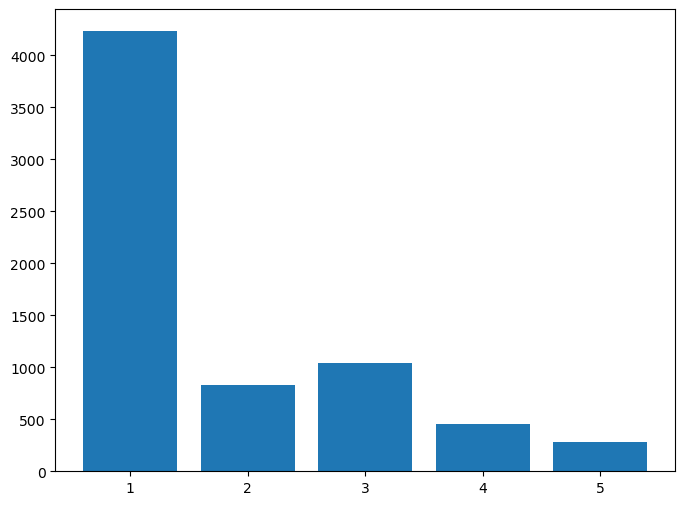

In [1328]:
counter = Counter(Y_test2)
for k,v in counter.items():
    per = v / len(Y_test2) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [1329]:
# oversample = SMOTE()
# X_test2, Y_test2 = oversample.fit_resample(X_test2,Y_test2)
# # summarize distribution
# counter = Counter(Y_test2)
# for k,v in counter.items():
#     per = v / len(Y_test2) * 100
#     print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# # plot the distribution
# pyplot.bar(counter.keys(), counter.values())
# pyplot.show()

In [1330]:
X_test2.shape

(6838, 6)

In [1331]:
Y_test2.shape

(6838,)

In [1332]:
Y_test2.value_counts()

1    4233
3    1044
2     827
4     456
5     278
Name: AQI_RANKING, dtype: int64

# DETECTING AND REMOVING OUTLIERS BY GAUSSIAN RANGE AND IQR

#detection outliers for train data

In [1333]:
X_train2.describe().T

count        mean         std       min       25%         50%  \
so2    27348.0    1.797571    0.516778 -0.916291  1.435085    1.629241   
no2    27348.0    2.874994    0.495177 -0.693147  2.484907    2.833213   
rspm   27348.0    4.269130    0.517819  0.693147  3.988984    4.304065   
spm    27348.0    5.104048    0.408568  2.079442  5.111988    5.135798   
CO     27348.0   10.889571   42.363496  0.000000  0.000000    0.000000   
Ozone  27348.0  151.492979  119.366715  0.000000  0.000000  166.000000   

              75%         max  
so2      2.079442    4.919981  
no2      3.265759    5.813832  
rspm     4.584967    6.645091  
spm      5.153292    7.170120  
CO       0.000000  366.000000  
Ozone  235.000000  366.000000

<AxesSubplot:xlabel='so2'>

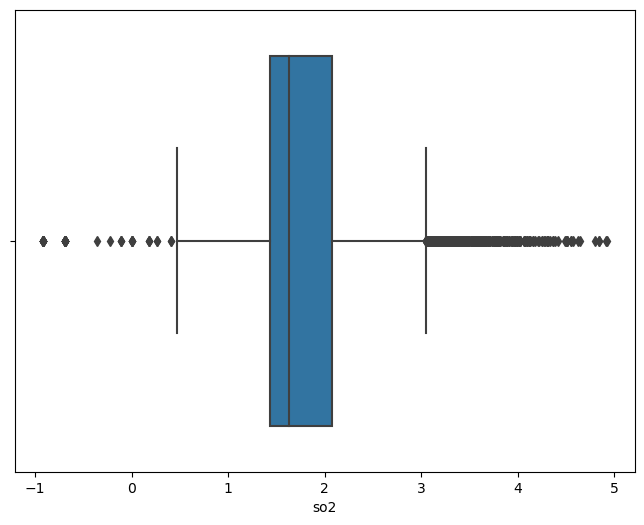

In [1334]:
sns.boxplot(X_train2.so2)

In [1335]:
upper_limit=X_train2['so2'].mean()+3*X_train2['so2'].std()
upper_limit

3.3479044265671396

In [1336]:
lower_limit=X_train2['so2'].mean()-3*X_train2['so2'].std()
lower_limit

0.2472366844423084

In [1337]:
#removing outlier
#X_train2.loc[X_train2['SOi']>=3,'SOi']=3

In [1338]:
#sns.boxplot(X_train2.SOi)

<AxesSubplot:xlabel='no2'>

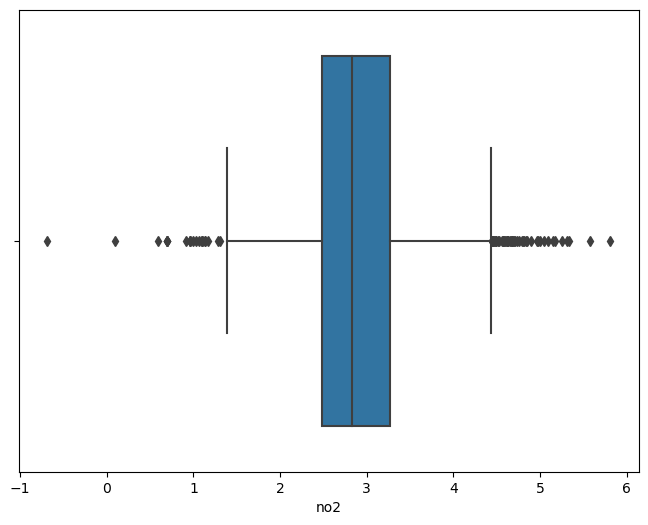

In [1339]:
sns.boxplot(X_train2.no2)

In [1340]:
upper_limit=X_train2['no2'].mean()+3*X_train2['no2'].std()
upper_limit

4.360524776539017

In [1341]:
lower_limit=X_train2['no2'].mean()-3*X_train2['no2'].std()
lower_limit

1.3894639400730024

In [1342]:
#removing outlier
#X_train2.loc[X_train2['no2']>=4,'no2']=4

In [1343]:
#sns.boxplot(X_train2.no2)

<AxesSubplot:xlabel='rspm'>

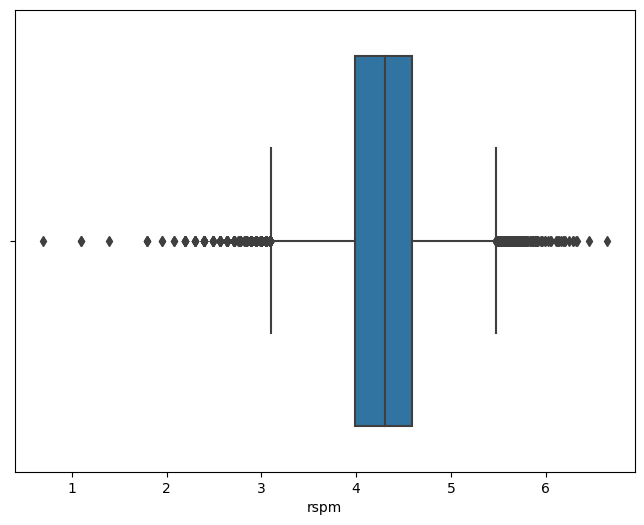

In [1344]:
#outlier detection
sns.boxplot(X_train2.rspm)

In [1345]:
upper_limit=X_train2['rspm'].mean()+3*X_train2['rspm'].std()
upper_limit

5.822586192040332

In [1346]:
lower_limit=X_train2['rspm'].mean()-3*X_train2['rspm'].std()
lower_limit

2.71567372872508

In [1347]:
#removing outlier
#X_train2.loc[X_train2['SPMi']>=5.8,'SPMi']=5.8

In [1348]:
#outlier detection
#sns.boxplot(X_train2.rspm)

<AxesSubplot:xlabel='spm'>

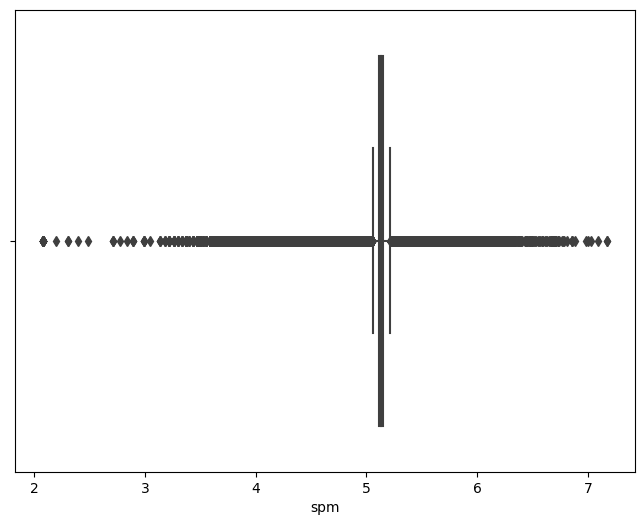

In [1349]:
#outlier detection
sns.boxplot(X_train2.spm)

In [1350]:
upper_limit=X_train2['spm'].mean()+3*X_train2['spm'].std()
upper_limit

6.329752078545496

In [1351]:
lower_limit=X_train2['spm'].mean()-3*X_train2['spm'].std()
lower_limit

3.8783446601292124

#if be  necessary then can be used for balancing

In [1352]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [1353]:
# Define SMOTE-Tomek Links
#resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='not majority'))
#x1, y1 = resample.fit_resample(X_train2, Y_train2)

In [1354]:
#x1.shape

#detection outliers for test data 

In [1355]:
X_test2.describe().T

count        mean         std       min       25%         50%  \
so2    6838.0    1.805085    0.524496 -0.916291  1.458615    1.629241   
no2    6838.0    2.884252    0.492396  0.693147  2.484907    2.833213   
rspm   6838.0    4.274689    0.510702  1.386294  3.988984    4.304065   
spm    6838.0    5.101321    0.409937  1.609438  5.111988    5.135798   
CO     6838.0        -inf         NaN      -inf       NaN         NaN   
Ozone  6838.0  152.162913  119.356349  0.000000  0.000000  167.000000   

              75%         max  
so2      2.104134    5.429346  
no2      3.273364    5.383577  
rspm     4.595120    6.672033  
spm      5.147494    7.170120  
CO            NaN    5.886104  
Ozone  235.000000  366.000000

#since there is no massive difference 75% to max for the test data so no needs to be figured out and removeing outliers

# FEATURE SELECTION

# selection by correlation

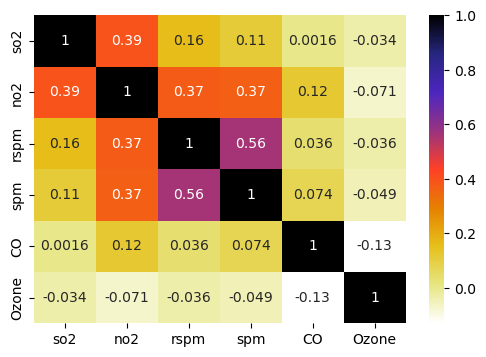

In [1356]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(6,4))
cor = X_train2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [1357]:
#  we can select highly correlated features by fuctin given below

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = X_train2.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [1358]:
corr_features = correlation(X_train2, 0.6)
len(set(corr_features))

0

In [1359]:
corr_features

set()

In [1360]:
#if needs drop those collumns are really highly correlated to each others 
#X_train.drop(corr_features,axis=1)
#X_test.drop(corr_features,axis=1)

# selection by extratree classifier

In [1361]:
X_train2.isnull().sum()

so2      0
no2      0
rspm     0
spm      0
CO       0
Ozone    0
dtype: int64

In [1362]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_train2,Y_train2)

ExtraTreesClassifier()

In [1363]:
print(model.feature_importances_)

[0.14162898 0.18765814 0.24016745 0.12928851 0.0563205  0.24493643]


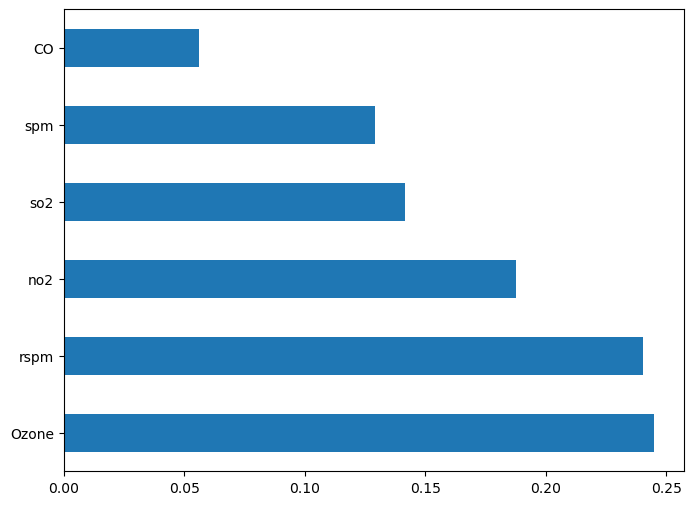

In [1364]:
plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X_train2.columns)
ranked_features.nlargest(6).plot(kind='barh')
plt.show()

#since the column of CO importance is less than 5 so we can drop that

In [1365]:
imp_features=['so2', 'no2', 'rspm', 'spm','Ozone']

In [1366]:
X_train2=pd.DataFrame(data=X_train2,columns=imp_features)
X_train2.head()

so2       no2      rspm       spm  Ozone
13176  1.386294  2.197225  4.127134  5.135798  324.0
20732  2.397895  2.197225  3.258097  5.135798  128.0
21422  1.386294  2.197225  3.871201  5.135798    0.0
24484  1.791759  4.007333  4.875197  5.135798    0.0
32600  1.945910  2.772589  3.526361  5.135798    0.0

In [1368]:
X_train2.shape

(27348, 5)

In [1369]:
Y_train2.shape

(27348,)

#drop CO column also from test data

In [1370]:
X_test2=pd.DataFrame(data=X_test2,columns=imp_features)
X_test2.head()

so2       no2      rspm       spm  Ozone
26268  2.197225  3.178054  3.871201  5.135798  160.0
11422  1.945910  3.178054  4.488636  5.135798    0.0
12394  2.564949  2.890372  4.454347  5.135798  182.0
4897   1.629241  2.833213  3.496508  4.477337   74.0
12272  1.098612  2.484907  4.997212  5.135798  177.0

In [1371]:
X_test2.shape

(6838, 5)

In [1372]:
Y_test2.shape

(6838,)

# MODELS BUILDING

# LOGISTIC REGRESSION

In [1373]:
X_train2.shape

(27348, 5)

In [1374]:
Y_train2.shape

(27348,)

In [1375]:
Y_train2.value_counts()

1    16843
3     4190
2     3464
4     1707
5     1144
Name: AQI_RANKING, dtype: int64

In [1376]:
from sklearn.preprocessing import MinMaxScaler 

MM = MinMaxScaler()
X_train = MM.fit_transform(X_train2)
X_test = MM.transform(X_test2)

In [1377]:
logis_reg = LogisticRegression(multi_class='ovr',n_jobs=-1).fit(X_train, Y_train2)

#prediction on train data
train_pred1 = logis_reg.predict(X_train)
#accuracy on train data
print("model accuracy on train is: ", accuracy_score(Y_train2, train_pred1))

#prediction on test data 
test_pred1 = logis_reg.predict(X_test)
#accuracy on test data
print("model accuracy on test is: ", accuracy_score(Y_test2, test_pred1))

model accuracy on train is:  0.611013602457218
model accuracy on test is:  0.6137759578824218


In [1378]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [1379]:
print(confusion_matrix(Y_test2, test_pred1))

[[4168    0   65    0    0]
 [ 817    0   10    0    0]
 [1015    0   29    0    0]
 [ 447    0    9    0    0]
 [ 253    0   25    0    0]]


In [1380]:
print(classification_report(Y_test2, test_pred1))

              precision    recall  f1-score   support

           1       0.62      0.98      0.76      4233
           2       0.00      0.00      0.00       827
           3       0.21      0.03      0.05      1044
           4       0.00      0.00      0.00       456
           5       0.00      0.00      0.00       278

    accuracy                           0.61      6838
   macro avg       0.17      0.20      0.16      6838
weighted avg       0.42      0.61      0.48      6838



In [1381]:
X_test2.head()

so2       no2      rspm       spm  Ozone
26268  2.197225  3.178054  3.871201  5.135798  160.0
11422  1.945910  3.178054  4.488636  5.135798    0.0
12394  2.564949  2.890372  4.454347  5.135798  182.0
4897   1.629241  2.833213  3.496508  4.477337   74.0
12272  1.098612  2.484907  4.997212  5.135798  177.0

In [1382]:
Y_test2.head()

26268    3
11422    3
12394    1
4897     1
12272    1
Name: AQI_RANKING, dtype: int64

In [1383]:
#logis_reg.predict([[1.609438,3.218876,4.543295,5.043425,150.0]]) 

In [1384]:
logis_reg.predict([[1.435085,2.740840,3.988984,4.997212,218.0]]) 

array([1], dtype=int64)

<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

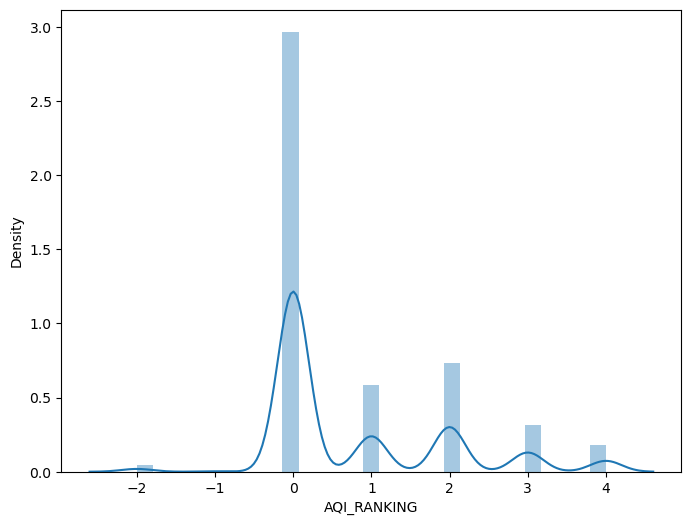

In [1385]:
sns.distplot(Y_test2-test_pred1)

# Decision Tree Classifier

In [1386]:
#fit training data 
DT = DecisionTreeClassifier(random_state=42).fit(X_train,Y_train2)

In [1387]:
#prediction on train data
train_pred2 = DT.predict(X_train)
#accuracy on train data
print("model accuracy on train is: ", accuracy_score(Y_train2, train_pred2))

#prediction on test data
test_pred2 = DT.predict(X_test)
#accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred2))

model accuracy on train is:  0.9816805616498464
Model accuracy on test is:  0.610412401286926


In [1388]:
print(confusion_matrix(Y_test2, test_pred2))

[[3319  372  363   95   84]
 [ 350  244  163   44   26]
 [ 386  173  339   84   62]
 [  99   36   99  203   19]
 [  96   26   70   17   69]]


In [1389]:
print(classification_report(Y_test2, test_pred2))

              precision    recall  f1-score   support

           1       0.78      0.78      0.78      4233
           2       0.29      0.30      0.29       827
           3       0.33      0.32      0.33      1044
           4       0.46      0.45      0.45       456
           5       0.27      0.25      0.26       278

    accuracy                           0.61      6838
   macro avg       0.42      0.42      0.42      6838
weighted avg       0.61      0.61      0.61      6838



In [1390]:
DT.predict([[1.609438,3.218876,4.543295,5.043425,150.0]])

array([1], dtype=int64)

In [1391]:
DT.predict([[1.945910,2.484907,3.496508,5.043425,0.0]]) 

array([1], dtype=int64)

<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

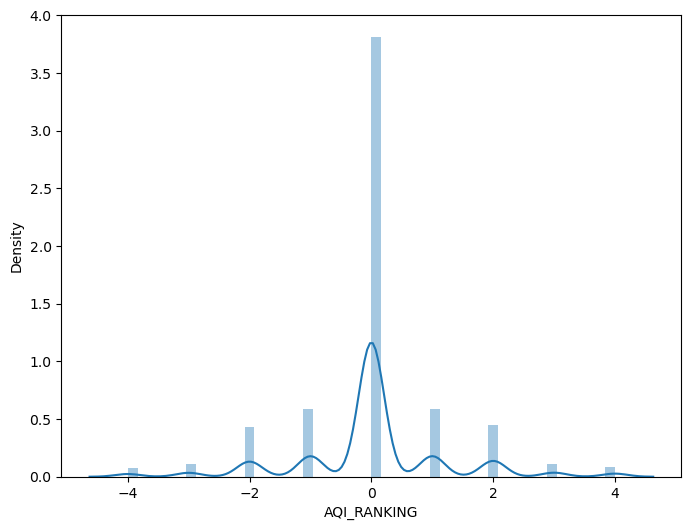

In [1392]:
sns.distplot(Y_test2-test_pred2)

In [1393]:
## Hyper Parameter Optimization for decision tree
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": range(1, 25),
              "min_samples_leaf": range(1, 25),
              "criterion": ["gini", "entropy"]}

In [1394]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [1395]:
rs_dt=RandomizedSearchCV(DT, param_dist, cv=10)

In [1396]:
rs_dt.fit(X_train, Y_train2)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': range(1, 25),
                                        'min_samples_leaf': range(1, 25)})

In [1397]:
print("Tuned decision Tree Parameters: {}".format(rs_dt.best_params_))
print("Best score is {}".format(rs_dt.best_score_))

Tuned decision Tree Parameters: {'min_samples_leaf': 22, 'max_features': 14, 'max_depth': 9, 'criterion': 'entropy'}
Best score is 0.6594632958385769


In [1398]:
from sklearn.metrics import accuracy_score
y_predtrain=rs_dt.predict(X_train)
y_pred=rs_dt.predict(X_test)
print(confusion_matrix(Y_test2,y_pred))
print("Accuracy Score for train {}".format(accuracy_score(Y_train2,y_predtrain)))
print("Accuracy Score for test {}".format(accuracy_score(Y_test2,y_pred)))
print("Classification report: {}".format(classification_report(Y_test2,y_pred)))

[[3779   95  213  124   22]
 [ 488  141  121   74    3]
 [ 596   32  275  115   26]
 [ 120    9   24  297    6]
 [ 221    3   24    6   24]]
Accuracy Score for train 0.676941641070645
Accuracy Score for test 0.6604270254460368
Classification report:               precision    recall  f1-score   support

           1       0.73      0.89      0.80      4233
           2       0.50      0.17      0.25       827
           3       0.42      0.26      0.32      1044
           4       0.48      0.65      0.55       456
           5       0.30      0.09      0.13       278

    accuracy                           0.66      6838
   macro avg       0.49      0.41      0.41      6838
weighted avg       0.62      0.66      0.62      6838



# Random Forest

In [1399]:
RF=RandomForestClassifier().fit(X_train,Y_train2)
#prediction on train data
train_pred3 = RF.predict(X_train)
#accuracy on train data
print("model accuracy on train data is: ", accuracy_score(Y_train2, train_pred3))

#prediction on test data 
test_pred3 = RF.predict(X_test)
#accuracy on test data
print("model accuracy on test data is: ", accuracy_score(Y_test2, test_pred3))

model accuracy on train data is:  0.9816805616498464
model accuracy on test data is:  0.6692015209125475


In [1400]:
print(confusion_matrix(Y_test2, test_pred3))

[[3671  190  241   63   68]
 [ 397  223  142   38   27]
 [ 418  103  356   93   74]
 [  90   21   73  254   18]
 [ 117   19   60   10   72]]


In [1401]:
print(classification_report(Y_test2, test_pred3))

              precision    recall  f1-score   support

           1       0.78      0.87      0.82      4233
           2       0.40      0.27      0.32       827
           3       0.41      0.34      0.37      1044
           4       0.55      0.56      0.56       456
           5       0.28      0.26      0.27       278

    accuracy                           0.67      6838
   macro avg       0.48      0.46      0.47      6838
weighted avg       0.64      0.67      0.65      6838



In [1402]:
RF.predict([[1.609438,3.218876,4.543295,5.043425,150.0]])

array([1], dtype=int64)

In [1403]:
RF.predict([[1.945910,2.484907,3.496508,5.043425,0.0]])

array([1], dtype=int64)

<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

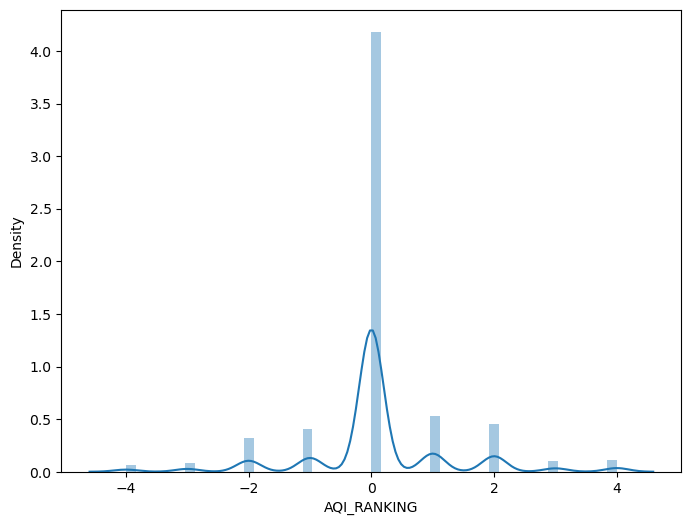

In [1404]:
sns.distplot(Y_test2-test_pred3)

#TUNING FOR RANDOM FOREST

In [1405]:
from sklearn.model_selection import RandomizedSearchCV

In [1406]:
# Number of trees of random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [1407]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [1408]:
rf_Model = RandomForestClassifier()

In [1409]:
rf_random= RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs =-1)

In [1410]:
rf_random.fit(X_train,Y_train2)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [1412]:
from sklearn.metrics import accuracy_score
y_predtrain=rf_random.predict(X_train)
y_pred=rf_random.predict(X_test)
print(confusion_matrix(Y_test2,y_pred))
print("Accuracy Score for train {}".format(accuracy_score(Y_train2,y_predtrain)))
print("Accuracy Score for test {}".format(accuracy_score(Y_test2,y_pred)))
print("Classification report: {}".format(classification_report(Y_test2,y_pred)))

[[4233    0    0    0    0]
 [ 827    0    0    0    0]
 [1044    0    0    0    0]
 [ 456    0    0    0    0]
 [ 278    0    0    0    0]]
Accuracy Score for train 0.6158768465701331
Accuracy Score for test 0.6190406551623282
Classification report:               precision    recall  f1-score   support

           1       0.62      1.00      0.76      4233
           2       0.00      0.00      0.00       827
           3       0.00      0.00      0.00      1044
           4       0.00      0.00      0.00       456
           5       0.00      0.00      0.00       278

    accuracy                           0.62      6838
   macro avg       0.12      0.20      0.15      6838
weighted avg       0.38      0.62      0.47      6838



# K-Nearest Neighbours

In [1413]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train2,Y_train2)
#predictION on train data 
train_pred4 = KNN.predict(X_train2)
#accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred4))

#prediction on test data
test_pred4 = KNN.predict(X_test2)
#accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred4))

Model accuracy on train is:  0.9795231826824631
Model accuracy on test is:  0.5845276396607195


In [1414]:
KNN.predict([[1,1.2,3.12,0.0,76]]) 
# Predictions on random values

array([4], dtype=int64)

In [1415]:
KNN.predict([[325.7,345,798.182,203,0.0]]) 
# Predictions on random values

array([1], dtype=int64)

In [1416]:
print(confusion_matrix(Y_test2,test_pred4))

[[3194  405  394  140  100]
 [ 373  229  157   41   27]
 [ 399  159  342   81   63]
 [ 155   37   77  162   25]
 [  97   23   71   17   70]]


In [1417]:
print(classification_report(Y_test2,test_pred4))

              precision    recall  f1-score   support

           1       0.76      0.75      0.76      4233
           2       0.27      0.28      0.27       827
           3       0.33      0.33      0.33      1044
           4       0.37      0.36      0.36       456
           5       0.25      0.25      0.25       278

    accuracy                           0.58      6838
   macro avg       0.39      0.39      0.39      6838
weighted avg       0.59      0.58      0.59      6838



<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

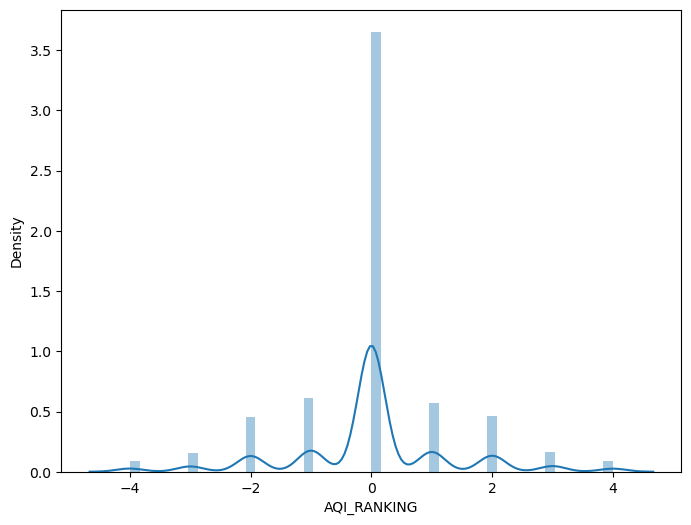

In [1418]:
sns.distplot(Y_test2-test_pred4)

#TUNING FOR KNN

In [1419]:
#selecting best K value
err_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train2,Y_train2)
    pred_i = knn.predict(X_test2)
    err_rate.append(np.mean(pred_i != Y_test2))

In [1420]:
err_rate

[0.4154723603392805,
 0.38871014916642294,
 0.3831529687042995,
 0.3843229014331676,
 0.38286048552208246,
 0.3778882714243931,
 0.3775957882421761,
 0.37437847323778883,
 0.3786194793799357,
 0.37598713073998247,
 0.3754021643755484,
 0.3762796139221995,
 0.3755484059666569,
 0.37598713073998247,
 0.3745247148288973,
 0.3751096811933314,
 0.37598713073998247,
 0.3736472652822463,
 0.3758408891488739,
 0.37437847323778883,
 0.3745247148288973,
 0.3740859900555718,
 0.3736472652822463,
 0.37247733255337817,
 0.37218484937116114,
 0.3727698157355952,
 0.37159988300672714,
 0.3727698157355952,
 0.37086867505118454,
 0.3691137759578824,
 0.37247733255337817,
 0.36984498391342496,
 0.36984498391342496,
 0.3729160573267037,
 0.37218484937116114,
 0.37072243346007605,
 0.37086867505118454,
 0.37159988300672714,
 0.3718923661889441]

Text(0, 0.5, 'error rate')

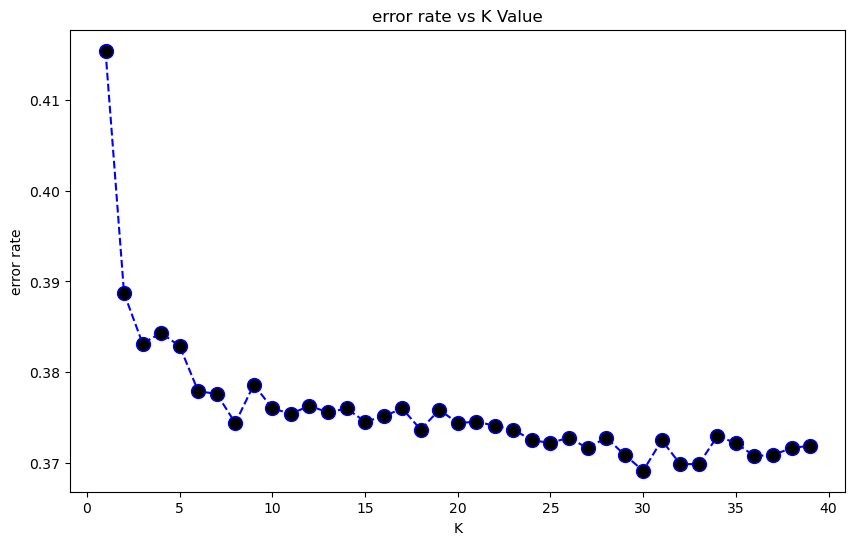

In [1421]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('error rate vs K Value')
plt.xlabel('K')
plt.ylabel('error rate')

In [1422]:
#it is noticeable that after k=32 the error rate tends to rise so needs to be checked k=30

In [1423]:
#creating model assigning  n_neighbors=30 
KNN = KNeighborsClassifier(n_neighbors=30)
#fitting data on model
KNN.fit(X_train,Y_train2)
#prediction on train data
train_pred4 = KNN.predict(X_train)
#accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred4))

#prediction on test data
test_pred4 = KNN.predict(X_test)
#accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred4))

Model accuracy on train is:  0.6873994442006728
Model accuracy on test is:  0.6667154138637028


In [1424]:
from sklearn.metrics import accuracy_score
y_predtrain=KNN.predict(X_train)
y_pred=KNN.predict(X_test)
print(confusion_matrix(Y_test2,y_pred))
print('\n\n')
print("Classification report: {}".format(classification_report(Y_test2,y_pred)))

[[3769   81  197  123   63]
 [ 521  155  103   39    9]
 [ 555   54  303   74   58]
 [ 138    8   32  260   18]
 [ 149    2   54    1   72]]



Classification report:               precision    recall  f1-score   support

           1       0.73      0.89      0.80      4233
           2       0.52      0.19      0.28       827
           3       0.44      0.29      0.35      1044
           4       0.52      0.57      0.55       456
           5       0.33      0.26      0.29       278

    accuracy                           0.67      6838
   macro avg       0.51      0.44      0.45      6838
weighted avg       0.63      0.67      0.63      6838



<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

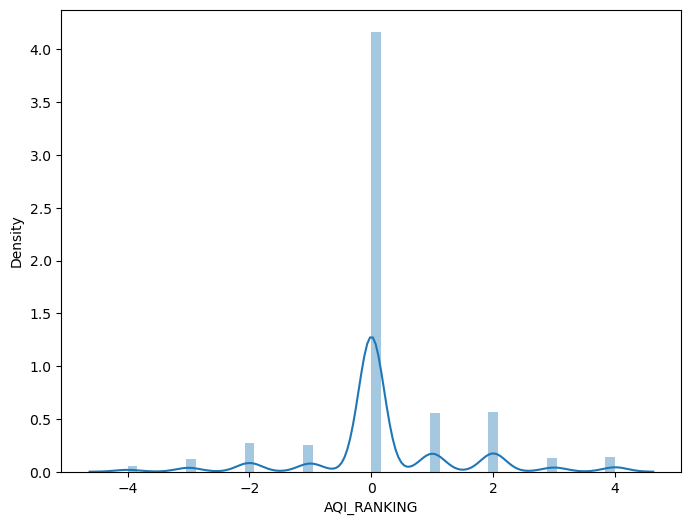

In [1425]:
sns.distplot(Y_test2-y_pred)

# MULTINOMIAL NAIVE BAYES

In [1426]:
from sklearn.naive_bayes import MultinomialNB
#fit the model on train data 
MNB = MultinomialNB()
MNB.fit(X_train,Y_train2)
#prediction on train data
train_pred5 = MNB.predict(X_train)
#accuracy on train data
print("model accuracy on train is: ", accuracy_score(Y_train2, train_pred5))

#prediction on test data
test_pred5 = MNB.predict(X_test)
#accuracy on test data
print("model accuracy on test is: ", accuracy_score(Y_test2, test_pred5))

model accuracy on train is:  0.6158768465701331
model accuracy on test is:  0.6190406551623282


In [1428]:
print(confusion_matrix(Y_test2,test_pred5))

[[4233    0    0    0    0]
 [ 827    0    0    0    0]
 [1044    0    0    0    0]
 [ 456    0    0    0    0]
 [ 278    0    0    0    0]]


In [1429]:
print(classification_report(Y_test2,test_pred5))

              precision    recall  f1-score   support

           1       0.62      1.00      0.76      4233
           2       0.00      0.00      0.00       827
           3       0.00      0.00      0.00      1044
           4       0.00      0.00      0.00       456
           5       0.00      0.00      0.00       278

    accuracy                           0.62      6838
   macro avg       0.12      0.20      0.15      6838
weighted avg       0.38      0.62      0.47      6838



In [1430]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
    
grid_mnb=GridSearchCV(MNB,param,cv=10,error_score='raise')  
    

In [1431]:
grid_mnb.fit(X_train,Y_train2)

GridSearchCV(cv=10, error_score='raise', estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]})

In [1432]:
grid_mnb.best_params_

{'alpha': 1e-05}

In [1433]:
grid_mnb.best_score_

0.6158768517243086

In [1434]:
trprd_mnb=grid_mnb.predict(X_train)
print('accuracy for train:',accuracy_score(Y_train2,trprd_mnb))
teprd_mnb=grid_mnb.predict(X_test)
print('accuracy for train:',accuracy_score(Y_test2,teprd_mnb))

accuracy for train: 0.6158768465701331
accuracy for train: 0.6190406551623282


<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

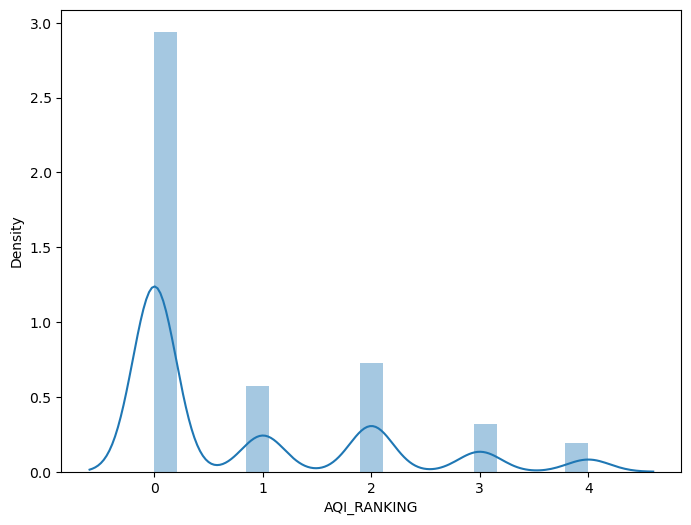

In [1435]:
sns.distplot(Y_test2-teprd_mnb)

# SUPPORT VECTOR MACHINE

In [1436]:
from sklearn.svm import SVC

In [1437]:
svc = SVC()
svc.fit(X_train, Y_train2)


SVC()

In [1438]:
#prediction on train data
train_pred6 = svc.predict(X_train)

In [1439]:
#accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred6))

Model accuracy on train is:  0.6348179025888547


In [1440]:
#predict on test data
test_pred6 = svc.predict(X_test)


In [1441]:
#accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred6))

Model accuracy on test is:  0.6355659549575899


In [1442]:
svc.predict([[1,1.2,3.12,0.0,48]]) 
# Predictions on random values

array([1], dtype=int64)

In [1443]:
svc.predict([[1,4,3.12,0.0,48]]) 
# Predictions on random values

array([1], dtype=int64)

<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

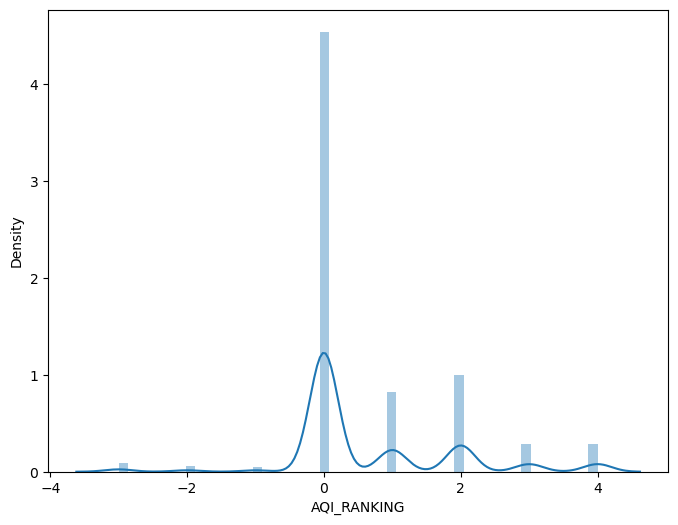

In [1444]:
sns.distplot(Y_test2-test_pred6)

#tuning

In [1445]:
from sklearn.svm import SVC

In [1446]:
sv=SVC()

In [1447]:
params_grid = {
    "gamma": [0.1, 1.0, 10, 100],
    "C": [0.1, 1.0, 10, 100],
    
}

In [1448]:
# putting n_jobs=-1 means using all the CPU cores instead of just 1 (the default)
# This allows us to speed up the computation power  by performing tasks in parallel
rand_svc = RandomizedSearchCV(sv, params_grid, cv=3, verbose=2, n_jobs=-1, n_iter=5)

In [ ]:
rand_svc.fit(X_train, Y_train2)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [275]:
rand_svc.best_params_

{'gamma': 10, 'C': 10}

In [276]:
rand_svc.best_score_

0.6457166095252035

In [277]:
pred_svctr=rand_svc.predict(X_train)
pred_svcte=rand_svc.predict(X_test)

In [278]:
print('accuracy score for train svc :',accuracy_score(Y_train2,pred_svctr))
print('accuracy score for test svc :',accuracy_score(Y_test2,pred_svcte))

accuracy score for train svc : 0.6530296698704555
accuracy score for test svc : 0.6524960998439937


# GRADIENT BOOSTING CLASSIFIER

In [279]:
from sklearn.ensemble import GradientBoostingClassifier

In [280]:
#fit the model on train data 
GBC = GradientBoostingClassifier().fit(X_train,Y_train2)
#prediction on train data
train_pred7 = GBC.predict(X_train)
#accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred7))

#predict on test data
test_pred7 = GBC.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred7))

Model accuracy on train is:  0.6902214793146678
Model accuracy on test is:  0.6819422776911076


In [281]:
print(confusion_matrix(Y_test2,test_pred7))

[[5778  159  238  118   64]
 [ 685  290  191   84    8]
 [ 832   96  436  133   57]
 [ 192   17   32  420   15]
 [ 283    2   53    3   70]]


In [282]:
print(classification_report(Y_test2,test_pred7))

              precision    recall  f1-score   support

           1       0.74      0.91      0.82      6357
           2       0.51      0.23      0.32      1258
           3       0.46      0.28      0.35      1554
           4       0.55      0.62      0.59       676
           5       0.33      0.17      0.22       411

    accuracy                           0.68     10256
   macro avg       0.52      0.44      0.46     10256
weighted avg       0.64      0.68      0.65     10256



<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

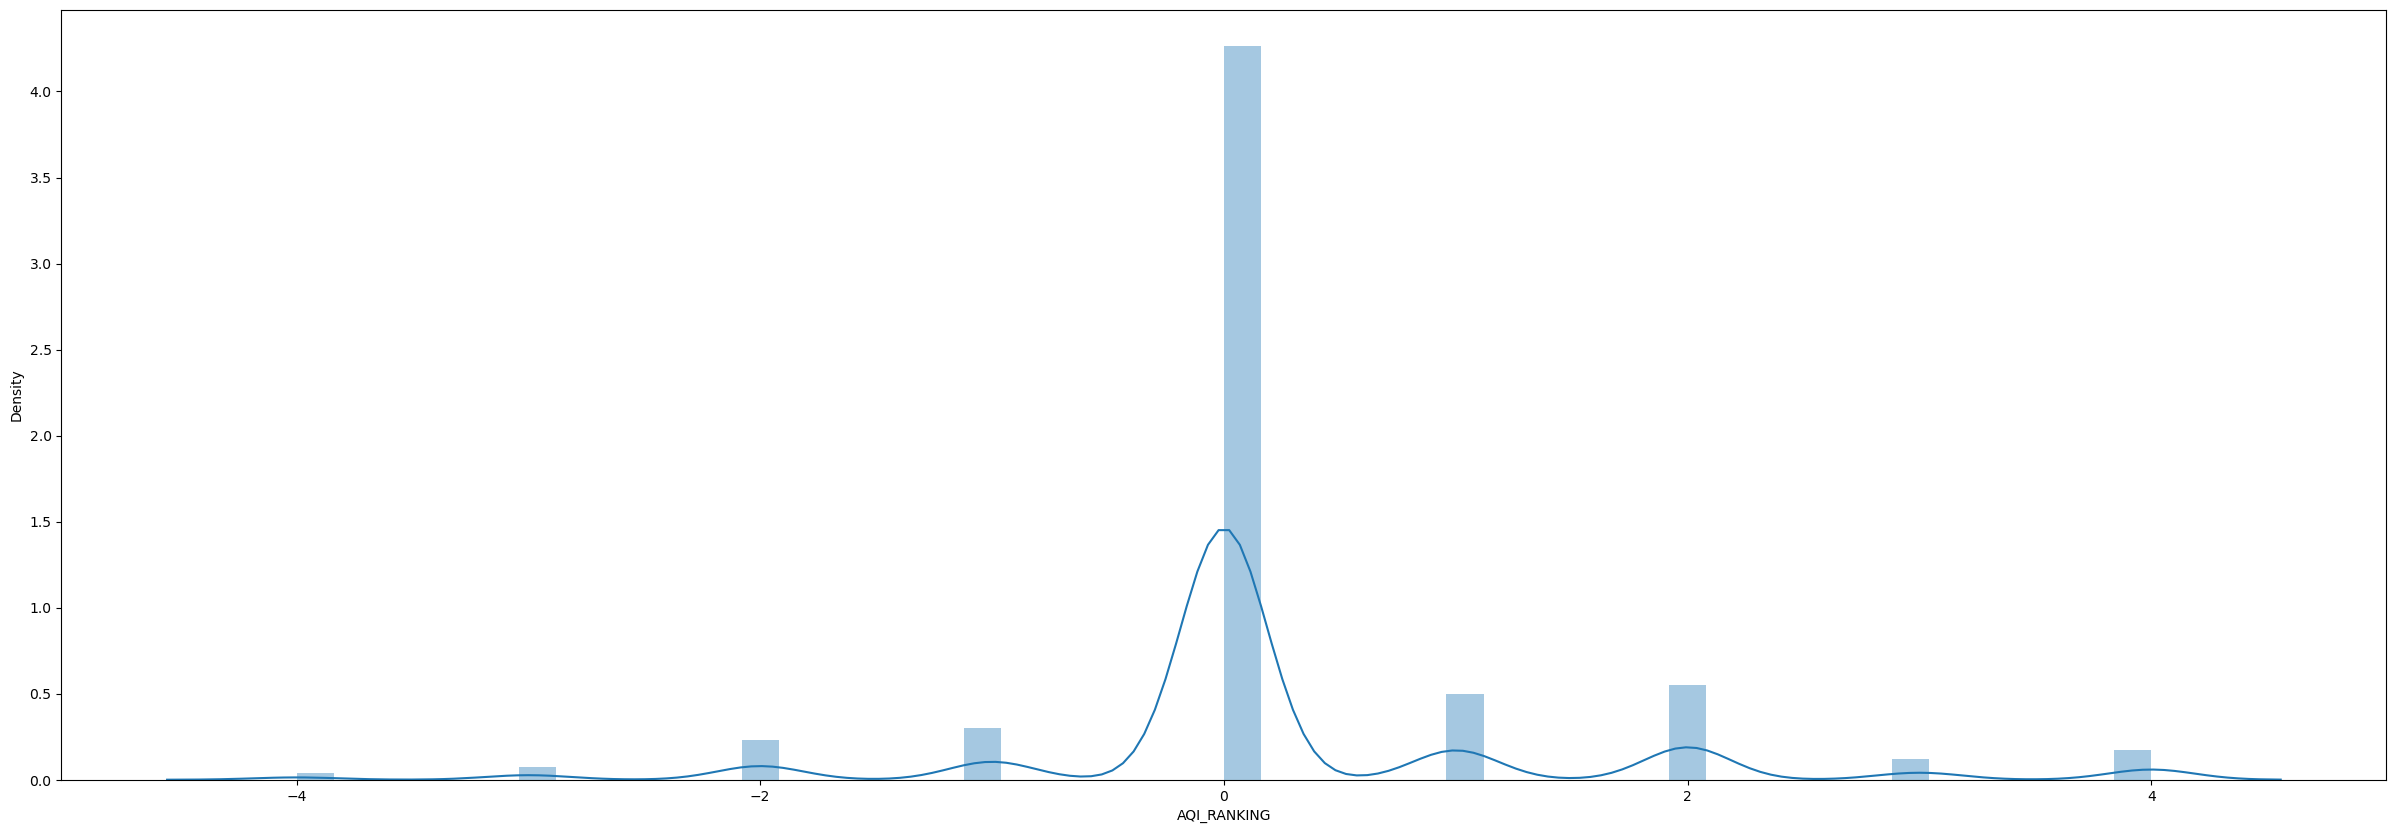

In [283]:
sns.distplot(Y_test2-test_pred7)

In [783]:
lerrate_gb = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lerrate_gb:
    gbc = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=5)
    gbc.fit(X_train, Y_train2)

    print("learning rate is: ", learning_rate)
    print("Accuracy score for training: {0:.2f}".format(gbc.score(X_train, Y_train2)))
    print("Accuracy score for test: {0:.2f}".format(gbc.score(X_test, Y_test2)))

learning rate is:  0.05
Accuracy score for training: 0.62
Accuracy score for test: 0.61
learning rate is:  0.075
Accuracy score for training: 0.62
Accuracy score for test: 0.61
learning rate is:  0.1
Accuracy score for training: 0.62
Accuracy score for test: 0.61
learning rate is:  0.25
Accuracy score for training: 0.64
Accuracy score for test: 0.64
learning rate is:  0.5
Accuracy score for training: 0.66
Accuracy score for test: 0.65
learning rate is:  0.75
Accuracy score for training: 0.67
Accuracy score for test: 0.66
learning rate is:  1
Accuracy score for training: 0.68
Accuracy score for test: 0.66


In [733]:
from sklearn.ensemble import AdaBoostClassifier

In [734]:
#fit the model on train data 
ABC = AdaBoostClassifier().fit(X_train,Y_train2)
#prediction on train data
train_pred8 = ABC.predict(X_train)
#accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred8))

#prediction on test data
test_pred8 = ABC.predict(X_test)
#accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred8))

Model accuracy on train is:  0.6365231926452152
Model accuracy on test is:  0.6326053042121685


In [735]:
print(confusion_matrix(Y_test2,test_pred8))

[[5940   10  102  195   44]
 [1151    8   52  122   10]
 [1247    7   98  166   33]
 [ 227    3    5  392    8]
 [ 348    1   35    2   50]]


In [736]:
print(classification_report(Y_test2,test_pred8))

              precision    recall  f1-score   support

           1       0.67      0.94      0.78      6291
           2       0.28      0.01      0.01      1343
           3       0.34      0.06      0.11      1551
           4       0.45      0.62      0.52       635
           5       0.34      0.11      0.17       436

    accuracy                           0.63     10256
   macro avg       0.41      0.35      0.32     10256
weighted avg       0.54      0.63      0.54     10256



<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

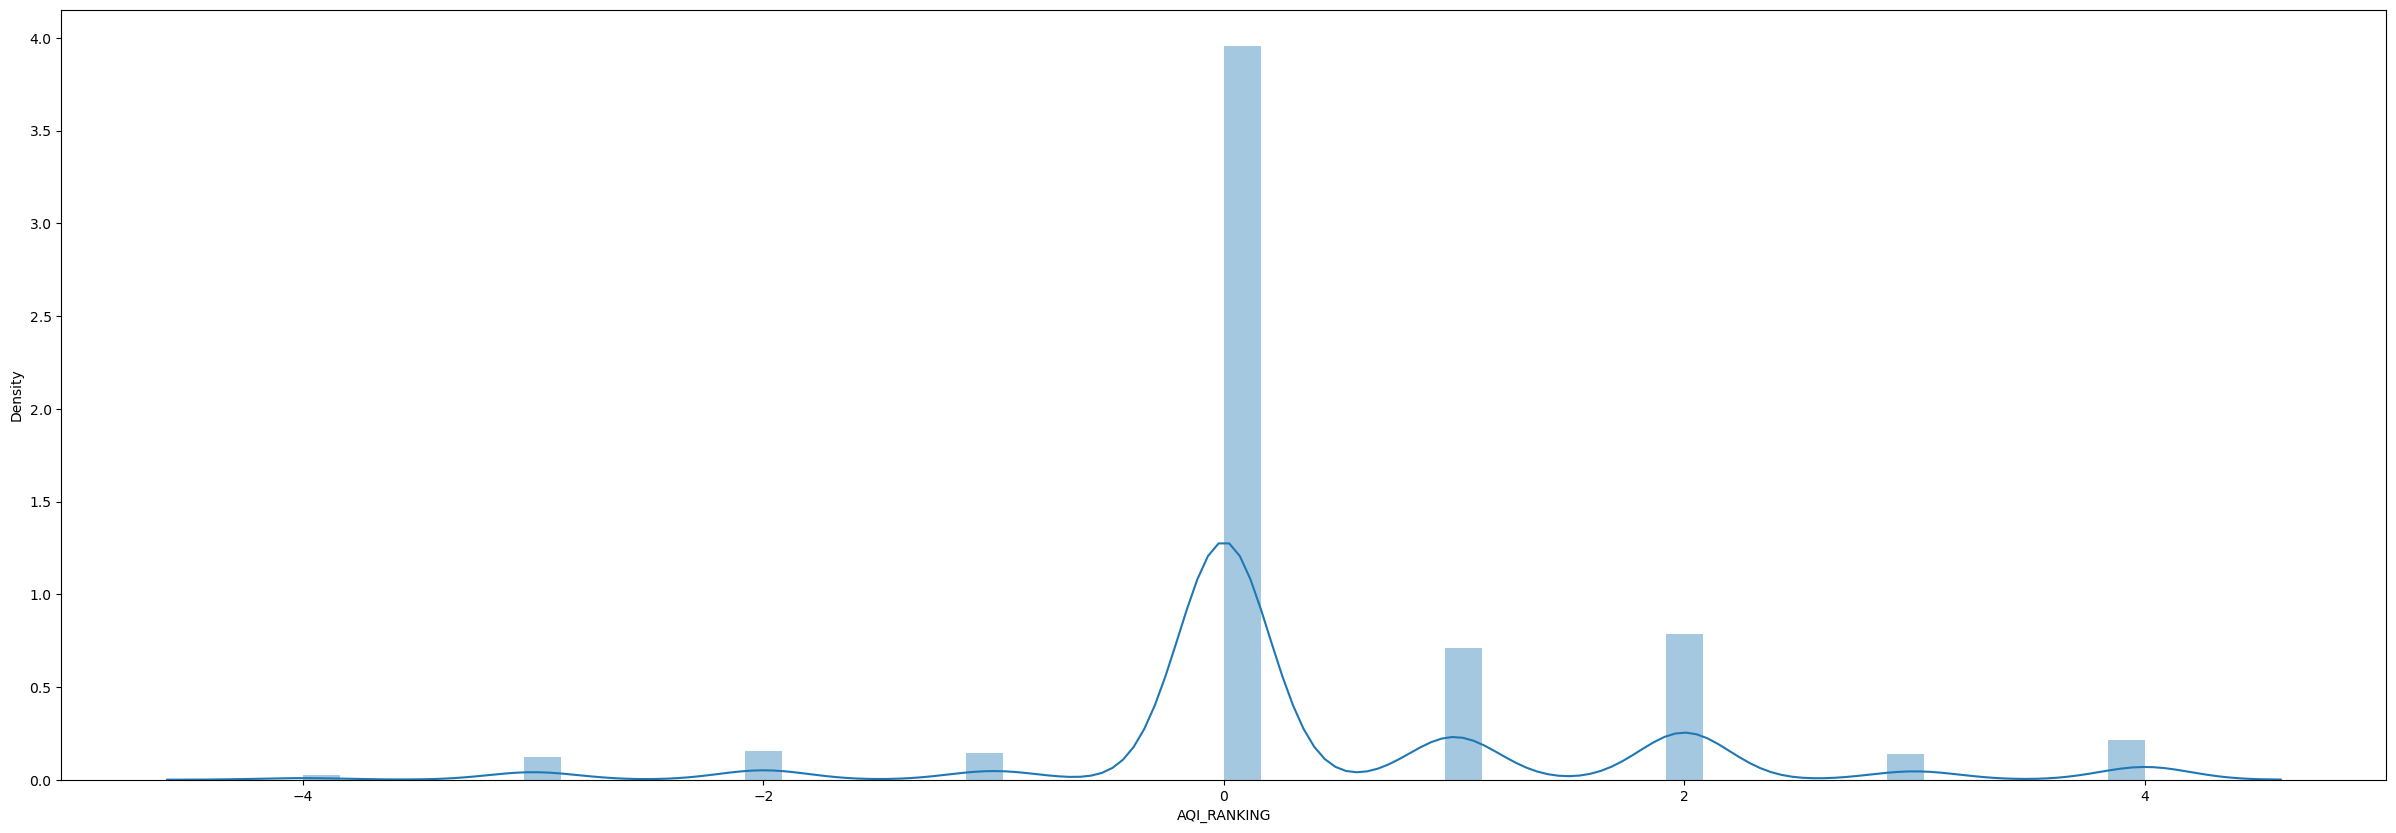

In [737]:
sns.distplot(Y_test2-test_pred8)

In [738]:
from sklearn.linear_model import SGDClassifier

In [739]:
#fit the model on train data 
SGDC = SGDClassifier().fit(X_train,Y_train2)
#prediction on train data
train_pred9 = SGDC.predict(X_train)
#accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_pred9))

#prediction on test data
test_pred9 = SGDC.predict(X_test)
#accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_pred9))

Model accuracy on train is:  0.6081905557877142
Model accuracy on test is:  0.6043291731669267


In [740]:
print(confusion_matrix(Y_test2,test_pred9))

[[6128    1   87   70    5]
 [1304    2   21   16    0]
 [1459    0   46   44    2]
 [ 605    0   10   20    0]
 [ 369    0   26   39    2]]


In [741]:
print(classification_report(Y_test2,test_pred9))

              precision    recall  f1-score   support

           1       0.62      0.97      0.76      6291
           2       0.67      0.00      0.00      1343
           3       0.24      0.03      0.05      1551
           4       0.11      0.03      0.05       635
           5       0.22      0.00      0.01       436

    accuracy                           0.60     10256
   macro avg       0.37      0.21      0.17     10256
weighted avg       0.52      0.60      0.48     10256



<AxesSubplot:xlabel='AQI_RANKING', ylabel='Density'>

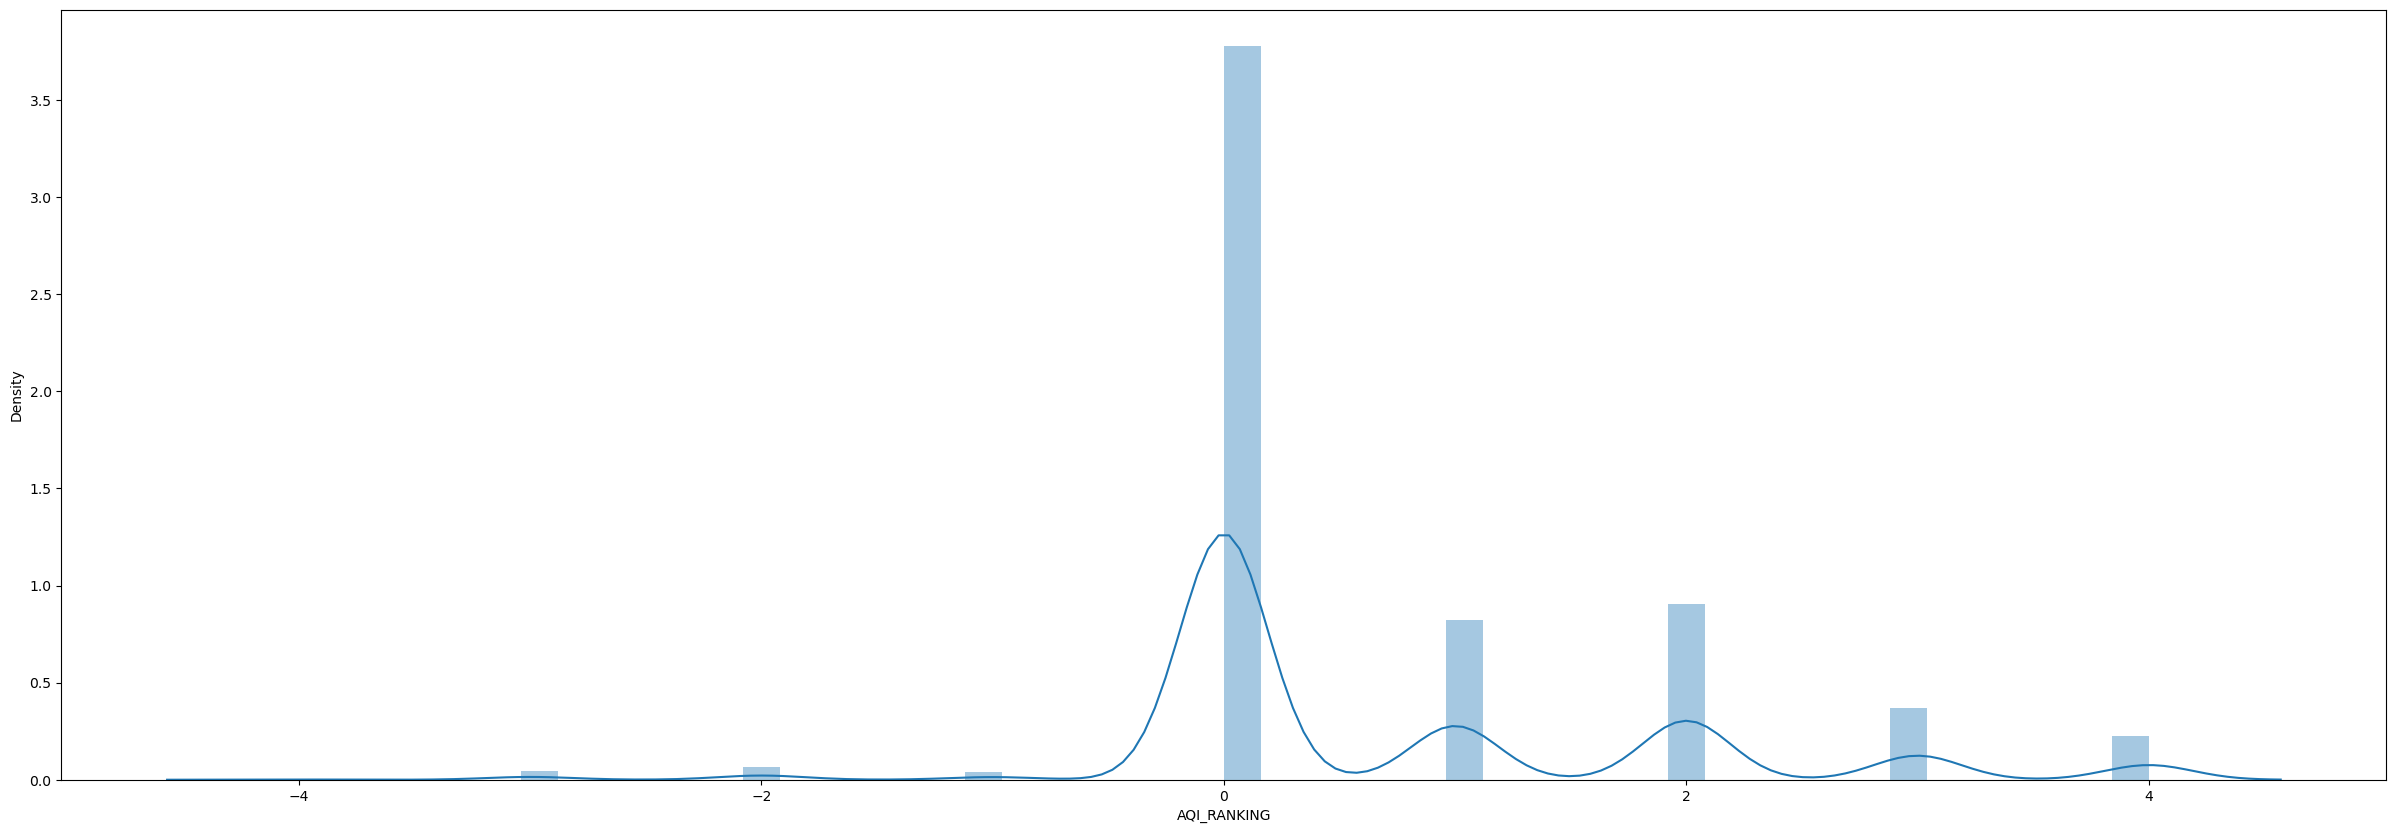

In [742]:
sns.distplot(Y_test2-test_pred9)

# ROC_CURVE AND ROC_AUC_SCORE

In [479]:
import matplotlib.pyplot as plt

In [480]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#LOGISTIC REGRESSION

In [492]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, Y_train2)
ytrain_pred_lg = log_classifier.predict_proba(X_train2)
print('logistic regression train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred_lg,multi_class='ovr',average='weighted')))
ytest_pred_lg = log_classifier.predict_proba(X_test2)
print('logistic regression test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred_lg,multi_class='ovr',average='weighted')))
#fpr,tpr,_thresholds=metrics.roc_curve(Y_test2,ytest_pred)

logistic regression train roc-auc: 0.5700007850712157
logistic regression test roc-auc: 0.5686357140707239


#ROC CURVE FOR LOGISTIC REGRESSION

In [493]:
model_lr = LogisticRegression()
model_lr.fit(X_train2, Y_train2)
y_pred_lg = model_lr.predict_proba(X_test2)[:, 1]
fpr, tpr, _ = metrics.roc_curve(Y_test2, y_pred_lg,pos_label=1)
#auc = metrics.roc_auc_score(Y_test2, y_pred,multi_class='ovr',average='weighted')
#plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

In [494]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

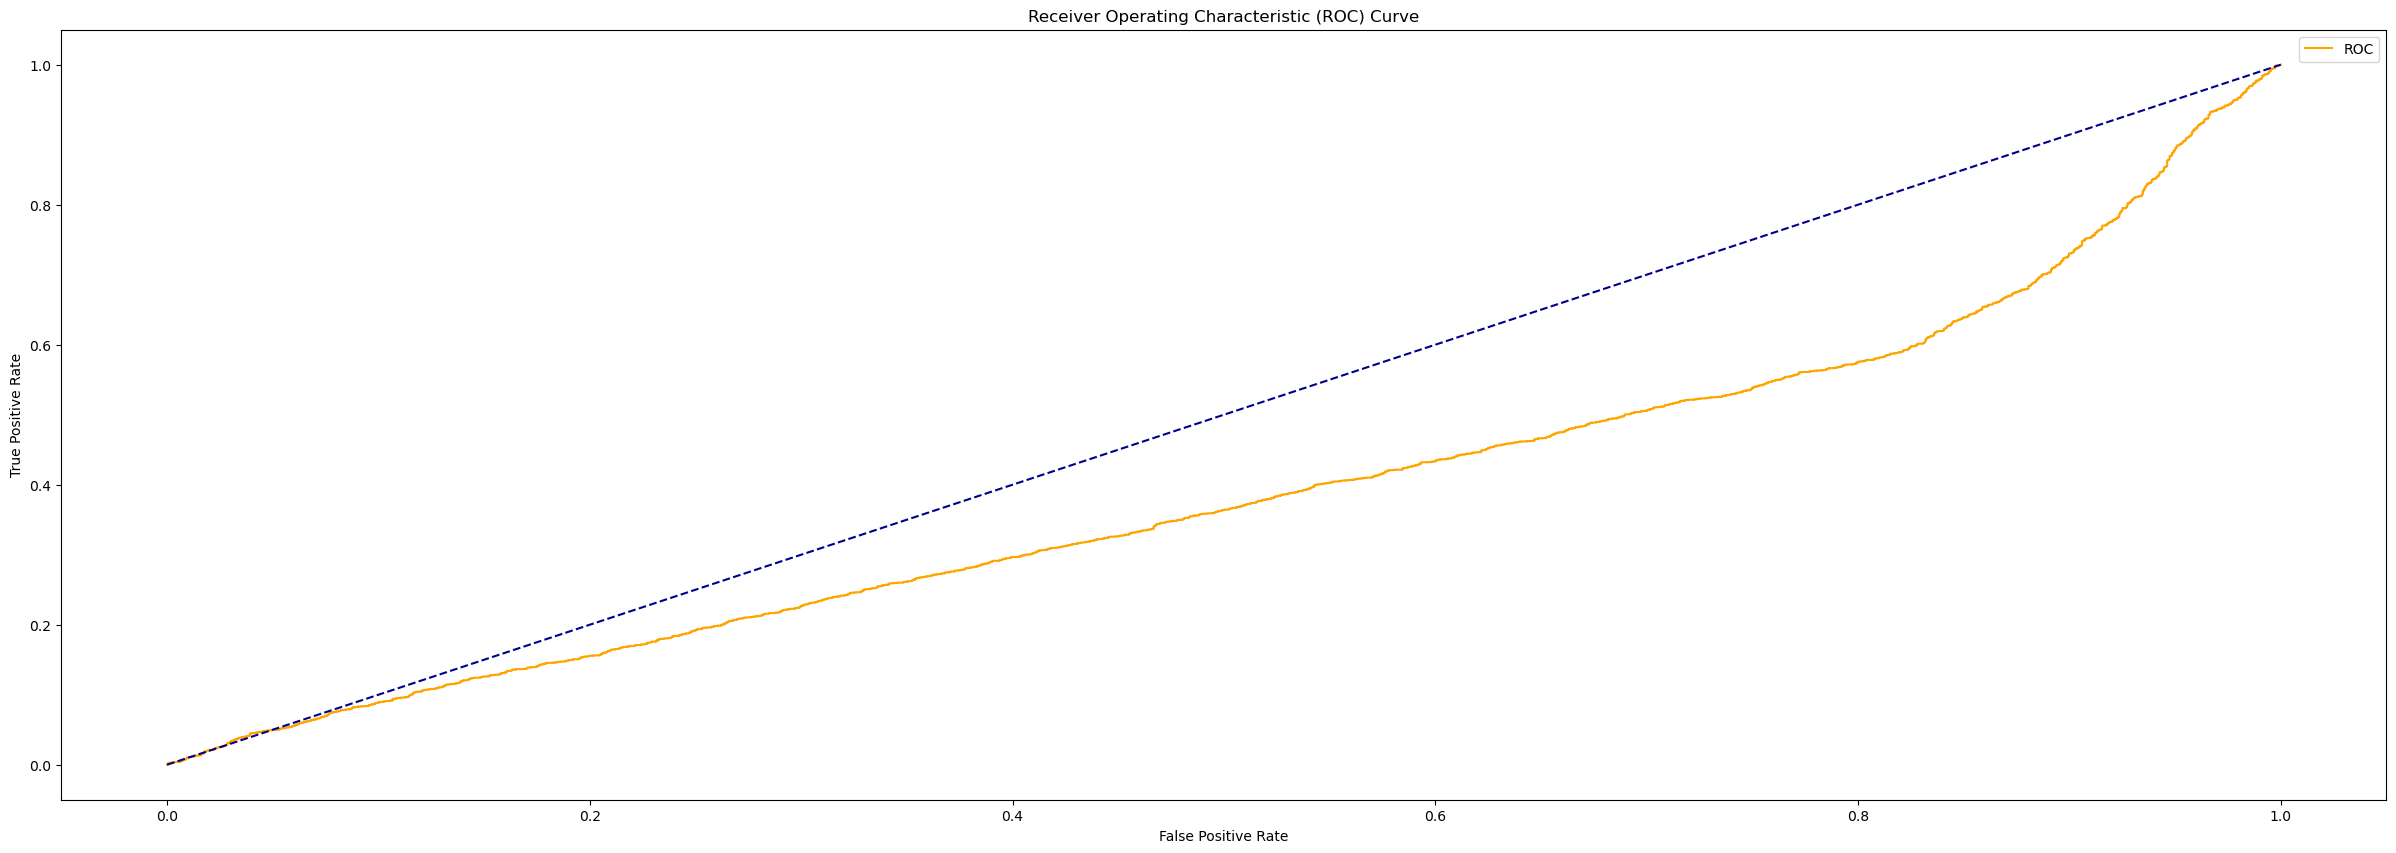

In [495]:
plot_roc_curve(fpr,tpr)

#RANDOM FOREST

In [497]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train2, Y_train2)
ytrain_pred = rf_model.predict_proba(X_train2)
print('RF train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = rf_model.predict_proba(X_test2)
print('RF test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

RF train roc-auc: 0.9993018789770424
RF test roc-auc: 0.8549650680792803


In [498]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train2, Y_train2)
y_pred_rf = rf_model.predict_proba(X_test2)[:, 1]
fpr_rf, tpr_rf, _rf = metrics.roc_curve(Y_test2, y_pred_rf,pos_label=1)

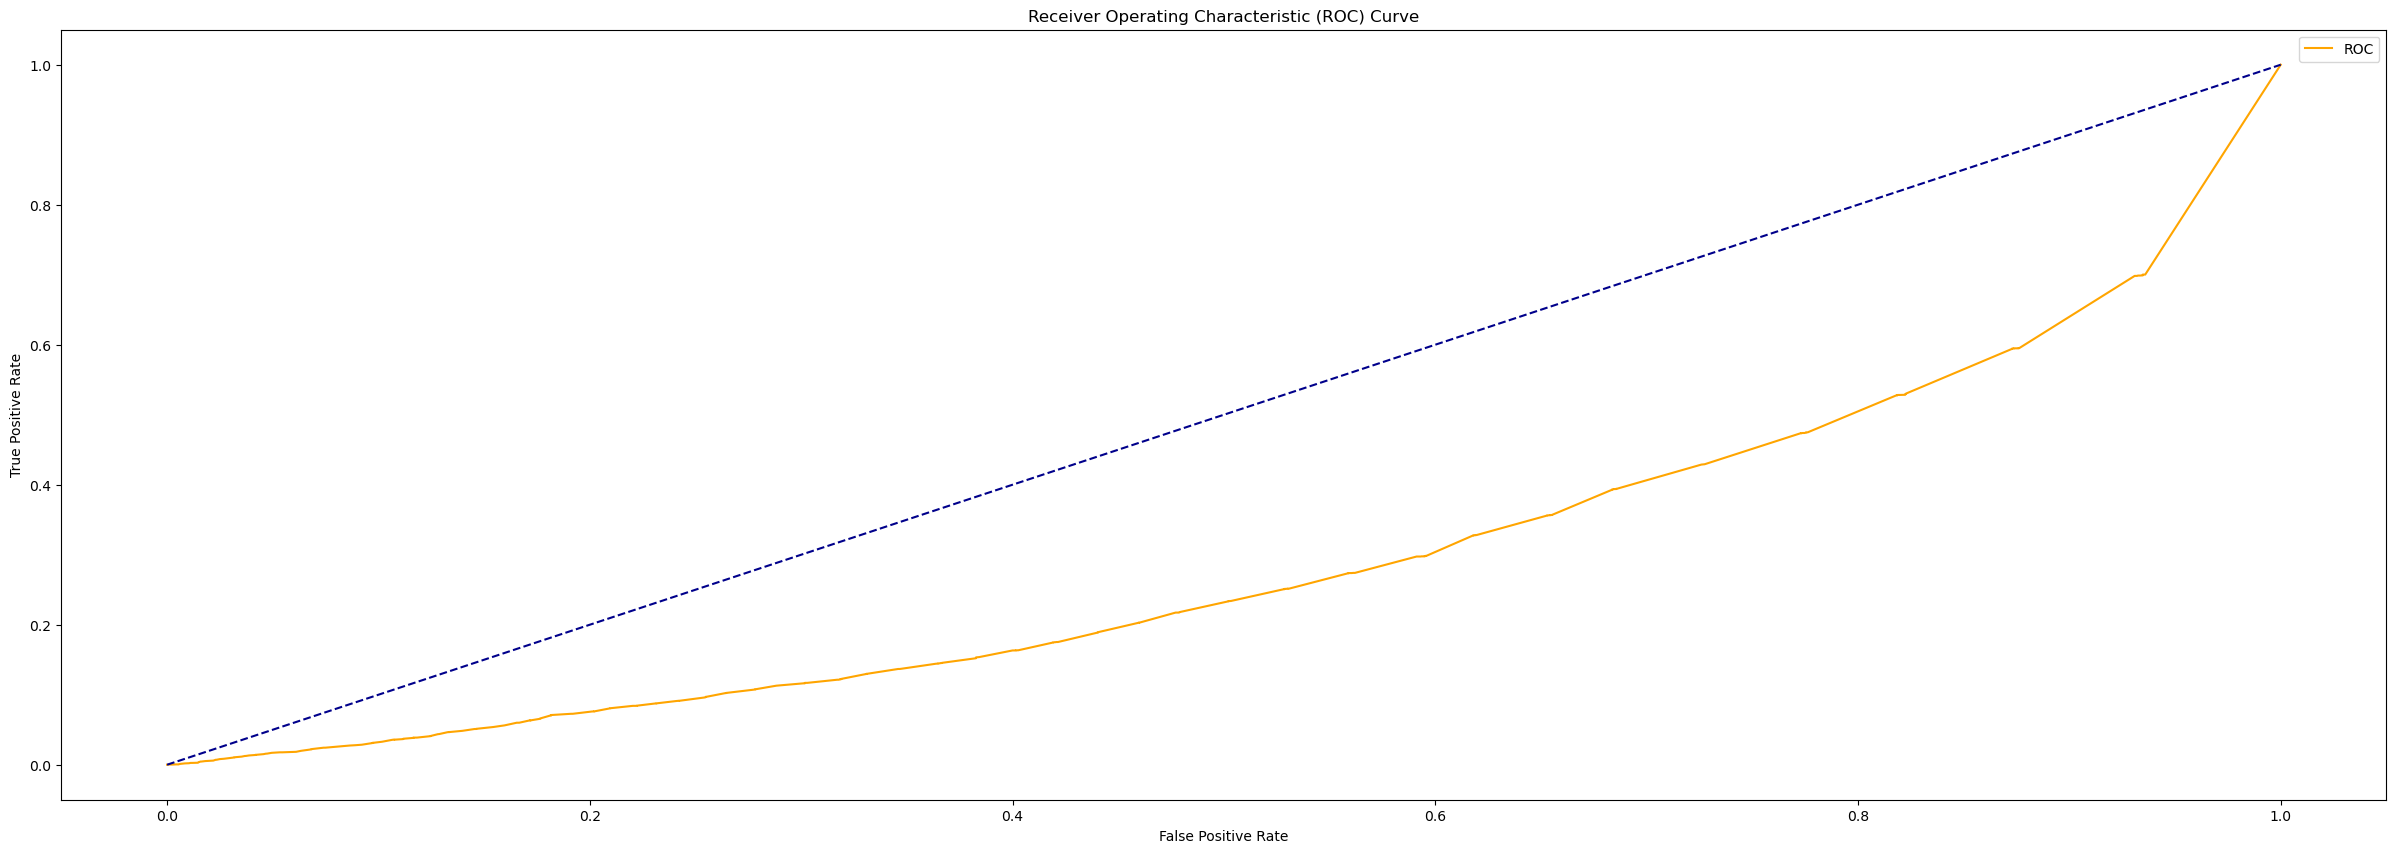

In [499]:
plot_roc_curve(fpr_rf,tpr_rf)

#DECISION TREE CLASSIFIER

In [500]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train2, Y_train2)
ytrain_pred = dt_model.predict_proba(X_train2)
print('DT train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = rf_model.predict_proba(X_test2)
print('DT test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

DT train roc-auc: 0.9997167940998236
DT test roc-auc: 0.8543413826408618


In [501]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train2, Y_train2)
y_pred_dt = dt_model.predict_proba(X_test2)[:, 1]
fpr_dt, tpr_dt, _dt = metrics.roc_curve(Y_test2, y_pred_dt,pos_label=1)

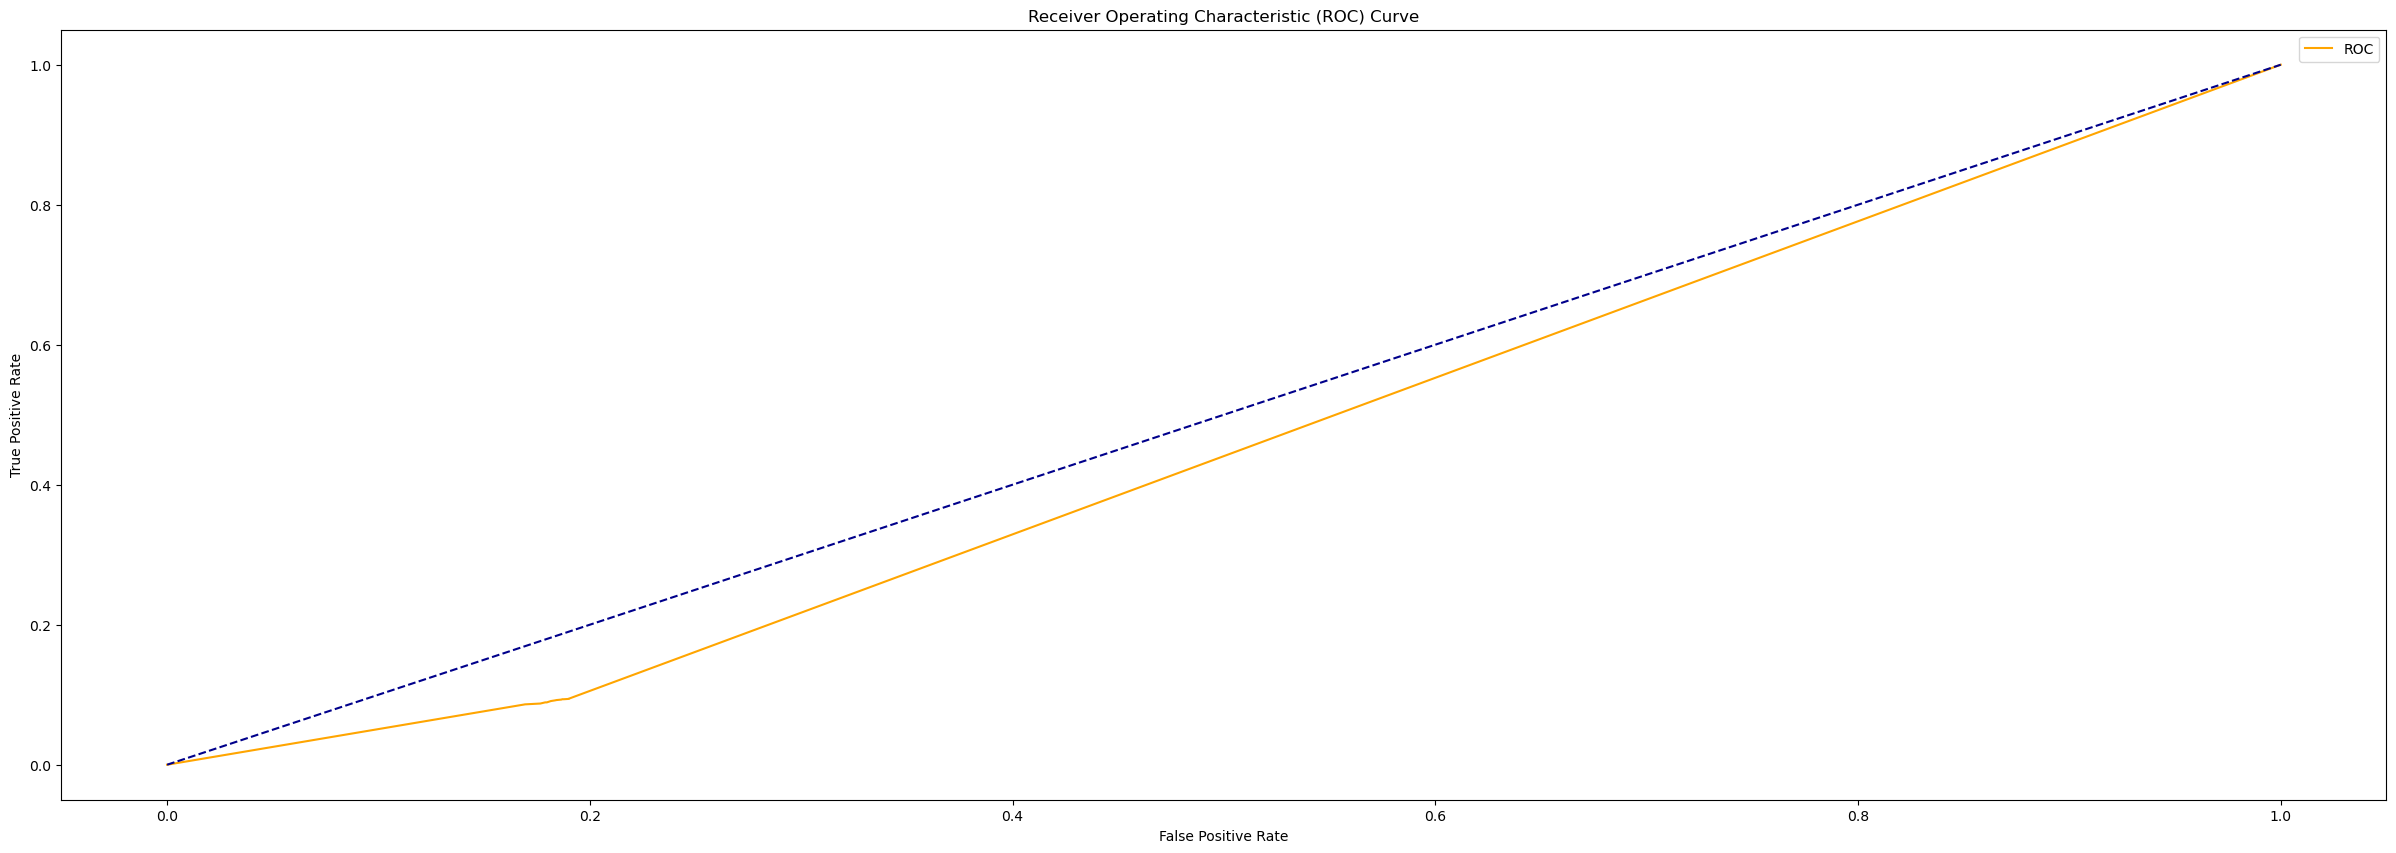

In [502]:
plot_roc_curve(fpr_dt,tpr_dt)

#KNeighborsClassifier

In [503]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train2, Y_train2)
ytrain_pred = knn_model.predict_proba(X_train2)
print('KNN train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = knn_model.predict_proba(X_test2)
print('KNN test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

KNN train roc-auc: 0.9011549285821453
KNN test roc-auc: 0.7568359215321578


In [504]:
y_pred_knn = knn_model.predict_proba(X_test2)[:, 1]
fpr_knn, tpr_knn, _knn = metrics.roc_curve(Y_test2, y_pred_knn,pos_label=1)

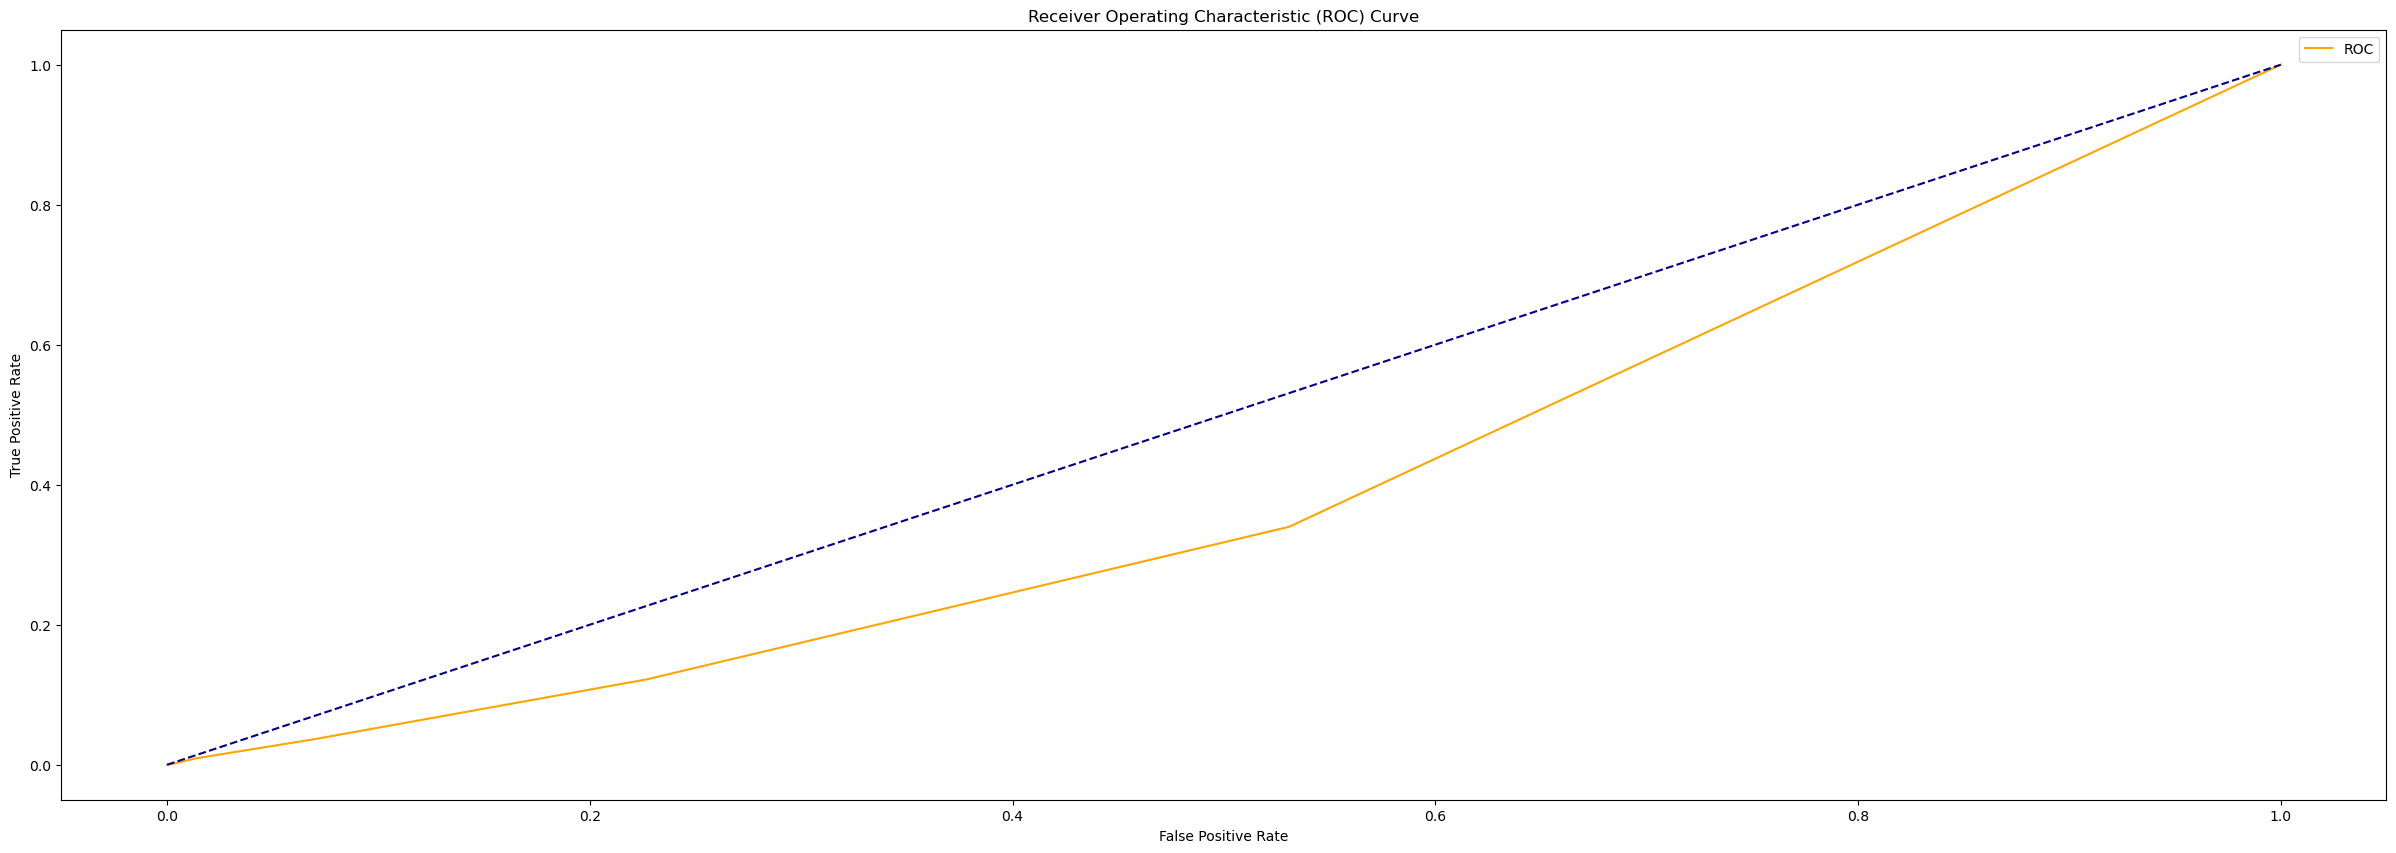

In [505]:
plot_roc_curve(fpr_knn,tpr_knn)

#GaussianNB

In [506]:
gnb_model = MultinomialNB()
gnb_model.fit(X_train, Y_train2)
ytrain_pred = gnb_model.predict_proba(X_train)
print('GNB train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = gnb_model.predict_proba(X_test2)
print('GNB test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

GNB train roc-auc: 0.6137631137419249
GNB test roc-auc: 0.6110527151256532


In [507]:
y_pred_gnb = gnb_model.predict_proba(X_test)[:, 1]
fpr_gnb, tpr_gnb, _gnb = metrics.roc_curve(Y_test2, y_pred_gnb,pos_label=1)

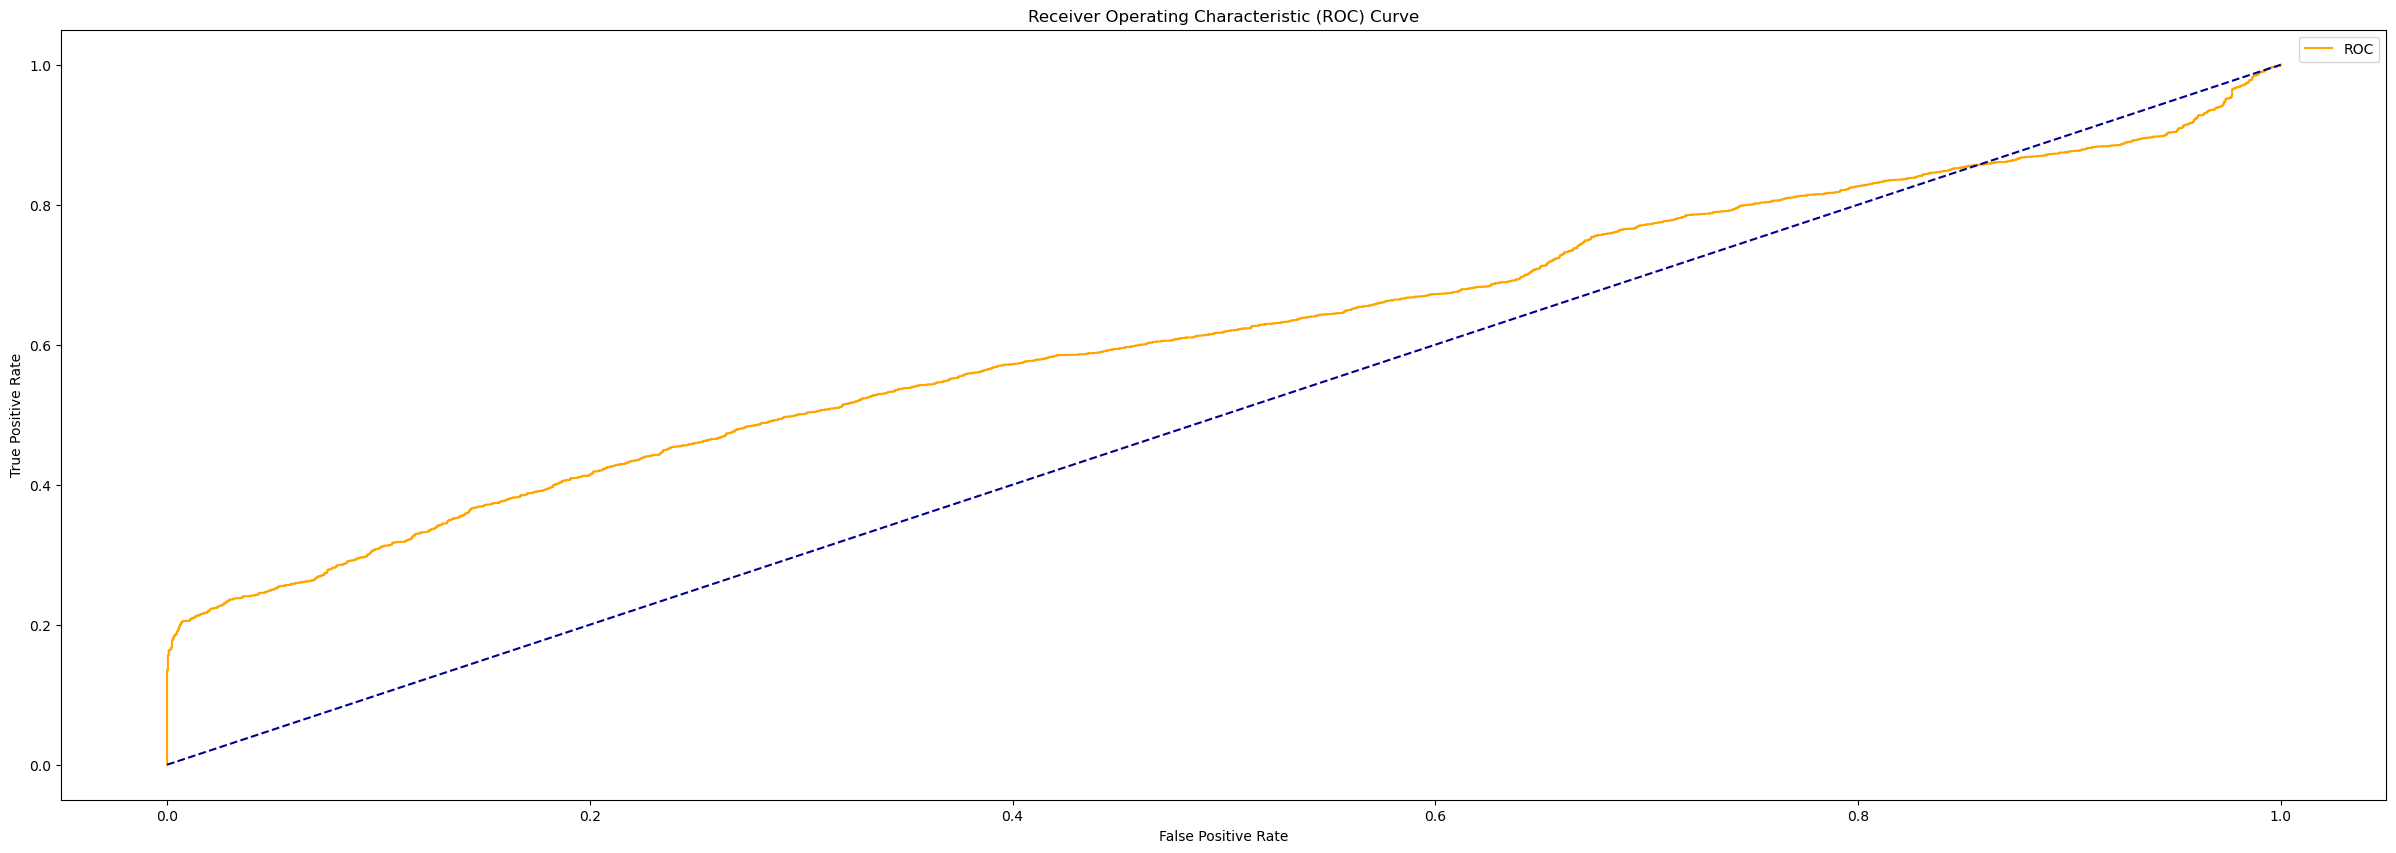

In [508]:
plot_roc_curve(fpr_gnb,tpr_gnb)

#GradientBoostingClassifier

In [509]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, Y_train2)
ytrain_pred = gbc_model.predict_proba(X_train)
print('GBC train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = gbc_model.predict_proba(X_test)
print('GBC test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

GBC train roc-auc: 0.8750650038530623
GBC test roc-auc: 0.8675831161832305


In [516]:
y_pred_gbc = gbc_model.predict_proba(X_test)[:, 1]
fpr_gbc, tpr_gbc, _gbc = metrics.roc_curve(Y_test2, y_pred_gnb,pos_label=1)

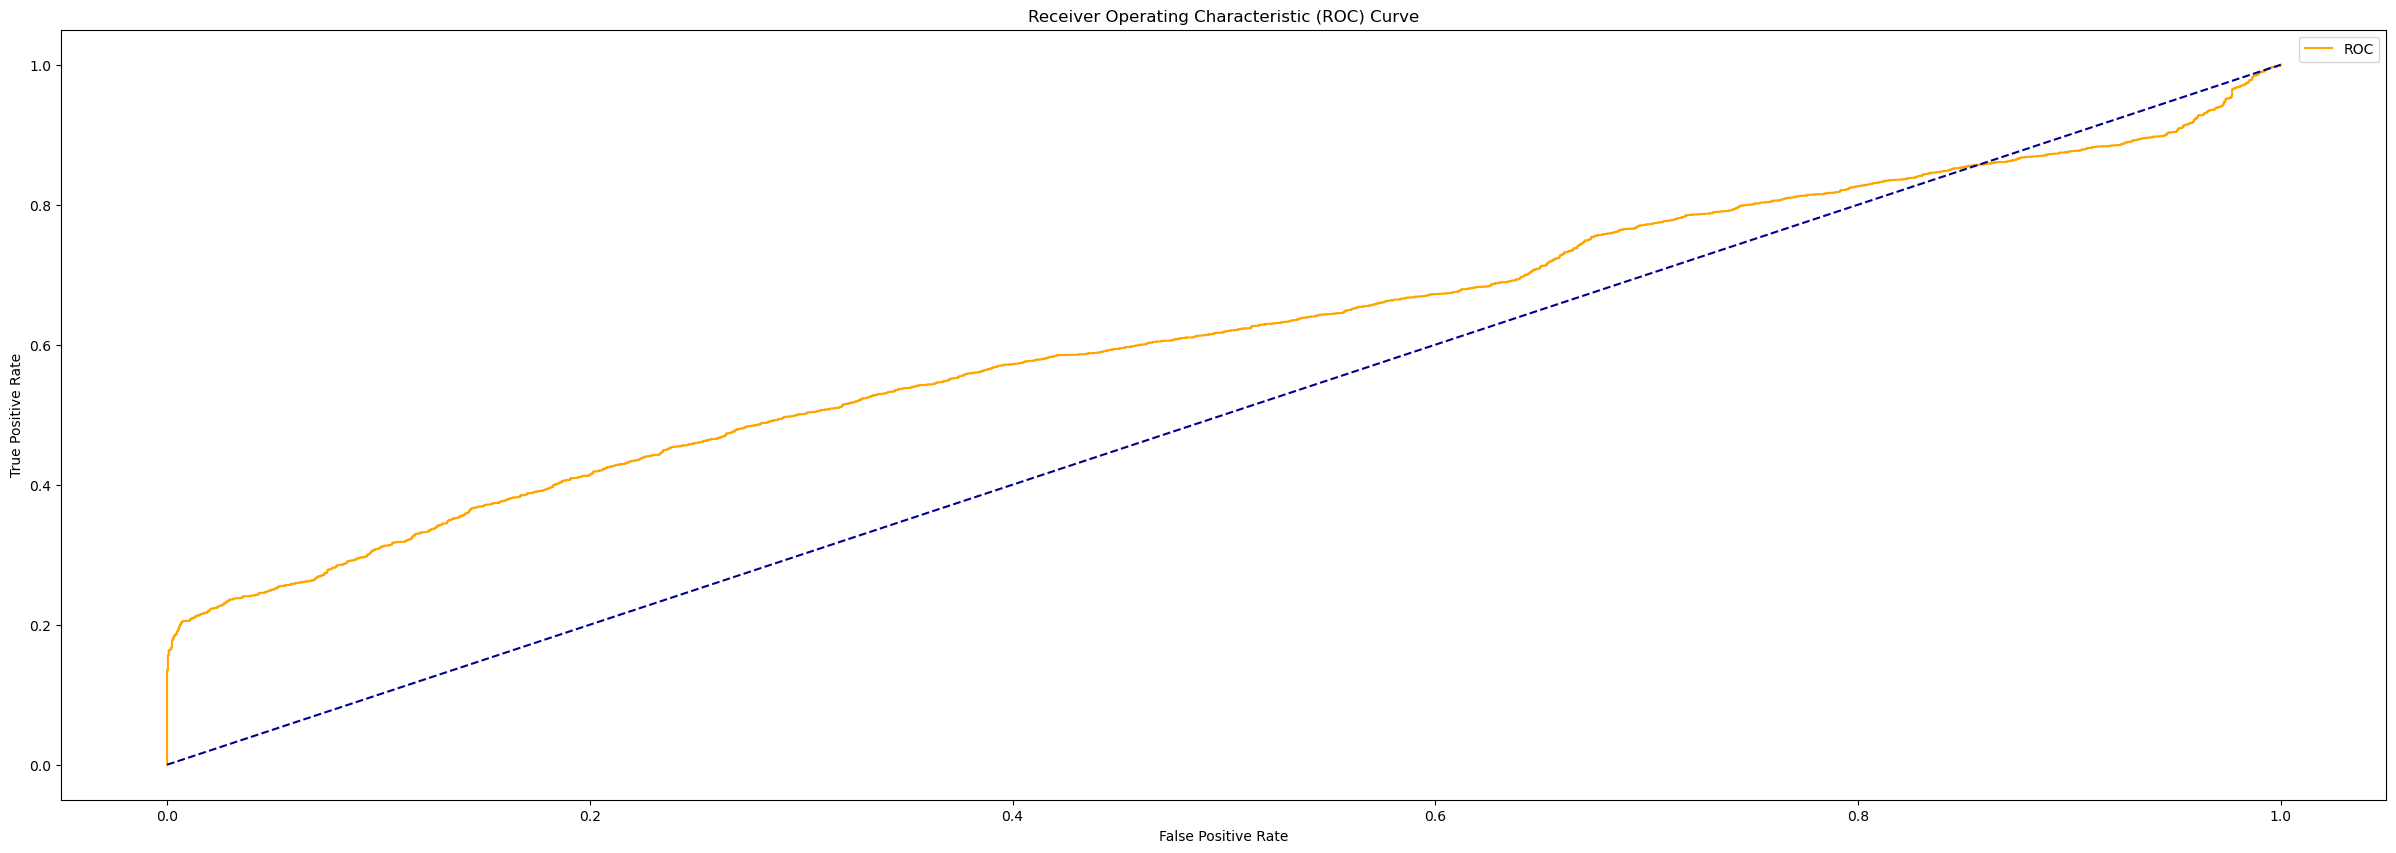

In [517]:
plot_roc_curve(fpr_gbc,tpr_gbc)

#AdaBoostClassifier

In [512]:
abc_model = AdaBoostClassifier()
abc_model.fit(X_train, Y_train2)
ytrain_pred = abc_model.predict_proba(X_train)
print('ABC train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = abc_model.predict_proba(X_test)
print('ABC test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

ABC train roc-auc: 0.6722979602380204
ABC test roc-auc: 0.6726712083885941


In [514]:
y_pred_abc = abc_model.predict_proba(X_test)[:, 1]
fpr_abc, tpr_abc, _abc = metrics.roc_curve(Y_test2, y_pred_abc,pos_label=1)

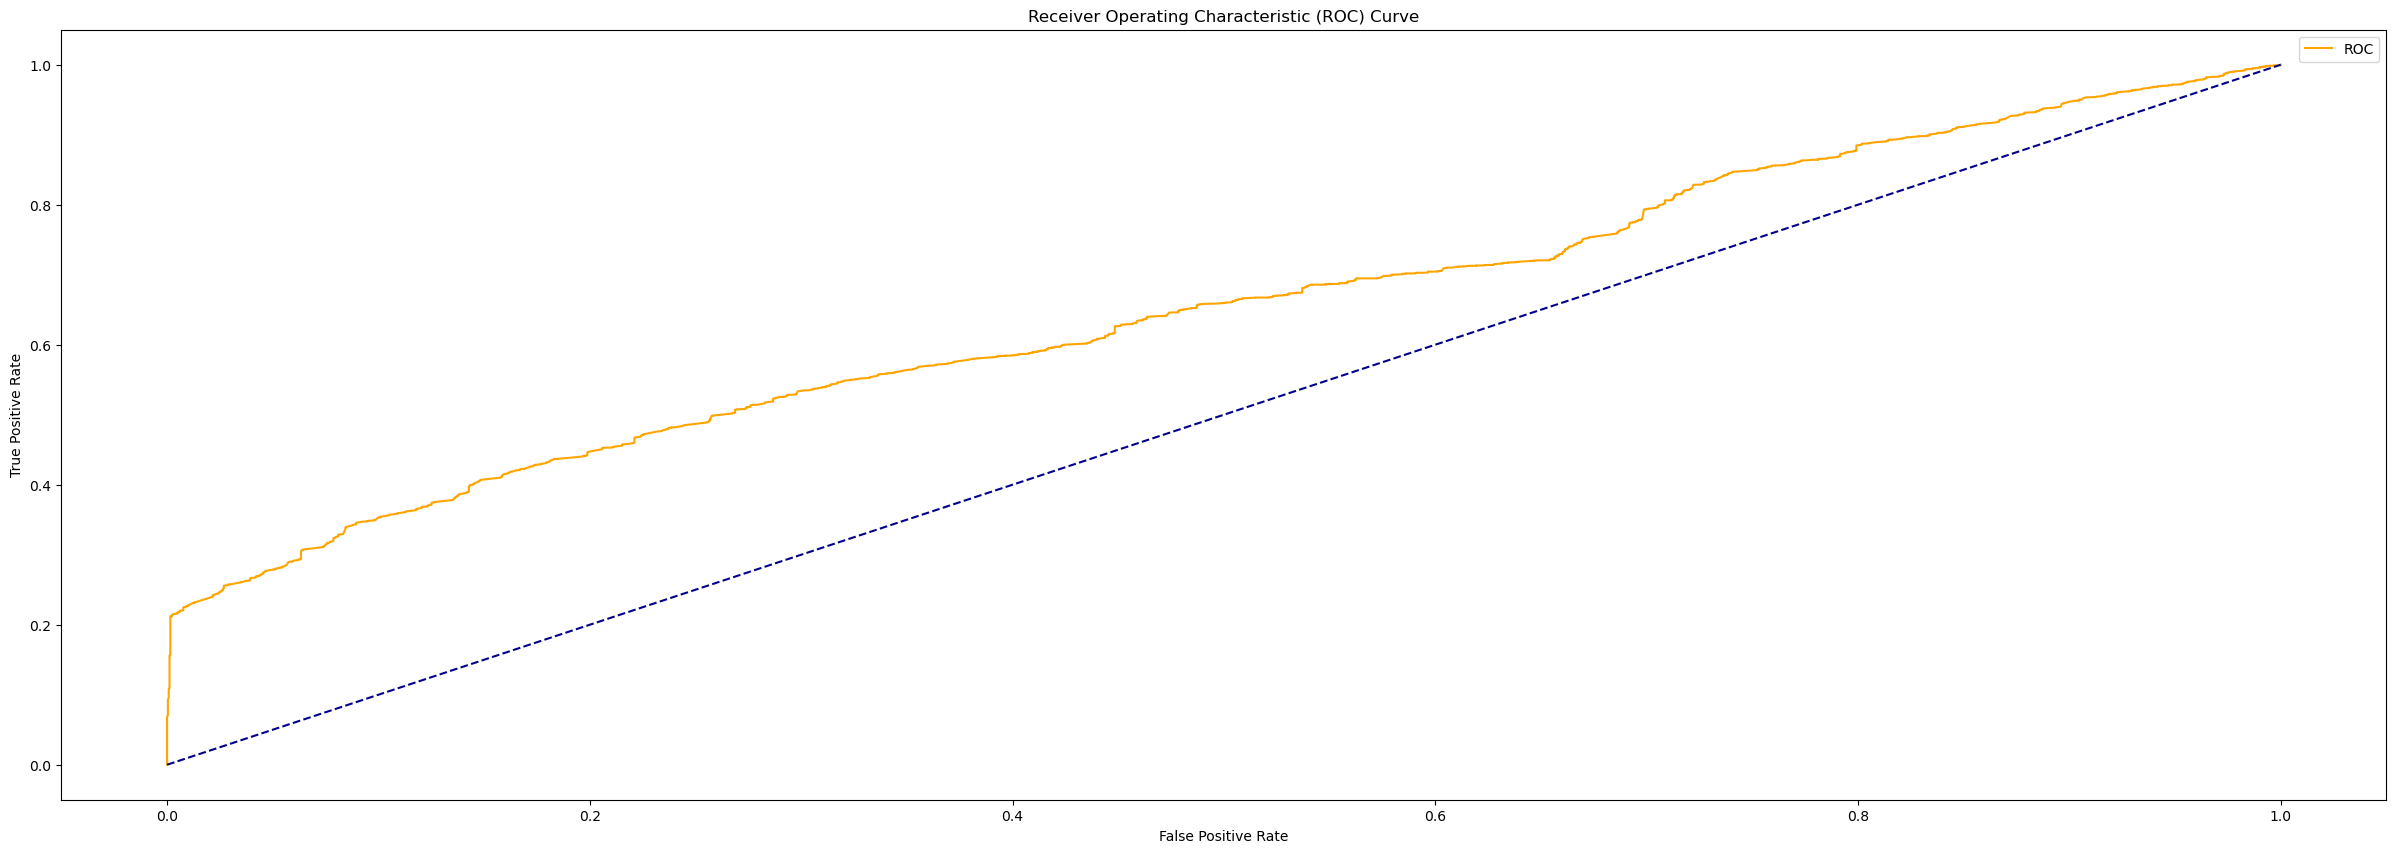

In [515]:
plot_roc_curve(fpr_abc,tpr_abc)

#SGDClassifier

In [ ]:
sgdc_model = SGDClassifier(loss='modified_huber',alpha=1e-3,class_weight='balanced')
sgdc_model.fit(X_train2, Y_train2)
ytrain_pred = sgdc_model.predict_proba(X_train2)
print('SGDC train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = sgdc_model.predict_proba(X_test2)
print('SGDC test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

In [ ]:
y_pred_sgdc = sgdc_model.predict_proba(X_test2)[:, 1]
fpr_sgdc, tpr_sgdc, _sgdc = metrics.roc_curve(Y_test2, y_pred_sgdc,pos_label=1)

In [ ]:
plot_roc_curve(fpr_sgdc,tpr_sgdc)

#Support Vector machine

In [ ]:
svc_model = SVC(probability=True)
svc_model.fit(X_train2, Y_train2)
ytrain_pred = svc_model.predict_proba(X_train2)
print('SVC train roc-auc: {}'.format(roc_auc_score(Y_train2, ytrain_pred,multi_class='ovr',average='weighted')))
ytest_pred = svc_model.predict_proba(X_test2)
print('SVC test roc-auc: {}'.format(roc_auc_score(Y_test2, ytest_pred,multi_class='ovr',average='weighted')))

In [ ]:
y_pred_svc = svc_model.predict_proba(X_test2)[:, 1]
fpr_svc, tpr_svc, _sgdc = metrics.roc_curve(Y_test2, y_pred_svc,pos_label=1)

In [ ]:
plot_roc_curve(fpr_svc,tpr_svc)